### Тема: Влияние каналов продаж, новостных рассылок и купонов на число продаж на одного покупателе в выбранном Онлайн-магазине. 

Поскольку мне интересен рынок онлайн ретейла, и я планирую создавать бренд эко-френдли одежды, мне было бы полезно проанализироать данные именно по онлайн магазину. Наиболее интересным показателем зачастую оказывается Av. Payment Count or LifeTime - число покупок на 1-го платящего (в выбранных данных это N-Purchases), так как при создании финмодели именно он играет большую роль (чаще издержки наибольшие для привлечения именно пользователя) и повышение числа покупок на платящего позволит вывести модель в плюс. 

Число покупок, которое покупатель совершит, в свою очередь, может зависить от различных факторов, например, продвижение в определенном браузере, эффективности рассылки или выданные купоны на скидку, их в данных будут отражать данные в колонках Browser, Newsletter, Voucher. 

Сделавв EDA, можно будет увидеть существование закономерностей между числом покупок одного покупателя и вышеописанными признаками, которые по предположению влияют на это. На 5-м шаге проекта определю, совершается ли наибольшее количество покупок в выходные дни/праздники. На 6-м шаге поставлю гипотезы о математическом ожидании покупок одного покупателя, а на 7 попробую предсказать.

Данные возьму с портала Kaggle: https://www.kaggle.com/datasets/onlineretailshop/online-shop-customer-sales-data

Customer_id = unique customer id

Age = customer's age

Gender = 0: Male, 1: Female

Revenue_Total = total sales by customer

N_Purchases = number of purchases

Purchase_DATE = date latest purchase, dd.mm.yy

Purchase_VALUE = latest purchase in €

Pay_Method = 0: Digital Wallets, 1: Card, 2: PayPal, 3: Other

Time_Spent = time spent (in sec) on website

Browser = 0: Chrome, 1: Safari, 2: Edge, 3: Other

Newsletter = 0: not subscribed, 1: subscribed

Voucher = 0: not used, 1: used

Приступим к описанию данных, посмотрим, что в них содержится

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Online_Shop _Customer_Sales_Data.csv')

In [3]:
df.shape

(65796, 12)

In [4]:
df['Customer_id'].nunique()

65796

In [5]:
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [6]:
df.isnull().sum() #удивительно, но в данных нет пропусков...

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [7]:
df.dtypes

Customer_id         int64
Age                 int64
Gender              int64
Revenue_Total     float64
N_Purchases         int64
Purchase_DATE      object
Purchase_VALUE    float64
Pay_Method          int64
Time_Spent          int64
Browser             int64
Newsletter          int64
Voucher             int64
dtype: object

In [8]:
df.describe()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
count,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000
mean,537205.500000,39.592696,0.671348,27.732935,3.992477,15.968699,1.308651,598.925603,0.630935,0.151027,0.250258
std,18993.813493,13.825466,0.469727,14.941878,2.004370,13.229295,1.081959,277.833635,0.996407,0.358078,0.433165
min,504308.000000,16.000000,0.000000,0.500000,1.000000,0.005000,0.000000,120.000000,0.000000,0.000000,0.000000
25%,520756.750000,28.000000,0.000000,15.300000,2.000000,4.819750,0.000000,358.000000,0.000000,0.000000,0.000000
50%,537205.500000,40.000000,1.000000,30.100000,4.000000,12.640000,1.000000,598.000000,0.000000,0.000000,0.000000
75%,553654.250000,51.000000,1.000000,37.600000,6.000000,24.752000,2.000000,840.000000,1.000000,0.000000,1.000000
max,570103.000000,63.000000,1.000000,59.900000,7.000000,59.900000,3.000000,1080.000000,3.000000,1.000000,1.000000


In [9]:
df['N_Purchases'].value_counts()

1    9519
2    9427
3    9426
7    9418
5    9408
6    9340
4    9258
Name: N_Purchases, dtype: int64

In [10]:
df['Browser'].value_counts()

0    42076
1    13135
3     7208
2     3377
Name: Browser, dtype: int64

In [11]:
df.groupby(['Browser', 'N_Purchases'], as_index=False)['Customer_id'].count() 

,Browser,N_Purchases,Customer_id
0,0,1,6158
1,0,2,6022
2,0,3,6038
3,0,4,5985
4,0,5,5920
5,0,6,5995
6,0,7,5958
7,1,1,1896
8,1,2,1887
9,1,3,1884


В каждом из браузеров примерное равное количество Customer_id приходится на разное количество покупок, хочется сделать вывод, что распределение браузеров в разре N_Purchases равномерное

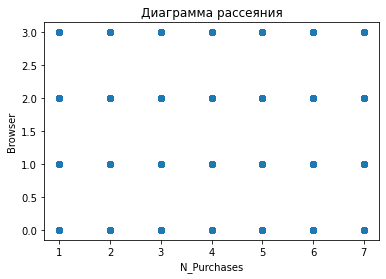

In [12]:
plt.scatter(df['N_Purchases'], df['Browser'])
plt.xlabel('N_Purchases')
plt.ylabel('Browser')
plt.title('Диаграмма рассеяния')
plt.show()

<AxesSubplot:>

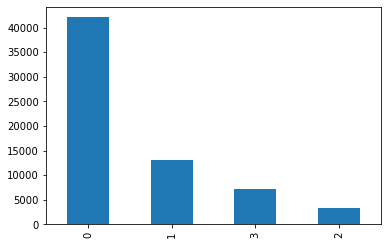

In [13]:
df['Browser'].value_counts().plot(kind='bar') #больше всего наблюдений (уникальных id) из браузера Chrome

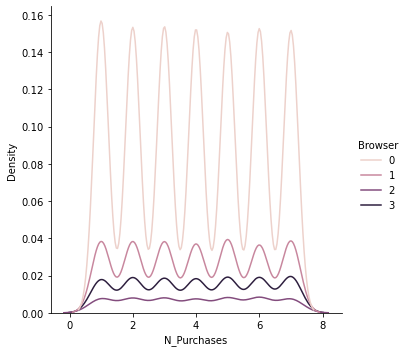

In [14]:
import matplotlib.pyplot as plt
sns.displot(data=df, x='N_Purchases', hue='Browser', kind='kde')
plt.xlabel('N_Purchases')
plt.ylabel('Density')
plt.show()

In [15]:
df['Newsletter'].value_counts()

0    55859
1     9937
Name: Newsletter, dtype: int64

<AxesSubplot:>

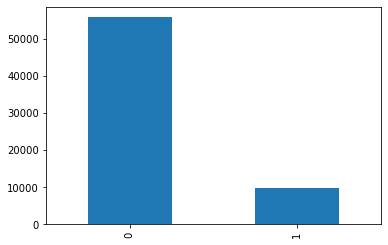

In [16]:
df['Newsletter'].value_counts().plot(kind='bar') #большая часть покупателей не были подписаны на рассылку

In [17]:
df.groupby(['Newsletter', 'N_Purchases'], as_index=False)['Customer_id'].count() 

,Newsletter,N_Purchases,Customer_id
0,0,1,8096
1,0,2,7972
2,0,3,7989
3,0,4,7875
4,0,5,7979
5,0,6,7947
6,0,7,8001
7,1,1,1423
8,1,2,1455
9,1,3,1437


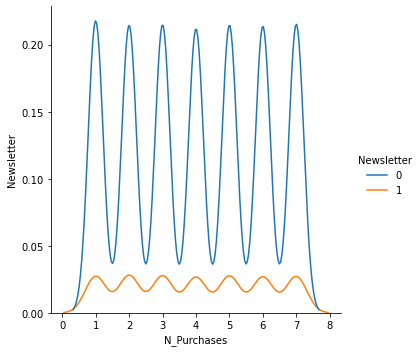

In [18]:
sns.displot(data=df, x='N_Purchases', hue='Newsletter', kind='kde')
plt.xlabel('N_Purchases')
plt.ylabel('Newsletter')
plt.show()

In [19]:
df['Voucher'].value_counts()

0    49330
1    16466
Name: Voucher, dtype: int64

<AxesSubplot:>

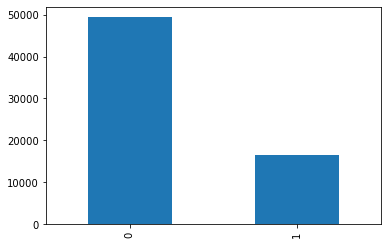

In [20]:
df['Voucher'].value_counts().plot(kind='bar') #большая часть покупателей не использовали ваучер на покупку

In [21]:
df.groupby(['Voucher', 'N_Purchases'], as_index=False)['Customer_id'].count()

,Voucher,N_Purchases,Customer_id
0,0,1,7099
1,0,2,7033
2,0,3,7090
3,0,4,6958
4,0,5,7073
5,0,6,6966
6,0,7,7111
7,1,1,2420
8,1,2,2394
9,1,3,2336


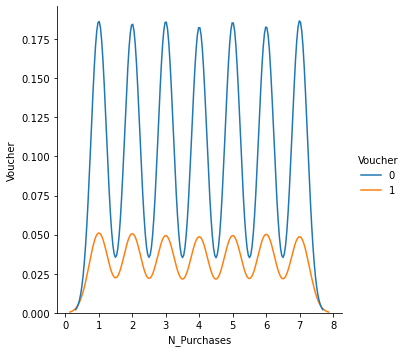

In [22]:
sns.displot(data=df, x='N_Purchases', hue='Voucher', kind='kde')
plt.xlabel('N_Purchases')
plt.ylabel('Voucher')
plt.show()

У трёх факторов, рассмотренных выше (Newsletter, Browser, Voucher) распределение в разрезе N_Purchases равномерное, это говорит о том, что вряд ли возможно сделать вывод о влиянии/эффективности новостной рассылки, выбранного браузера или наличия ваучера. 

Поэтому предположение о том, что рассылка/ваучер/браузер способствует увеличению  числа покупок, не одтверждается. 

Получаются слишком красивые распределения и складывается ощущение, что данные синтетические. Поэтому я проведу анализ, выполню все действия, с намерением на то, что полученные навыки анализа данных онлайн-магазина пригодятся в дальнейшем при работе с моим брендом, а опираться на связи полученные в результате этого проекта в жизни будет опрометчиво, с

Тогда попробуем проанализировать следующее: влияние дня недели (day_of_week), выходным ли был день (flag_is_weekend) на активность покупателей (N_Purchases, Revenue_Total, Time_Spent), измерим это с помощьюсоздания новых признаков (day_of_week, flag_is_weekend), на основе даты (поймем, какая покупка с определенным покупателем (его id) в какой неделе совершалась) и далее проведем анализ связи между днем недели и активностью (количеством покупок, выручкой, временем на сайте).

In [23]:
df['day_of_week'] = pd.to_datetime(df['Purchase_DATE']).dt.day_name()

In [24]:
# Если 1, то день недели - выходной

df['flag_is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x == 'Sunday' or x == 'Saturday' else 0)

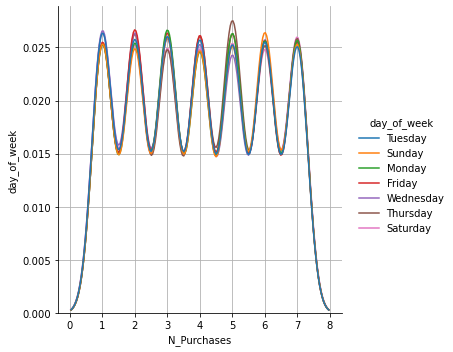

In [25]:
# Число покупок и день недели

sns.displot(data=df, x='N_Purchases', hue='day_of_week', kind='kde')
plt.xlabel('N_Purchases')
plt.ylabel('day_of_week')
plt.grid()
plt.show()

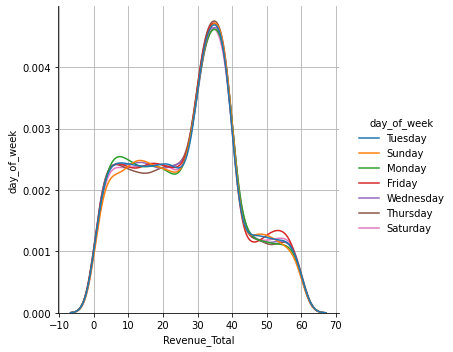

In [26]:
# Revenue_Total и день недели

sns.displot(data=df, x='Revenue_Total', hue='day_of_week', kind='kde')
plt.xlabel('Revenue_Total')
plt.ylabel('day_of_week')
plt.grid()
plt.show()

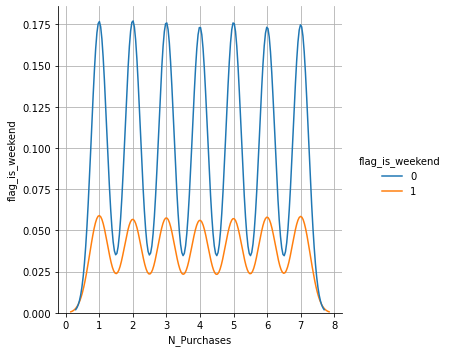

In [27]:
# Число покупок и выходной

sns.displot(data=df, x='N_Purchases', hue='flag_is_weekend', kind='kde')
plt.xlabel('N_Purchases')
plt.ylabel('flag_is_weekend')
plt.grid()
plt.show()

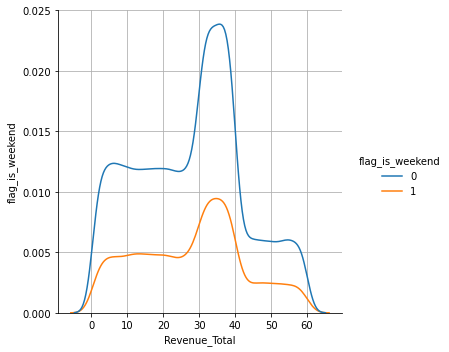

In [28]:
# Revenue_Total и выходной

sns.displot(data=df, x='Revenue_Total', hue='flag_is_weekend', kind='kde')
plt.xlabel('Revenue_Total')
plt.ylabel('flag_is_weekend')
plt.grid()
plt.show()

In [29]:
df['flag_is_weekend'].value_counts()

0    47125
1    18671
Name: flag_is_weekend, dtype: int64

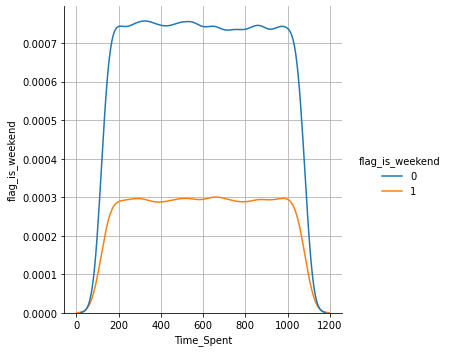

In [30]:
# Time_Spent и выходной

sns.displot(data=df, x='Time_Spent', hue='flag_is_weekend', kind='kde')
plt.xlabel('Time_Spent')
plt.ylabel('flag_is_weekend')
plt.grid()
plt.show()

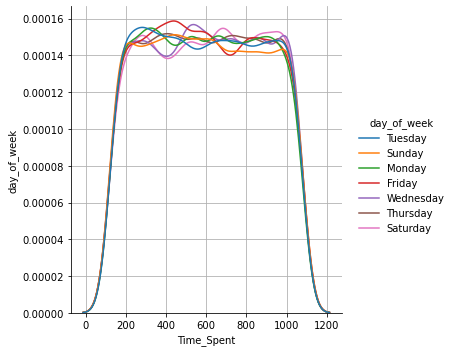

In [31]:
# Time_Spent и день недели

sns.displot(data=df, x='Time_Spent', hue='day_of_week', kind='kde')
plt.xlabel('Time_Spent')
plt.ylabel('day_of_week')
plt.grid()
plt.show()

In [32]:
# Сумма Revenue_Total в зависимоти от дня недели
df_Revenue_Total = df.groupby('day_of_week', as_index=False)['Revenue_Total'].sum()

# Сумма N_Purchases в зависимоти от дня недели
df_N_Purchases = df.groupby('day_of_week', as_index=False)['N_Purchases'].sum()

# Сумма Revenue_Total в зависимоти от выходного
df_Revenue_Total_weekend = df.groupby('flag_is_weekend', as_index=False)['Revenue_Total'].sum()

# Сумма N_Purchases в зависимоти от выходного
df_N_Purchases_weekend = df.groupby('flag_is_weekend', as_index=False)['N_Purchases'].sum()

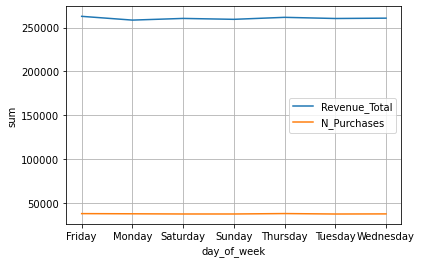

In [33]:
plt.plot(df_Revenue_Total['day_of_week'], df_Revenue_Total['Revenue_Total'], label='Revenue_Total')
plt.plot(df_N_Purchases['day_of_week'], df_N_Purchases['N_Purchases'], label='N_Purchases')
plt.legend()
plt.grid()
plt.xlabel('day_of_week')
plt.ylabel('sum');

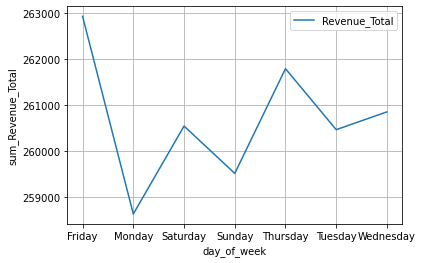

In [34]:
plt.plot(df_Revenue_Total['day_of_week'], df_Revenue_Total['Revenue_Total'], label='Revenue_Total')
plt.legend()
plt.grid()
plt.xlabel('day_of_week')
plt.ylabel('sum_Revenue_Total');

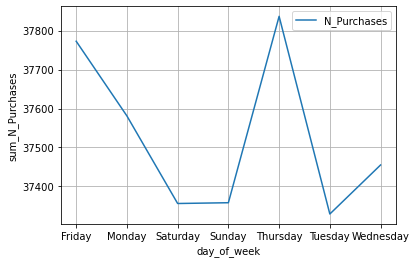

In [35]:
plt.plot(df_N_Purchases['day_of_week'], df_N_Purchases['N_Purchases'], label='N_Purchases')
plt.legend()
plt.grid()
plt.xlabel('day_of_week')
plt.ylabel('sum_N_Purchases');

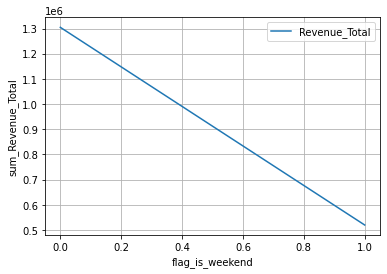

In [36]:
plt.plot(df_Revenue_Total_weekend['flag_is_weekend'], df_Revenue_Total_weekend['Revenue_Total'], label='Revenue_Total')
plt.legend()
plt.grid()
plt.xlabel('flag_is_weekend')
plt.ylabel('sum_Revenue_Total');

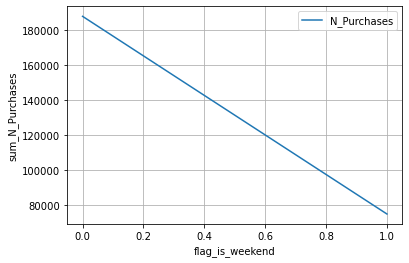

In [37]:
plt.plot(df_N_Purchases_weekend['flag_is_weekend'], df_N_Purchases_weekend['N_Purchases'], label='N_Purchases')
plt.legend()
plt.grid()
plt.xlabel('flag_is_weekend')
plt.ylabel('sum_N_Purchases');

In [38]:
# Мода числа покупок в зависимости от дня недели

df.groupby('day_of_week')['N_Purchases'].agg(pd.Series.mode)

day_of_week
Friday       2
Monday       3
Saturday     1
Sunday       6
Thursday     5
Tuesday      1
Wednesday    1
Name: N_Purchases, dtype: int64

In [39]:
# Медиана Revenue_Total в зависимости от дня недели

df.groupby('day_of_week')['Revenue_Total'].median()

day_of_week
Friday       30.1
Monday       30.0
Saturday     30.1
Sunday       30.2
Thursday     30.1
Tuesday      30.1
Wednesday    30.1
Name: Revenue_Total, dtype: float64

In [40]:
# Среднее Revenue_Total в зависимости от дня недели

df.groupby('day_of_week')['Revenue_Total'].mean()

day_of_week
Friday       27.767114
Monday       27.575488
Saturday     27.838679
Sunday       27.868718
Thursday     27.743652
Tuesday      27.708904
Wednesday    27.629531
Name: Revenue_Total, dtype: float64

## Моделирование

Будем решать как задачу регрессии, для предсказания выберем не N_Purchases, а Revenue_Total, так как модель будет качественнее именно на напрерывнных данных, но и логично, что как бизнес, мы заинтересованы прежде всего в увеличении выручки (а соответственно прибыли)

In [41]:
df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,day_of_week,flag_is_weekend
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0,Tuesday,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1,Tuesday,0
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0,Sunday,1
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0,Monday,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0,Monday,0
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0,Sunday,1
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0,Friday,0
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0,Sunday,1


In [52]:
X = df.drop(['Customer_id', 'Purchase_DATE', 'Revenue_Total'], axis=1)
y = df['Revenue_Total']

In [53]:
X_dum = pd.get_dummies(X, drop_first=True) #для построения модели дни недели будем кодировать не порядковым номером, а для каждого дня создадим отдельный столбец, где 1- покупка совершена в соответствующий столбцу день, 0 - не соответсвует
print(X_dum.shape)
X_dum.head()

(65796, 16)


,Age,Gender,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,flag_is_weekend,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,53,0,2,24.915,1,885,0,0,0,0,0,0,0,0,1,0
1,18,1,3,2.896,2,656,0,0,1,0,0,0,0,0,1,0
2,52,1,1,10.600,0,761,0,1,0,1,0,0,1,0,0,0
3,29,0,5,43.280,1,906,0,1,0,0,1,0,0,0,0,0
4,21,1,1,56.900,1,605,0,1,0,0,0,0,0,0,1,0


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.33, random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
# стандартизируем данные
normalizer = StandardScaler()

X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [58]:
lr = LinearRegression().fit(X_train,y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print ("Train R2: {}".format(r2_score(y_train, pred_train)))
print ("Test R2: {}".format(r2_score(y_test, pred_test)))

Train R2: 0.44226615381685397
Test R2: 0.4495523787824912


Теперь попробуем обучить модель с помощью метода Random Forest - более сложного метода, подробнее о нем можно почитать [здесь](https://github.com/hse-ds/iad-intro-ds/blob/master/2023/seminars/sem13_rf/sem13_rf_solution.ipynb)

__Random Forest__

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20, n_jobs=4)
rf.fit(X_train, y_train)

print ("Train R2: {}".format(r2_score(y_train, rf.predict(X_train))))
print ("Test R2: {}".format(r2_score(y_test, rf.predict(X_test))))

Train R2: 0.9159989977630277
Test R2: 0.47468486046508307


Видим, что модель переобучилась.

Подберем гиперпараметры при помощи кросс-валидацию на обучающей выборке.

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
max_depth_list = [None, 25, 20, 15, 10, 5, 3, 1]
min_samples_split_list = [2, 5, 10, 20, 30, 40]

In [63]:
r2_sc_best = 0
max_depth_best = None
min_samples_split_best = 2

for max_depth in max_depth_list:
    for min_samples_split in min_samples_split_list:
        rf = RandomForestRegressor(n_estimators=50, max_depth=max_depth, min_samples_split=min_samples_split, random_state=18)
        scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='r2')
        avg_score = scores.mean()
        
        if avg_score > r2_sc_best:
            r2_sc_best = avg_score
            max_depth_best = max_depth
            min_samples_split_best = min_samples_split
        

        print('Mean r2-score for max_depth=', max_depth, 'and min_samples_split=', min_samples_split, '=', avg_score)

Mean r2-score for max_depth= None and min_samples_split= 2 = 0.47732117254433915
Mean r2-score for max_depth= None and min_samples_split= 5 = 0.4796071002928877
Mean r2-score for max_depth= None and min_samples_split= 10 = 0.4860492730931624
Mean r2-score for max_depth= None and min_samples_split= 20 = 0.4927062392558943
Mean r2-score for max_depth= None and min_samples_split= 30 = 0.4963014140598409
Mean r2-score for max_depth= None and min_samples_split= 40 = 0.49841622239088945
Mean r2-score for max_depth= 25 and min_samples_split= 2 = 0.47932467470827755
Mean r2-score for max_depth= 25 and min_samples_split= 5 = 0.48178286166815876
Mean r2-score for max_depth= 25 and min_samples_split= 10 = 0.4867942380736447
Mean r2-score for max_depth= 25 and min_samples_split= 20 = 0.4930430179417145
Mean r2-score for max_depth= 25 and min_samples_split= 30 = 0.4964771317774468
Mean r2-score for max_depth= 25 and min_samples_split= 40 = 0.4985170537485552
Mean r2-score for max_depth= 20 and min_

In [64]:
print("Best r2-score:", r2_sc_best)
print("Best max_depth:", max_depth_best)
print("Best min_samples_split:", min_samples_split_best)

Best r2-score: 0.5081467262957056
Best max_depth: 5
Best min_samples_split: 2


Обучим на этих данных модель и оценим ее качество на тестовых данных

In [65]:
rf = RandomForestRegressor(n_estimators=50, max_depth=max_depth_best, min_samples_split=min_samples_split_best, random_state=18)
rf.fit(X_train, y_train)
print ("Test R2: {}".format(r2_score(y_test, rf.predict(X_test))))

Test R2: 0.5149961247633303


Видим улучшение относительно линейной модели

Теперь попробуем использовать catboost для построения модели, он считается так же современным методом, возможно, с ним удастся получить лушее значение r2, подробнее о нем можно почитать [здесь](https://github.com/hse-ds/iad-intro-ds/blob/master/2023/seminars/sem15_boosting_part2/sem15_boostings_part2.ipynb)

__Catboost__

In [66]:
!pip install catboost

In [67]:
from catboost import CatBoostRegressor, Pool

In [96]:
model = CatBoostRegressor() 

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
X = df.drop(['Customer_id', 'Purchase_DATE', 'Revenue_Total'], axis=1)
y = df['Revenue_Total']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [100]:
le = LabelEncoder()

le.fit(X_train['day_of_week'])

LabelEncoder()

In [101]:
X_train['day_of_week'] = le.transform(X_train['day_of_week'])
X_test['day_of_week'] = le.transform(X_test['day_of_week'])

C:\Users\Mary\AppData\Local\Temp/ipykernel_8256/3355142481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['day_of_week'] = le.transform(X_train['day_of_week'])
C:\Users\Mary\AppData\Local\Temp/ipykernel_8256/3355142481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['day_of_week'] = le.transform(X_test['day_of_week'])


In [102]:
X_train

,Age,Gender,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,day_of_week,flag_is_weekend
34118,23,1,6,25.338,2,1029,0,0,1,6,0
56163,24,1,3,1.180,3,403,0,0,0,6,0
54180,54,0,5,23.868,0,325,1,0,0,0,0
14004,24,1,5,33.120,1,868,0,0,0,3,1
64710,51,0,2,27.300,1,223,0,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
37194,46,1,2,5.076,1,839,3,1,0,1,0
6265,55,0,7,14.625,3,756,0,0,0,3,1
54886,43,1,6,8.170,0,240,0,0,1,0,0
860,46,1,7,4.176,1,339,1,0,0,3,1


In [103]:
category_features = ['Gender', 'Pay_Method', 'Browser', 'Newsletter', 'Voucher', 'day_of_week', 'flag_is_weekend']

train_dataset = Pool(X_train, y_train, cat_features=category_features) 
test_dataset = Pool(X_test, y_test, cat_features=category_features)

In [104]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

model.grid_search(grid, train_dataset)

0:	learn: 30.6727497	test: 30.6858486	best: 30.6858486 (0)	total: 9.84ms	remaining: 974ms
1:	learn: 29.9091315	test: 29.9248437	best: 29.9248437 (1)	total: 19.2ms	remaining: 940ms
2:	learn: 29.1594688	test: 29.1763420	best: 29.1763420 (2)	total: 32.9ms	remaining: 1.06s
3:	learn: 28.4320841	test: 28.4505151	best: 28.4505151 (3)	total: 45.8ms	remaining: 1.1s
4:	learn: 27.7457055	test: 27.7662302	best: 27.7662302 (4)	total: 59.3ms	remaining: 1.13s
5:	learn: 27.0783518	test: 27.0978454	best: 27.0978454 (5)	total: 72.7ms	remaining: 1.14s
6:	learn: 26.4307087	test: 26.4536456	best: 26.4536456 (6)	total: 86ms	remaining: 1.14s
7:	learn: 25.7986802	test: 25.8245385	best: 25.8245385 (7)	total: 99.2ms	remaining: 1.14s
8:	learn: 25.1889695	test: 25.2170835	best: 25.2170835 (8)	total: 110ms	remaining: 1.11s
9:	learn: 24.6092862	test: 24.6384309	best: 24.6384309 (9)	total: 123ms	remaining: 1.1s
10:	learn: 24.0556832	test: 24.0873440	best: 24.0873440 (10)	total: 136ms	remaining: 1.1s
11:	learn: 23.52

1:	learn: 26.4505126	test: 26.4767335	best: 26.4767335 (1)	total: 21.2ms	remaining: 1.04s
2:	learn: 24.3879754	test: 24.4230428	best: 24.4230428 (2)	total: 35.8ms	remaining: 1.16s
3:	learn: 22.5295036	test: 22.5684888	best: 22.5684888 (3)	total: 49.7ms	remaining: 1.19s
4:	learn: 20.9450410	test: 20.9903973	best: 20.9903973 (4)	total: 63.2ms	remaining: 1.2s
5:	learn: 19.5447010	test: 19.5884644	best: 19.5884644 (5)	total: 78ms	remaining: 1.22s
6:	learn: 18.2980159	test: 18.3510601	best: 18.3510601 (6)	total: 93.4ms	remaining: 1.24s
7:	learn: 17.2068106	test: 17.2692406	best: 17.2692406 (7)	total: 110ms	remaining: 1.26s
8:	learn: 16.2514071	test: 16.3210052	best: 16.3210052 (8)	total: 122ms	remaining: 1.23s
9:	learn: 15.4347753	test: 15.5107884	best: 15.5107884 (9)	total: 138ms	remaining: 1.24s
10:	learn: 14.7150440	test: 14.7989145	best: 14.7989145 (10)	total: 155ms	remaining: 1.25s
11:	learn: 14.1189437	test: 14.2071631	best: 14.2071631 (11)	total: 171ms	remaining: 1.25s
12:	learn: 13.


1:	loss: 10.5722206	best: 10.5722206 (1)	total: 2.89s	remaining: 2m 15s
0:	learn: 30.6727768	test: 30.6858753	best: 30.6858753 (0)	total: 10.4ms	remaining: 1.03s
1:	learn: 29.9091844	test: 29.9248962	best: 29.9248962 (1)	total: 20.2ms	remaining: 991ms
2:	learn: 29.1595372	test: 29.1764101	best: 29.1764101 (2)	total: 35.3ms	remaining: 1.14s
3:	learn: 28.4321776	test: 28.4506079	best: 28.4506079 (3)	total: 50ms	remaining: 1.2s
4:	learn: 27.7458190	test: 27.7663430	best: 27.7663430 (4)	total: 65ms	remaining: 1.24s
5:	learn: 27.0784795	test: 27.0979721	best: 27.0979721 (5)	total: 79.7ms	remaining: 1.25s
6:	learn: 26.4308563	test: 26.4537917	best: 26.4537917 (6)	total: 94.4ms	remaining: 1.25s
7:	learn: 25.7988505	test: 25.8247059	best: 25.8247059 (7)	total: 108ms	remaining: 1.25s
8:	learn: 25.1891489	test: 25.2172600	best: 25.2172600 (8)	total: 120ms	remaining: 1.22s
9:	learn: 24.6094760	test: 24.6386176	best: 24.6386176 (9)	total: 135ms	remaining: 1.22s
10:	learn: 24.0558864	test: 24.0875

94:	learn: 10.8897089	test: 11.0233810	best: 11.0233810 (94)	total: 1.39s	remaining: 73.4ms
95:	learn: 10.8745865	test: 11.0086996	best: 11.0086996 (95)	total: 1.41s	remaining: 58.7ms
96:	learn: 10.8609933	test: 10.9957236	best: 10.9957236 (96)	total: 1.42s	remaining: 44.1ms
97:	learn: 10.8472784	test: 10.9820627	best: 10.9820627 (97)	total: 1.44s	remaining: 29.4ms
98:	learn: 10.8346642	test: 10.9698390	best: 10.9698390 (98)	total: 1.45s	remaining: 14.7ms
99:	learn: 10.8229759	test: 10.9583869	best: 10.9583869 (99)	total: 1.47s	remaining: 0us

bestTest = 10.95838694
bestIteration = 99

2:	loss: 10.9583869	best: 10.5722206 (1)	total: 4.38s	remaining: 2m 15s
0:	learn: 28.8279246	test: 28.8477732	best: 28.8477732 (0)	total: 10.9ms	remaining: 1.08s
1:	learn: 26.4506835	test: 26.4769005	best: 26.4769005 (1)	total: 21.5ms	remaining: 1.05s
2:	learn: 24.3881828	test: 24.4232457	best: 24.4232457 (2)	total: 35.5ms	remaining: 1.15s
3:	learn: 22.5297537	test: 22.5687336	best: 22.5687336 (3)	total:

89:	learn: 10.4346933	test: 10.5741945	best: 10.5741945 (89)	total: 1.31s	remaining: 145ms
90:	learn: 10.4342458	test: 10.5734545	best: 10.5734545 (90)	total: 1.32s	remaining: 131ms
91:	learn: 10.4338205	test: 10.5731032	best: 10.5731032 (91)	total: 1.33s	remaining: 116ms
92:	learn: 10.4335194	test: 10.5728480	best: 10.5728480 (92)	total: 1.35s	remaining: 102ms
93:	learn: 10.4333081	test: 10.5727041	best: 10.5727041 (93)	total: 1.36s	remaining: 87.2ms
94:	learn: 10.4328808	test: 10.5727062	best: 10.5727041 (93)	total: 1.38s	remaining: 72.7ms
95:	learn: 10.4326883	test: 10.5723354	best: 10.5723354 (95)	total: 1.4s	remaining: 58.2ms
96:	learn: 10.4324814	test: 10.5720276	best: 10.5720276 (96)	total: 1.41s	remaining: 43.6ms
97:	learn: 10.4319038	test: 10.5714776	best: 10.5714776 (97)	total: 1.42s	remaining: 29.1ms
98:	learn: 10.4315560	test: 10.5714797	best: 10.5714776 (97)	total: 1.44s	remaining: 14.5ms
99:	learn: 10.4314187	test: 10.5711576	best: 10.5711576 (99)	total: 1.45s	remaining: 

86:	learn: 11.0325267	test: 11.1625639	best: 11.1625639 (86)	total: 1.27s	remaining: 190ms
87:	learn: 11.0098435	test: 11.1401976	best: 11.1401976 (87)	total: 1.28s	remaining: 175ms
88:	learn: 10.9908949	test: 11.1218151	best: 11.1218151 (88)	total: 1.3s	remaining: 161ms
89:	learn: 10.9703851	test: 11.1013655	best: 11.1013655 (89)	total: 1.32s	remaining: 147ms
90:	learn: 10.9528024	test: 11.0844968	best: 11.0844968 (90)	total: 1.34s	remaining: 132ms
91:	learn: 10.9365046	test: 11.0690019	best: 11.0690019 (91)	total: 1.35s	remaining: 118ms
92:	learn: 10.9210408	test: 11.0543431	best: 11.0543431 (92)	total: 1.37s	remaining: 103ms
93:	learn: 10.9040513	test: 11.0378125	best: 11.0378125 (93)	total: 1.38s	remaining: 88.3ms
94:	learn: 10.8898879	test: 11.0236535	best: 11.0236535 (94)	total: 1.4s	remaining: 73.5ms
95:	learn: 10.8745857	test: 11.0087933	best: 11.0087933 (95)	total: 1.41s	remaining: 58.8ms
96:	learn: 10.8611428	test: 10.9959625	best: 10.9959625 (96)	total: 1.42s	remaining: 44ms

82:	learn: 10.4384393	test: 10.5781851	best: 10.5781851 (82)	total: 1.21s	remaining: 248ms
83:	learn: 10.4382466	test: 10.5781718	best: 10.5781718 (83)	total: 1.22s	remaining: 233ms
84:	learn: 10.4378291	test: 10.5775078	best: 10.5775078 (84)	total: 1.24s	remaining: 218ms
85:	learn: 10.4370221	test: 10.5767955	best: 10.5767955 (85)	total: 1.25s	remaining: 204ms
86:	learn: 10.4361082	test: 10.5758909	best: 10.5758909 (86)	total: 1.27s	remaining: 189ms
87:	learn: 10.4356983	test: 10.5752808	best: 10.5752808 (87)	total: 1.28s	remaining: 175ms
88:	learn: 10.4355157	test: 10.5751857	best: 10.5751857 (88)	total: 1.29s	remaining: 160ms
89:	learn: 10.4350679	test: 10.5748665	best: 10.5748665 (89)	total: 1.31s	remaining: 145ms
90:	learn: 10.4346293	test: 10.5741346	best: 10.5741346 (90)	total: 1.32s	remaining: 131ms
91:	learn: 10.4341796	test: 10.5737392	best: 10.5737392 (91)	total: 1.34s	remaining: 116ms
92:	learn: 10.4336151	test: 10.5731909	best: 10.5731909 (92)	total: 1.35s	remaining: 102ms

83:	learn: 11.0972789	test: 11.2268842	best: 11.2268842 (83)	total: 1.16s	remaining: 221ms
84:	learn: 11.0745682	test: 11.2046996	best: 11.2046996 (84)	total: 1.18s	remaining: 208ms
85:	learn: 11.0533486	test: 11.1834892	best: 11.1834892 (85)	total: 1.19s	remaining: 194ms
86:	learn: 11.0330580	test: 11.1629095	best: 11.1629095 (86)	total: 1.2s	remaining: 180ms
87:	learn: 11.0105264	test: 11.1407005	best: 11.1407005 (87)	total: 1.22s	remaining: 166ms
88:	learn: 10.9914645	test: 11.1222126	best: 11.1222126 (88)	total: 1.23s	remaining: 152ms
89:	learn: 10.9710814	test: 11.1018952	best: 11.1018952 (89)	total: 1.25s	remaining: 138ms
90:	learn: 10.9533779	test: 11.0849123	best: 11.0849123 (90)	total: 1.26s	remaining: 124ms
91:	learn: 10.9369611	test: 11.0693030	best: 11.0693030 (91)	total: 1.27s	remaining: 111ms
92:	learn: 10.9212925	test: 11.0544607	best: 11.0544607 (92)	total: 1.29s	remaining: 96.9ms
93:	learn: 10.9044828	test: 11.0381103	best: 11.0381103 (93)	total: 1.3s	remaining: 83ms
9

85:	learn: 10.4371109	test: 10.5772223	best: 10.5772223 (85)	total: 1.18s	remaining: 192ms
86:	learn: 10.4362372	test: 10.5763524	best: 10.5763524 (86)	total: 1.19s	remaining: 178ms
87:	learn: 10.4358423	test: 10.5757624	best: 10.5757624 (87)	total: 1.2s	remaining: 164ms
88:	learn: 10.4352106	test: 10.5751408	best: 10.5751408 (88)	total: 1.22s	remaining: 151ms
89:	learn: 10.4347616	test: 10.5743312	best: 10.5743312 (89)	total: 1.23s	remaining: 137ms
90:	learn: 10.4344379	test: 10.5738487	best: 10.5738487 (90)	total: 1.25s	remaining: 123ms
91:	learn: 10.4340296	test: 10.5734978	best: 10.5734978 (91)	total: 1.26s	remaining: 110ms
92:	learn: 10.4334912	test: 10.5729771	best: 10.5729771 (92)	total: 1.27s	remaining: 95.8ms
93:	learn: 10.4332665	test: 10.5728058	best: 10.5728058 (93)	total: 1.29s	remaining: 82.1ms
94:	learn: 10.4329305	test: 10.5728077	best: 10.5728058 (93)	total: 1.3s	remaining: 68.4ms
95:	learn: 10.4327493	test: 10.5724381	best: 10.5724381 (95)	total: 1.31s	remaining: 54.7

87:	learn: 11.0095350	test: 11.1397544	best: 11.1397544 (87)	total: 1.2s	remaining: 844ms
88:	learn: 10.9904977	test: 11.1212903	best: 11.1212903 (88)	total: 1.21s	remaining: 830ms
89:	learn: 10.9701387	test: 11.1009960	best: 11.1009960 (89)	total: 1.22s	remaining: 816ms
90:	learn: 10.9524611	test: 11.0840382	best: 11.0840382 (90)	total: 1.24s	remaining: 803ms
91:	learn: 10.9360705	test: 11.0684538	best: 11.0684538 (91)	total: 1.25s	remaining: 789ms
92:	learn: 10.9203953	test: 11.0536064	best: 11.0536064 (92)	total: 1.26s	remaining: 776ms
93:	learn: 10.9036043	test: 11.0372737	best: 11.0372737 (93)	total: 1.28s	remaining: 762ms
94:	learn: 10.8896151	test: 11.0232917	best: 11.0232917 (94)	total: 1.29s	remaining: 749ms
95:	learn: 10.8744947	test: 11.0086122	best: 11.0086122 (95)	total: 1.31s	remaining: 735ms
96:	learn: 10.8609033	test: 10.9956379	best: 10.9956379 (96)	total: 1.32s	remaining: 721ms
97:	learn: 10.8471891	test: 10.9819777	best: 10.9819777 (97)	total: 1.33s	remaining: 708ms


25:	learn: 10.9801965	test: 11.1059926	best: 11.1059926 (25)	total: 342ms	remaining: 1.63s
26:	learn: 10.9167000	test: 11.0427942	best: 11.0427942 (26)	total: 356ms	remaining: 1.62s
27:	learn: 10.8656705	test: 10.9942495	best: 10.9942495 (27)	total: 373ms	remaining: 1.62s
28:	learn: 10.8165464	test: 10.9465127	best: 10.9465127 (28)	total: 388ms	remaining: 1.62s
29:	learn: 10.7805189	test: 10.9111894	best: 10.9111894 (29)	total: 401ms	remaining: 1.6s
30:	learn: 10.7522956	test: 10.8842081	best: 10.8842081 (30)	total: 415ms	remaining: 1.59s
31:	learn: 10.7246911	test: 10.8571245	best: 10.8571245 (31)	total: 429ms	remaining: 1.58s
32:	learn: 10.6953293	test: 10.8287863	best: 10.8287863 (32)	total: 442ms	remaining: 1.57s
33:	learn: 10.6736646	test: 10.8059280	best: 10.8059280 (33)	total: 455ms	remaining: 1.55s
34:	learn: 10.6535853	test: 10.7863182	best: 10.7863182 (34)	total: 469ms	remaining: 1.54s
35:	learn: 10.6338394	test: 10.7667076	best: 10.7667076 (35)	total: 482ms	remaining: 1.53s


127:	learn: 10.4244401	test: 10.5679998	best: 10.5679998 (127)	total: 1.75s	remaining: 301ms
128:	learn: 10.4243497	test: 10.5678444	best: 10.5678444 (128)	total: 1.76s	remaining: 287ms
129:	learn: 10.4238720	test: 10.5675093	best: 10.5675093 (129)	total: 1.78s	remaining: 274ms
130:	learn: 10.4236760	test: 10.5676431	best: 10.5675093 (129)	total: 1.79s	remaining: 260ms
131:	learn: 10.4235156	test: 10.5674717	best: 10.5674717 (131)	total: 1.8s	remaining: 246ms
132:	learn: 10.4234741	test: 10.5675999	best: 10.5674717 (131)	total: 1.82s	remaining: 232ms
133:	learn: 10.4229523	test: 10.5678303	best: 10.5674717 (131)	total: 1.83s	remaining: 219ms
134:	learn: 10.4229217	test: 10.5678298	best: 10.5674717 (131)	total: 1.84s	remaining: 205ms
135:	learn: 10.4223387	test: 10.5672376	best: 10.5672376 (135)	total: 1.86s	remaining: 191ms
136:	learn: 10.4219689	test: 10.5672417	best: 10.5672376 (135)	total: 1.87s	remaining: 178ms
137:	learn: 10.4216983	test: 10.5673919	best: 10.5672376 (135)	total: 1

66:	learn: 11.7043332	test: 11.8227014	best: 11.8227014 (66)	total: 905ms	remaining: 1.12s
67:	learn: 11.6542026	test: 11.7740867	best: 11.7740867 (67)	total: 919ms	remaining: 1.11s
68:	learn: 11.6034016	test: 11.7238558	best: 11.7238558 (68)	total: 933ms	remaining: 1.09s
69:	learn: 11.5556944	test: 11.6763915	best: 11.6763915 (69)	total: 946ms	remaining: 1.08s
70:	learn: 11.5123601	test: 11.6342806	best: 11.6342806 (70)	total: 960ms	remaining: 1.07s
71:	learn: 11.4704344	test: 11.5928792	best: 11.5928792 (71)	total: 973ms	remaining: 1.05s
72:	learn: 11.4290502	test: 11.5517337	best: 11.5517337 (72)	total: 987ms	remaining: 1.04s
73:	learn: 11.3925377	test: 11.5163099	best: 11.5163099 (73)	total: 1s	remaining: 1.03s
74:	learn: 11.3582954	test: 11.4823108	best: 11.4823108 (74)	total: 1.01s	remaining: 1.01s
75:	learn: 11.3240046	test: 11.4487883	best: 11.4487883 (75)	total: 1.03s	remaining: 1s
76:	learn: 11.2900813	test: 11.4154232	best: 11.4154232 (76)	total: 1.04s	remaining: 987ms
77:	l

18:	learn: 11.7687787	test: 11.8889845	best: 11.8889845 (18)	total: 255ms	remaining: 1.76s
19:	learn: 11.6042947	test: 11.7242634	best: 11.7242634 (19)	total: 270ms	remaining: 1.75s
20:	learn: 11.4429214	test: 11.5632289	best: 11.5632289 (20)	total: 283ms	remaining: 1.74s
21:	learn: 11.3159277	test: 11.4380594	best: 11.4380594 (21)	total: 297ms	remaining: 1.73s
22:	learn: 11.2166849	test: 11.3388847	best: 11.3388847 (22)	total: 310ms	remaining: 1.71s
23:	learn: 11.1210492	test: 11.2437208	best: 11.2437208 (23)	total: 324ms	remaining: 1.7s
24:	learn: 11.0485619	test: 11.1722256	best: 11.1722256 (24)	total: 337ms	remaining: 1.69s
25:	learn: 10.9802866	test: 11.1060779	best: 11.1060779 (25)	total: 351ms	remaining: 1.67s
26:	learn: 10.9167826	test: 11.0428723	best: 11.0428723 (26)	total: 364ms	remaining: 1.66s
27:	learn: 10.8657505	test: 10.9943250	best: 10.9943250 (27)	total: 377ms	remaining: 1.64s
28:	learn: 10.8166195	test: 10.9465819	best: 10.9465819 (28)	total: 391ms	remaining: 1.63s


121:	learn: 10.4264707	test: 10.5679230	best: 10.5679230 (121)	total: 1.67s	remaining: 382ms
122:	learn: 10.4261375	test: 10.5677554	best: 10.5677554 (122)	total: 1.68s	remaining: 369ms
123:	learn: 10.4255200	test: 10.5671050	best: 10.5671050 (123)	total: 1.69s	remaining: 355ms
124:	learn: 10.4251231	test: 10.5672818	best: 10.5671050 (123)	total: 1.71s	remaining: 341ms
125:	learn: 10.4250193	test: 10.5671222	best: 10.5671050 (123)	total: 1.72s	remaining: 328ms
126:	learn: 10.4249848	test: 10.5671214	best: 10.5671050 (123)	total: 1.73s	remaining: 314ms
127:	learn: 10.4246390	test: 10.5671221	best: 10.5671050 (123)	total: 1.75s	remaining: 300ms
128:	learn: 10.4245644	test: 10.5669908	best: 10.5669908 (128)	total: 1.76s	remaining: 287ms
129:	learn: 10.4243607	test: 10.5667786	best: 10.5667786 (129)	total: 1.77s	remaining: 273ms
130:	learn: 10.4240455	test: 10.5669800	best: 10.5667786 (129)	total: 1.79s	remaining: 260ms
131:	learn: 10.4234156	test: 10.5671665	best: 10.5667786 (129)	total: 

72:	learn: 11.4298132	test: 11.5527498	best: 11.5527498 (72)	total: 999ms	remaining: 1.05s
73:	learn: 11.3935269	test: 11.5175360	best: 11.5175360 (73)	total: 1.01s	remaining: 1.04s
74:	learn: 11.3589286	test: 11.4831794	best: 11.4831794 (74)	total: 1.03s	remaining: 1.03s
75:	learn: 11.3249512	test: 11.4499603	best: 11.4499603 (75)	total: 1.04s	remaining: 1.01s
76:	learn: 11.2907713	test: 11.4163332	best: 11.4163332 (76)	total: 1.05s	remaining: 998ms
77:	learn: 11.2576295	test: 11.3834102	best: 11.3834102 (77)	total: 1.07s	remaining: 984ms
78:	learn: 11.2276507	test: 11.3544935	best: 11.3544935 (78)	total: 1.08s	remaining: 971ms
79:	learn: 11.2011591	test: 11.3287889	best: 11.3287889 (79)	total: 1.09s	remaining: 957ms
80:	learn: 11.1711788	test: 11.2991234	best: 11.2991234 (80)	total: 1.11s	remaining: 943ms
81:	learn: 11.1458041	test: 11.2743253	best: 11.2743253 (81)	total: 1.12s	remaining: 930ms
82:	learn: 11.1212531	test: 11.2504523	best: 11.2504523 (82)	total: 1.14s	remaining: 918ms

10:	learn: 14.7157745	test: 14.7996211	best: 14.7996211 (10)	total: 144ms	remaining: 1.82s
11:	learn: 14.1196218	test: 14.2078182	best: 14.2078182 (11)	total: 158ms	remaining: 1.82s
12:	learn: 13.6095399	test: 13.7018537	best: 13.7018537 (12)	total: 172ms	remaining: 1.81s
13:	learn: 13.1568222	test: 13.2562069	best: 13.2562069 (13)	total: 186ms	remaining: 1.8s
14:	learn: 12.7738257	test: 12.8773457	best: 12.8773457 (14)	total: 200ms	remaining: 1.8s
15:	learn: 12.4543178	test: 12.5630414	best: 12.5630414 (15)	total: 215ms	remaining: 1.8s
16:	learn: 12.1869692	test: 12.2987937	best: 12.2987937 (16)	total: 228ms	remaining: 1.78s
17:	learn: 11.9588435	test: 12.0758571	best: 12.0758571 (17)	total: 242ms	remaining: 1.77s
18:	learn: 11.7690080	test: 11.8892034	best: 11.8892034 (18)	total: 255ms	remaining: 1.76s
19:	learn: 11.6045169	test: 11.7244750	best: 11.7244750 (19)	total: 269ms	remaining: 1.75s
20:	learn: 11.4431292	test: 11.5634267	best: 11.5634267 (20)	total: 282ms	remaining: 1.73s
21

113:	learn: 10.4281411	test: 10.5702078	best: 10.5699781 (112)	total: 1.55s	remaining: 491ms
114:	learn: 10.4279665	test: 10.5703072	best: 10.5699781 (112)	total: 1.57s	remaining: 478ms
115:	learn: 10.4277561	test: 10.5701290	best: 10.5699781 (112)	total: 1.58s	remaining: 464ms
116:	learn: 10.4275047	test: 10.5697059	best: 10.5697059 (116)	total: 1.6s	remaining: 450ms
117:	learn: 10.4273104	test: 10.5694808	best: 10.5694808 (117)	total: 1.61s	remaining: 437ms
118:	learn: 10.4271137	test: 10.5691875	best: 10.5691875 (118)	total: 1.62s	remaining: 423ms
119:	learn: 10.4269404	test: 10.5692408	best: 10.5691875 (118)	total: 1.64s	remaining: 409ms
120:	learn: 10.4268872	test: 10.5690610	best: 10.5690610 (120)	total: 1.65s	remaining: 396ms
121:	learn: 10.4268441	test: 10.5689035	best: 10.5689035 (121)	total: 1.67s	remaining: 382ms
122:	learn: 10.4263501	test: 10.5684300	best: 10.5684300 (122)	total: 1.68s	remaining: 368ms
123:	learn: 10.4259661	test: 10.5680629	best: 10.5680629 (123)	total: 1

52:	learn: 12.6936376	test: 12.8048223	best: 12.8048223 (52)	total: 713ms	remaining: 1.3s
53:	learn: 12.6019533	test: 12.7139750	best: 12.7139750 (53)	total: 727ms	remaining: 1.29s
54:	learn: 12.5129722	test: 12.6251600	best: 12.6251600 (54)	total: 741ms	remaining: 1.28s
55:	learn: 12.4275143	test: 12.5413184	best: 12.5413184 (55)	total: 755ms	remaining: 1.27s
56:	learn: 12.3454098	test: 12.4596136	best: 12.4596136 (56)	total: 768ms	remaining: 1.25s
57:	learn: 12.2676237	test: 12.3830569	best: 12.3830569 (57)	total: 782ms	remaining: 1.24s
58:	learn: 12.1927188	test: 12.3077712	best: 12.3077712 (58)	total: 795ms	remaining: 1.23s
59:	learn: 12.1218582	test: 12.2378433	best: 12.2378433 (59)	total: 809ms	remaining: 1.21s
60:	learn: 12.0544413	test: 12.1703520	best: 12.1703520 (60)	total: 822ms	remaining: 1.2s
61:	learn: 11.9908931	test: 12.1069931	best: 12.1069931 (61)	total: 836ms	remaining: 1.19s
62:	learn: 11.9306875	test: 12.0468928	best: 12.0468928 (62)	total: 850ms	remaining: 1.17s
6

3:	learn: 22.5318368	test: 22.5707719	best: 22.5707719 (3)	total: 47.8ms	remaining: 1.74s
4:	learn: 20.9476025	test: 20.9929097	best: 20.9929097 (4)	total: 61.4ms	remaining: 1.78s
5:	learn: 19.5473217	test: 19.5910324	best: 19.5910324 (5)	total: 75.4ms	remaining: 1.81s
6:	learn: 18.3007659	test: 18.3537480	best: 18.3537480 (6)	total: 88.9ms	remaining: 1.82s
7:	learn: 17.2097012	test: 17.2720488	best: 17.2720488 (7)	total: 102ms	remaining: 1.82s
8:	learn: 16.2541710	test: 16.3236876	best: 16.3236876 (8)	total: 112ms	remaining: 1.75s
9:	learn: 15.4375031	test: 15.5134307	best: 15.5134307 (9)	total: 125ms	remaining: 1.75s
10:	learn: 14.7176004	test: 14.8013873	best: 14.8013873 (10)	total: 139ms	remaining: 1.76s
11:	learn: 14.1213168	test: 14.2094558	best: 14.2094558 (11)	total: 153ms	remaining: 1.75s
12:	learn: 13.6111381	test: 13.7033952	best: 13.7033952 (12)	total: 166ms	remaining: 1.75s
13:	learn: 13.1583528	test: 13.2576789	best: 13.2576789 (13)	total: 180ms	remaining: 1.74s
14:	learn

105:	learn: 10.4294973	test: 10.5709283	best: 10.5708988 (104)	total: 1.44s	remaining: 600ms
106:	learn: 10.4293594	test: 10.5709735	best: 10.5708988 (104)	total: 1.46s	remaining: 586ms
107:	learn: 10.4290169	test: 10.5711120	best: 10.5708988 (104)	total: 1.47s	remaining: 573ms
108:	learn: 10.4288568	test: 10.5708936	best: 10.5708936 (108)	total: 1.49s	remaining: 559ms
109:	learn: 10.4287207	test: 10.5706187	best: 10.5706187 (109)	total: 1.5s	remaining: 545ms
110:	learn: 10.4286174	test: 10.5703762	best: 10.5703762 (110)	total: 1.51s	remaining: 532ms
111:	learn: 10.4285524	test: 10.5701700	best: 10.5701700 (111)	total: 1.53s	remaining: 518ms
112:	learn: 10.4282124	test: 10.5698262	best: 10.5698262 (112)	total: 1.54s	remaining: 504ms
113:	learn: 10.4279938	test: 10.5694652	best: 10.5694652 (113)	total: 1.55s	remaining: 490ms
114:	learn: 10.4276408	test: 10.5694199	best: 10.5694199 (114)	total: 1.57s	remaining: 477ms
115:	learn: 10.4273577	test: 10.5694790	best: 10.5694199 (114)	total: 1

54:	learn: 12.4631415	test: 12.5705045	best: 12.5705045 (54)	total: 809ms	remaining: 2.13s
55:	learn: 12.3785093	test: 12.4868368	best: 12.4868368 (55)	total: 825ms	remaining: 2.12s
56:	learn: 12.2961172	test: 12.4060043	best: 12.4060043 (56)	total: 841ms	remaining: 2.11s
57:	learn: 12.2187781	test: 12.3295581	best: 12.3295581 (57)	total: 856ms	remaining: 2.1s
58:	learn: 12.1438233	test: 12.2563452	best: 12.2563452 (58)	total: 871ms	remaining: 2.08s
59:	learn: 12.0740684	test: 12.1864314	best: 12.1864314 (59)	total: 886ms	remaining: 2.07s
60:	learn: 12.0087235	test: 12.1216393	best: 12.1216393 (60)	total: 900ms	remaining: 2.05s
61:	learn: 11.9455620	test: 12.0593949	best: 12.0593949 (61)	total: 916ms	remaining: 2.04s
62:	learn: 11.8846760	test: 11.9997446	best: 11.9997446 (62)	total: 930ms	remaining: 2.02s
63:	learn: 11.8286219	test: 11.9445625	best: 11.9445625 (63)	total: 945ms	remaining: 2.01s
64:	learn: 11.7720324	test: 11.8886251	best: 11.8886251 (64)	total: 959ms	remaining: 1.99s


149:	learn: 10.5304120	test: 10.6617753	best: 10.6617753 (149)	total: 2.23s	remaining: 743ms
150:	learn: 10.5274485	test: 10.6588928	best: 10.6588928 (150)	total: 2.24s	remaining: 728ms
151:	learn: 10.5253826	test: 10.6571623	best: 10.6571623 (151)	total: 2.26s	remaining: 713ms
152:	learn: 10.5231795	test: 10.6545867	best: 10.6545867 (152)	total: 2.27s	remaining: 698ms
153:	learn: 10.5206644	test: 10.6520619	best: 10.6520619 (153)	total: 2.29s	remaining: 683ms
154:	learn: 10.5181149	test: 10.6495801	best: 10.6495801 (154)	total: 2.3s	remaining: 668ms
155:	learn: 10.5161432	test: 10.6477062	best: 10.6477062 (155)	total: 2.32s	remaining: 654ms
156:	learn: 10.5143116	test: 10.6456690	best: 10.6456690 (156)	total: 2.33s	remaining: 638ms
157:	learn: 10.5121017	test: 10.6431308	best: 10.6431308 (157)	total: 2.35s	remaining: 624ms
158:	learn: 10.5100011	test: 10.6411282	best: 10.6411282 (158)	total: 2.36s	remaining: 609ms
159:	learn: 10.5082889	test: 10.6395764	best: 10.6395764 (159)	total: 2

45:	learn: 10.5241719	test: 10.6587836	best: 10.6587836 (45)	total: 680ms	remaining: 2.28s
46:	learn: 10.5177265	test: 10.6532936	best: 10.6532936 (46)	total: 695ms	remaining: 2.26s
47:	learn: 10.5108292	test: 10.6464746	best: 10.6464746 (47)	total: 710ms	remaining: 2.25s
48:	learn: 10.5063155	test: 10.6424049	best: 10.6424049 (48)	total: 725ms	remaining: 2.23s
49:	learn: 10.5005848	test: 10.6366247	best: 10.6366247 (49)	total: 740ms	remaining: 2.22s
50:	learn: 10.4960781	test: 10.6316684	best: 10.6316684 (50)	total: 755ms	remaining: 2.2s
51:	learn: 10.4919646	test: 10.6273627	best: 10.6273627 (51)	total: 770ms	remaining: 2.19s
52:	learn: 10.4876240	test: 10.6227045	best: 10.6227045 (52)	total: 783ms	remaining: 2.17s
53:	learn: 10.4822575	test: 10.6175962	best: 10.6175962 (53)	total: 799ms	remaining: 2.16s
54:	learn: 10.4790492	test: 10.6152660	best: 10.6152660 (54)	total: 813ms	remaining: 2.14s
55:	learn: 10.4774480	test: 10.6145418	best: 10.6145418 (55)	total: 831ms	remaining: 2.14s


142:	learn: 10.4243834	test: 10.5696145	best: 10.5694278 (139)	total: 2.1s	remaining: 839ms
143:	learn: 10.4243647	test: 10.5696140	best: 10.5694278 (139)	total: 2.12s	remaining: 824ms
144:	learn: 10.4240462	test: 10.5695186	best: 10.5694278 (139)	total: 2.13s	remaining: 810ms
145:	learn: 10.4239971	test: 10.5695825	best: 10.5694278 (139)	total: 2.15s	remaining: 795ms
146:	learn: 10.4238738	test: 10.5694840	best: 10.5694278 (139)	total: 2.16s	remaining: 780ms
147:	learn: 10.4235275	test: 10.5694577	best: 10.5694278 (139)	total: 2.18s	remaining: 766ms
148:	learn: 10.4233356	test: 10.5695219	best: 10.5694278 (139)	total: 2.2s	remaining: 752ms
149:	learn: 10.4232140	test: 10.5694853	best: 10.5694278 (139)	total: 2.21s	remaining: 737ms
150:	learn: 10.4231342	test: 10.5694983	best: 10.5694278 (139)	total: 2.23s	remaining: 723ms
151:	learn: 10.4230879	test: 10.5694944	best: 10.5694278 (139)	total: 2.24s	remaining: 709ms
152:	learn: 10.4230352	test: 10.5694929	best: 10.5694278 (139)	total: 2.

34:	learn: 15.3266969	test: 15.4102215	best: 15.4102215 (34)	total: 537ms	remaining: 2.53s
35:	learn: 15.1178284	test: 15.2023732	best: 15.2023732 (35)	total: 553ms	remaining: 2.52s
36:	learn: 14.9160346	test: 15.0026562	best: 15.0026562 (36)	total: 568ms	remaining: 2.5s
37:	learn: 14.7250377	test: 14.8127129	best: 14.8127129 (37)	total: 584ms	remaining: 2.49s
38:	learn: 14.5390258	test: 14.6288244	best: 14.6288244 (38)	total: 600ms	remaining: 2.48s
39:	learn: 14.3614193	test: 14.4518920	best: 14.4518920 (39)	total: 615ms	remaining: 2.46s
40:	learn: 14.1910057	test: 14.2827483	best: 14.2827483 (40)	total: 630ms	remaining: 2.44s
41:	learn: 14.0323444	test: 14.1237156	best: 14.1237156 (41)	total: 646ms	remaining: 2.43s
42:	learn: 13.8760168	test: 13.9688960	best: 13.9688960 (42)	total: 661ms	remaining: 2.41s
43:	learn: 13.7261332	test: 13.8207744	best: 13.8207744 (43)	total: 677ms	remaining: 2.4s
44:	learn: 13.5828364	test: 13.6787968	best: 13.6787968 (44)	total: 691ms	remaining: 2.38s
4

133:	learn: 10.5805293	test: 10.7115089	best: 10.7115089 (133)	total: 2.17s	remaining: 1.07s
134:	learn: 10.5758559	test: 10.7069374	best: 10.7069374 (134)	total: 2.19s	remaining: 1.05s
135:	learn: 10.5715564	test: 10.7028335	best: 10.7028335 (135)	total: 2.2s	remaining: 1.03s
136:	learn: 10.5680448	test: 10.6996144	best: 10.6996144 (136)	total: 2.22s	remaining: 1.02s
137:	learn: 10.5642376	test: 10.6960326	best: 10.6960326 (137)	total: 2.23s	remaining: 1s
138:	learn: 10.5613979	test: 10.6933234	best: 10.6933234 (138)	total: 2.25s	remaining: 985ms
139:	learn: 10.5579333	test: 10.6898802	best: 10.6898802 (139)	total: 2.26s	remaining: 969ms
140:	learn: 10.5552885	test: 10.6867919	best: 10.6867919 (140)	total: 2.27s	remaining: 952ms
141:	learn: 10.5520381	test: 10.6837551	best: 10.6837551 (141)	total: 2.29s	remaining: 935ms
142:	learn: 10.5489082	test: 10.6806330	best: 10.6806330 (142)	total: 2.3s	remaining: 918ms
143:	learn: 10.5461905	test: 10.6783266	best: 10.6783266 (143)	total: 2.32s

23:	learn: 11.1275316	test: 11.2540127	best: 11.2540127 (23)	total: 355ms	remaining: 2.6s
24:	learn: 11.0437074	test: 11.1719552	best: 11.1719552 (24)	total: 372ms	remaining: 2.6s
25:	learn: 10.9792662	test: 11.1076267	best: 11.1076267 (25)	total: 388ms	remaining: 2.59s
26:	learn: 10.9223938	test: 11.0523633	best: 11.0523633 (26)	total: 404ms	remaining: 2.58s
27:	learn: 10.8705016	test: 11.0017687	best: 11.0017687 (27)	total: 419ms	remaining: 2.57s
28:	learn: 10.8297913	test: 10.9615022	best: 10.9615022 (28)	total: 435ms	remaining: 2.56s
29:	learn: 10.7936266	test: 10.9272798	best: 10.9272798 (29)	total: 451ms	remaining: 2.55s
30:	learn: 10.7564425	test: 10.8912240	best: 10.8912240 (30)	total: 466ms	remaining: 2.54s
31:	learn: 10.7264581	test: 10.8622977	best: 10.8622977 (31)	total: 481ms	remaining: 2.52s
32:	learn: 10.7007851	test: 10.8365714	best: 10.8365714 (32)	total: 498ms	remaining: 2.52s
33:	learn: 10.6773220	test: 10.8131670	best: 10.8131670 (33)	total: 513ms	remaining: 2.5s
34

123:	learn: 10.4289100	test: 10.5726695	best: 10.5725757 (122)	total: 1.96s	remaining: 1.2s
124:	learn: 10.4283093	test: 10.5728577	best: 10.5725757 (122)	total: 1.98s	remaining: 1.19s
125:	learn: 10.4282218	test: 10.5727867	best: 10.5725757 (122)	total: 2s	remaining: 1.17s
126:	learn: 10.4278096	test: 10.5723488	best: 10.5723488 (126)	total: 2.01s	remaining: 1.16s
127:	learn: 10.4275731	test: 10.5724383	best: 10.5723488 (126)	total: 2.03s	remaining: 1.14s
128:	learn: 10.4272528	test: 10.5729932	best: 10.5723488 (126)	total: 2.06s	remaining: 1.13s
129:	learn: 10.4269193	test: 10.5726579	best: 10.5723488 (126)	total: 2.08s	remaining: 1.12s
130:	learn: 10.4264496	test: 10.5726103	best: 10.5723488 (126)	total: 2.09s	remaining: 1.1s
131:	learn: 10.4263443	test: 10.5726619	best: 10.5723488 (126)	total: 2.11s	remaining: 1.08s
132:	learn: 10.4262143	test: 10.5724723	best: 10.5723488 (126)	total: 2.12s	remaining: 1.07s
133:	learn: 10.4259383	test: 10.5722009	best: 10.5722009 (133)	total: 2.14s

11:	learn: 23.4824876	test: 23.5236731	best: 23.5236731 (11)	total: 177ms	remaining: 2.77s
12:	learn: 22.9713585	test: 23.0149736	best: 23.0149736 (12)	total: 191ms	remaining: 2.75s
13:	learn: 22.4697514	test: 22.5150662	best: 22.5150662 (13)	total: 206ms	remaining: 2.74s
14:	learn: 21.9811394	test: 22.0282077	best: 22.0282077 (14)	total: 222ms	remaining: 2.73s
15:	learn: 21.5115345	test: 21.5615569	best: 21.5615569 (15)	total: 238ms	remaining: 2.73s
16:	learn: 21.0559668	test: 21.1078672	best: 21.1078672 (16)	total: 253ms	remaining: 2.72s
17:	learn: 20.6169357	test: 20.6698649	best: 20.6698649 (17)	total: 269ms	remaining: 2.72s
18:	learn: 20.2013222	test: 20.2553499	best: 20.2553499 (18)	total: 284ms	remaining: 2.71s
19:	learn: 19.7993010	test: 19.8547795	best: 19.8547795 (19)	total: 299ms	remaining: 2.69s
20:	learn: 19.4140292	test: 19.4708522	best: 19.4708522 (20)	total: 315ms	remaining: 2.68s
21:	learn: 19.0361242	test: 19.0941989	best: 19.0941989 (21)	total: 329ms	remaining: 2.66s

110:	learn: 10.7032248	test: 10.8343324	best: 10.8343324 (110)	total: 1.78s	remaining: 1.42s
111:	learn: 10.6962547	test: 10.8276397	best: 10.8276397 (111)	total: 1.79s	remaining: 1.41s
112:	learn: 10.6891292	test: 10.8200694	best: 10.8200694 (112)	total: 1.81s	remaining: 1.39s
113:	learn: 10.6826672	test: 10.8136789	best: 10.8136789 (113)	total: 1.82s	remaining: 1.37s
114:	learn: 10.6745037	test: 10.8055774	best: 10.8055774 (114)	total: 1.83s	remaining: 1.36s
115:	learn: 10.6681265	test: 10.7989922	best: 10.7989922 (115)	total: 1.85s	remaining: 1.34s
116:	learn: 10.6613378	test: 10.7923917	best: 10.7923917 (116)	total: 1.86s	remaining: 1.32s
117:	learn: 10.6551905	test: 10.7864000	best: 10.7864000 (117)	total: 1.88s	remaining: 1.31s
118:	learn: 10.6498722	test: 10.7810509	best: 10.7810509 (118)	total: 1.89s	remaining: 1.29s
119:	learn: 10.6445701	test: 10.7748764	best: 10.7748764 (119)	total: 1.91s	remaining: 1.27s
120:	learn: 10.6390770	test: 10.7695125	best: 10.7695125 (120)	total: 

2:	learn: 24.4278656	test: 24.4600790	best: 24.4600790 (2)	total: 50.4ms	remaining: 3.31s
3:	learn: 22.5774547	test: 22.6252587	best: 22.6252587 (3)	total: 62.3ms	remaining: 3.05s
4:	learn: 20.9620722	test: 21.0171951	best: 21.0171951 (4)	total: 77.3ms	remaining: 3.02s
5:	learn: 19.5261074	test: 19.5880467	best: 19.5880467 (5)	total: 88.8ms	remaining: 2.87s
6:	learn: 18.2738027	test: 18.3445540	best: 18.3445540 (6)	total: 104ms	remaining: 2.87s
7:	learn: 17.1928506	test: 17.2682323	best: 17.2682323 (7)	total: 119ms	remaining: 2.85s
8:	learn: 16.2593910	test: 16.3399342	best: 16.3399342 (8)	total: 134ms	remaining: 2.84s
9:	learn: 15.4609052	test: 15.5506396	best: 15.5506396 (9)	total: 148ms	remaining: 2.82s
10:	learn: 14.7620593	test: 14.8581912	best: 14.8581912 (10)	total: 163ms	remaining: 2.8s
11:	learn: 14.1761736	test: 14.2696135	best: 14.2696135 (11)	total: 179ms	remaining: 2.8s
12:	learn: 13.6384422	test: 13.7364796	best: 13.7364796 (12)	total: 195ms	remaining: 2.8s
13:	learn: 13.

96:	learn: 10.4343736	test: 10.5754488	best: 10.5754488 (96)	total: 1.47s	remaining: 1.56s
97:	learn: 10.4342661	test: 10.5754527	best: 10.5754488 (96)	total: 1.48s	remaining: 1.54s
98:	learn: 10.4340128	test: 10.5754325	best: 10.5754325 (98)	total: 1.5s	remaining: 1.53s
99:	learn: 10.4337650	test: 10.5750630	best: 10.5750630 (99)	total: 1.52s	remaining: 1.52s
100:	learn: 10.4337114	test: 10.5751769	best: 10.5750630 (99)	total: 1.53s	remaining: 1.5s
101:	learn: 10.4331772	test: 10.5746611	best: 10.5746611 (101)	total: 1.54s	remaining: 1.48s
102:	learn: 10.4329898	test: 10.5743729	best: 10.5743729 (102)	total: 1.56s	remaining: 1.47s
103:	learn: 10.4328022	test: 10.5742336	best: 10.5742336 (103)	total: 1.57s	remaining: 1.45s
104:	learn: 10.4325798	test: 10.5743468	best: 10.5742336 (103)	total: 1.59s	remaining: 1.44s
105:	learn: 10.4325730	test: 10.5743654	best: 10.5742336 (103)	total: 1.61s	remaining: 1.43s
106:	learn: 10.4324962	test: 10.5743919	best: 10.5742336 (103)	total: 1.62s	remai

187:	learn: 10.4182192	test: 10.5696282	best: 10.5694294 (180)	total: 2.92s	remaining: 186ms
188:	learn: 10.4180659	test: 10.5696298	best: 10.5694294 (180)	total: 2.93s	remaining: 171ms
189:	learn: 10.4178573	test: 10.5694513	best: 10.5694294 (180)	total: 2.95s	remaining: 155ms
190:	learn: 10.4175575	test: 10.5691639	best: 10.5691639 (190)	total: 2.97s	remaining: 140ms
191:	learn: 10.4174559	test: 10.5692720	best: 10.5691639 (190)	total: 2.98s	remaining: 124ms
192:	learn: 10.4171022	test: 10.5689281	best: 10.5689281 (192)	total: 3s	remaining: 109ms
193:	learn: 10.4169067	test: 10.5687547	best: 10.5687547 (193)	total: 3.01s	remaining: 93.1ms
194:	learn: 10.4168676	test: 10.5687567	best: 10.5687547 (193)	total: 3.02s	remaining: 77.6ms
195:	learn: 10.4168237	test: 10.5686524	best: 10.5686524 (195)	total: 3.04s	remaining: 62ms
196:	learn: 10.4166654	test: 10.5685135	best: 10.5685135 (196)	total: 3.05s	remaining: 46.5ms
197:	learn: 10.4165253	test: 10.5685136	best: 10.5685135 (196)	total: 3

79:	learn: 11.1790615	test: 11.3030192	best: 11.3030192 (79)	total: 1.22s	remaining: 1.82s
80:	learn: 11.1537860	test: 11.2776656	best: 11.2776656 (80)	total: 1.23s	remaining: 1.81s
81:	learn: 11.1261264	test: 11.2500466	best: 11.2500466 (81)	total: 1.25s	remaining: 1.79s
82:	learn: 11.0992812	test: 11.2234534	best: 11.2234534 (82)	total: 1.26s	remaining: 1.78s
83:	learn: 11.0757931	test: 11.2000639	best: 11.2000639 (83)	total: 1.27s	remaining: 1.76s
84:	learn: 11.0549745	test: 11.1792245	best: 11.1792245 (84)	total: 1.29s	remaining: 1.75s
85:	learn: 11.0331231	test: 11.1583493	best: 11.1583493 (85)	total: 1.3s	remaining: 1.73s
86:	learn: 11.0124192	test: 11.1376395	best: 11.1376395 (86)	total: 1.32s	remaining: 1.72s
87:	learn: 10.9929404	test: 11.1182043	best: 11.1182043 (87)	total: 1.34s	remaining: 1.7s
88:	learn: 10.9743600	test: 11.1000760	best: 11.1000760 (88)	total: 1.35s	remaining: 1.69s
89:	learn: 10.9564219	test: 11.0825928	best: 11.0825928 (89)	total: 1.37s	remaining: 1.67s
9

168:	learn: 10.4960386	test: 10.6267929	best: 10.6267929 (168)	total: 2.62s	remaining: 481ms
169:	learn: 10.4946678	test: 10.6249955	best: 10.6249955 (169)	total: 2.63s	remaining: 465ms
170:	learn: 10.4929432	test: 10.6232905	best: 10.6232905 (170)	total: 2.65s	remaining: 450ms
171:	learn: 10.4916037	test: 10.6220526	best: 10.6220526 (171)	total: 2.67s	remaining: 434ms
172:	learn: 10.4901843	test: 10.6206029	best: 10.6206029 (172)	total: 2.68s	remaining: 419ms
173:	learn: 10.4886918	test: 10.6191122	best: 10.6191122 (173)	total: 2.7s	remaining: 403ms
174:	learn: 10.4873010	test: 10.6177133	best: 10.6177133 (174)	total: 2.71s	remaining: 388ms
175:	learn: 10.4856649	test: 10.6161302	best: 10.6161302 (175)	total: 2.73s	remaining: 372ms
176:	learn: 10.4845733	test: 10.6146970	best: 10.6146970 (176)	total: 2.75s	remaining: 357ms
177:	learn: 10.4833901	test: 10.6136554	best: 10.6136554 (177)	total: 2.76s	remaining: 341ms
178:	learn: 10.4823352	test: 10.6128064	best: 10.6128064 (178)	total: 2

65:	learn: 10.4545425	test: 10.5930017	best: 10.5930017 (65)	total: 1.12s	remaining: 2.27s
66:	learn: 10.4525996	test: 10.5911636	best: 10.5911636 (66)	total: 1.13s	remaining: 2.25s
67:	learn: 10.4514418	test: 10.5899762	best: 10.5899762 (67)	total: 1.15s	remaining: 2.23s
68:	learn: 10.4501650	test: 10.5883364	best: 10.5883364 (68)	total: 1.16s	remaining: 2.21s
69:	learn: 10.4496816	test: 10.5879443	best: 10.5879443 (69)	total: 1.18s	remaining: 2.19s
70:	learn: 10.4484921	test: 10.5869196	best: 10.5869196 (70)	total: 1.19s	remaining: 2.17s
71:	learn: 10.4476519	test: 10.5860593	best: 10.5860593 (71)	total: 1.21s	remaining: 2.15s
72:	learn: 10.4471510	test: 10.5854092	best: 10.5854092 (72)	total: 1.23s	remaining: 2.13s
73:	learn: 10.4465521	test: 10.5853911	best: 10.5853911 (73)	total: 1.24s	remaining: 2.12s
74:	learn: 10.4456314	test: 10.5842202	best: 10.5842202 (74)	total: 1.26s	remaining: 2.09s
75:	learn: 10.4448900	test: 10.5836739	best: 10.5836739 (75)	total: 1.27s	remaining: 2.07s

160:	learn: 10.4222951	test: 10.5701353	best: 10.5693056 (141)	total: 2.54s	remaining: 616ms
161:	learn: 10.4222659	test: 10.5701341	best: 10.5693056 (141)	total: 2.56s	remaining: 599ms
162:	learn: 10.4222120	test: 10.5702459	best: 10.5693056 (141)	total: 2.57s	remaining: 584ms
163:	learn: 10.4221874	test: 10.5702448	best: 10.5693056 (141)	total: 2.58s	remaining: 568ms
164:	learn: 10.4221711	test: 10.5703137	best: 10.5693056 (141)	total: 2.6s	remaining: 552ms
165:	learn: 10.4221709	test: 10.5703138	best: 10.5693056 (141)	total: 2.62s	remaining: 536ms
166:	learn: 10.4220745	test: 10.5703491	best: 10.5693056 (141)	total: 2.63s	remaining: 520ms
167:	learn: 10.4220546	test: 10.5703484	best: 10.5693056 (141)	total: 2.66s	remaining: 507ms
168:	learn: 10.4219643	test: 10.5701265	best: 10.5693056 (141)	total: 2.67s	remaining: 491ms
169:	learn: 10.4219289	test: 10.5701259	best: 10.5693056 (141)	total: 2.69s	remaining: 475ms
170:	learn: 10.4217935	test: 10.5702326	best: 10.5693056 (141)	total: 2

53:	learn: 12.1780359	test: 12.2963433	best: 12.2963433 (53)	total: 1.51s	remaining: 1.28s
54:	learn: 12.0876513	test: 12.2073321	best: 12.2073321 (54)	total: 1.53s	remaining: 1.25s
55:	learn: 12.0015627	test: 12.1223929	best: 12.1223929 (55)	total: 1.56s	remaining: 1.23s
56:	learn: 11.9277600	test: 12.0498975	best: 12.0498975 (56)	total: 1.59s	remaining: 1.2s
57:	learn: 11.8528262	test: 11.9759410	best: 11.9759410 (57)	total: 1.61s	remaining: 1.17s
58:	learn: 11.7797054	test: 11.9034272	best: 11.9034272 (58)	total: 1.64s	remaining: 1.14s
59:	learn: 11.7143670	test: 11.8387989	best: 11.8387989 (59)	total: 1.67s	remaining: 1.11s
60:	learn: 11.6482170	test: 11.7737802	best: 11.7737802 (60)	total: 1.69s	remaining: 1.08s
61:	learn: 11.5861693	test: 11.7122689	best: 11.7122689 (61)	total: 1.72s	remaining: 1.05s
62:	learn: 11.5287168	test: 11.6561584	best: 11.6561584 (62)	total: 1.75s	remaining: 1.03s
63:	learn: 11.4747708	test: 11.6031794	best: 11.6031794 (63)	total: 1.77s	remaining: 998ms


45:	learn: 10.4472068	test: 10.5836325	best: 10.5836325 (45)	total: 1.19s	remaining: 1.39s
46:	learn: 10.4457531	test: 10.5817503	best: 10.5817503 (46)	total: 1.21s	remaining: 1.37s
47:	learn: 10.4444253	test: 10.5809758	best: 10.5809758 (47)	total: 1.24s	remaining: 1.34s
48:	learn: 10.4440033	test: 10.5802050	best: 10.5802050 (48)	total: 1.25s	remaining: 1.3s
49:	learn: 10.4417556	test: 10.5784101	best: 10.5784101 (49)	total: 1.27s	remaining: 1.27s
50:	learn: 10.4402590	test: 10.5776795	best: 10.5776795 (50)	total: 1.3s	remaining: 1.25s
51:	learn: 10.4390960	test: 10.5774162	best: 10.5774162 (51)	total: 1.32s	remaining: 1.22s
52:	learn: 10.4373180	test: 10.5760483	best: 10.5760483 (52)	total: 1.35s	remaining: 1.2s
53:	learn: 10.4362296	test: 10.5752235	best: 10.5752235 (53)	total: 1.37s	remaining: 1.17s
54:	learn: 10.4340530	test: 10.5736642	best: 10.5736642 (54)	total: 1.4s	remaining: 1.14s
55:	learn: 10.4329088	test: 10.5724247	best: 10.5724247 (55)	total: 1.42s	remaining: 1.12s
56:

41:	learn: 13.6531157	test: 13.7552419	best: 13.7552419 (41)	total: 1.1s	remaining: 1.52s
42:	learn: 13.4930654	test: 13.5966327	best: 13.5966327 (42)	total: 1.13s	remaining: 1.49s
43:	learn: 13.3495081	test: 13.4549964	best: 13.4549964 (43)	total: 1.15s	remaining: 1.46s
44:	learn: 13.2075603	test: 13.3150695	best: 13.3150695 (44)	total: 1.17s	remaining: 1.44s
45:	learn: 13.0680478	test: 13.1769225	best: 13.1769225 (45)	total: 1.24s	remaining: 1.46s
46:	learn: 12.9339872	test: 13.0444569	best: 13.0444569 (46)	total: 1.27s	remaining: 1.43s
47:	learn: 12.8074739	test: 12.9192345	best: 12.9192345 (47)	total: 1.29s	remaining: 1.4s
48:	learn: 12.6893787	test: 12.8027796	best: 12.8027796 (48)	total: 1.32s	remaining: 1.37s
49:	learn: 12.5775797	test: 12.6918673	best: 12.6918673 (49)	total: 1.34s	remaining: 1.34s
50:	learn: 12.4706473	test: 12.5860105	best: 12.5860105 (50)	total: 1.37s	remaining: 1.31s
51:	learn: 12.3699747	test: 12.4868947	best: 12.4868947 (51)	total: 1.39s	remaining: 1.28s
5

34:	learn: 10.5099494	test: 10.6471367	best: 10.6471367 (34)	total: 887ms	remaining: 1.65s
35:	learn: 10.4990618	test: 10.6355555	best: 10.6355555 (35)	total: 912ms	remaining: 1.62s
36:	learn: 10.4872438	test: 10.6232215	best: 10.6232215 (36)	total: 938ms	remaining: 1.6s
37:	learn: 10.4804930	test: 10.6174832	best: 10.6174832 (37)	total: 963ms	remaining: 1.57s
38:	learn: 10.4739209	test: 10.6105605	best: 10.6105605 (38)	total: 987ms	remaining: 1.54s
39:	learn: 10.4682936	test: 10.6050934	best: 10.6050934 (39)	total: 1.01s	remaining: 1.52s
40:	learn: 10.4624630	test: 10.5992286	best: 10.5992286 (40)	total: 1.04s	remaining: 1.49s
41:	learn: 10.4583937	test: 10.5948166	best: 10.5948166 (41)	total: 1.06s	remaining: 1.47s
42:	learn: 10.4548423	test: 10.5913565	best: 10.5913565 (42)	total: 1.08s	remaining: 1.44s
43:	learn: 10.4523857	test: 10.5892231	best: 10.5892231 (43)	total: 1.11s	remaining: 1.42s
44:	learn: 10.4507181	test: 10.5869666	best: 10.5869666 (44)	total: 1.13s	remaining: 1.39s


25:	learn: 17.4211380	test: 17.4896387	best: 17.4896387 (25)	total: 629ms	remaining: 1.79s
26:	learn: 17.1088251	test: 17.1799061	best: 17.1799061 (26)	total: 654ms	remaining: 1.77s
27:	learn: 16.8166348	test: 16.8904009	best: 16.8904009 (27)	total: 678ms	remaining: 1.74s
28:	learn: 16.5298083	test: 16.6056689	best: 16.6056689 (28)	total: 702ms	remaining: 1.72s
29:	learn: 16.2450567	test: 16.3229793	best: 16.3229793 (29)	total: 726ms	remaining: 1.69s
30:	learn: 15.9734909	test: 16.0535441	best: 16.0535441 (30)	total: 751ms	remaining: 1.67s
31:	learn: 15.7096051	test: 15.7921227	best: 15.7921227 (31)	total: 776ms	remaining: 1.65s
32:	learn: 15.4587709	test: 15.5433774	best: 15.5433774 (32)	total: 799ms	remaining: 1.62s
33:	learn: 15.2174155	test: 15.3043302	best: 15.3043302 (33)	total: 824ms	remaining: 1.6s
34:	learn: 14.9873853	test: 15.0768484	best: 15.0768484 (34)	total: 850ms	remaining: 1.58s
35:	learn: 14.7754887	test: 14.8667415	best: 14.8667415 (35)	total: 874ms	remaining: 1.55s


14:	learn: 12.4165975	test: 12.5252652	best: 12.5252652 (14)	total: 360ms	remaining: 2.04s
15:	learn: 12.0840540	test: 12.1977538	best: 12.1977538 (15)	total: 384ms	remaining: 2.02s
16:	learn: 11.8198486	test: 11.9350851	best: 11.9350851 (16)	total: 410ms	remaining: 2s
17:	learn: 11.5895111	test: 11.7081808	best: 11.7081808 (17)	total: 435ms	remaining: 1.98s
18:	learn: 11.4037059	test: 11.5258735	best: 11.5258735 (18)	total: 460ms	remaining: 1.96s
19:	learn: 11.2411177	test: 11.3673284	best: 11.3673284 (19)	total: 484ms	remaining: 1.94s
20:	learn: 11.1174417	test: 11.2467402	best: 11.2467402 (20)	total: 508ms	remaining: 1.91s
21:	learn: 11.0247528	test: 11.1560190	best: 11.1560190 (21)	total: 532ms	remaining: 1.89s
22:	learn: 10.9234544	test: 11.0574316	best: 11.0574316 (22)	total: 557ms	remaining: 1.86s
23:	learn: 10.8479237	test: 10.9828434	best: 10.9828434 (23)	total: 585ms	remaining: 1.85s
24:	learn: 10.7880289	test: 10.9238016	best: 10.9238016 (24)	total: 610ms	remaining: 1.83s
25

5:	learn: 27.0164604	test: 27.0390299	best: 27.0390299 (5)	total: 136ms	remaining: 2.13s
6:	learn: 26.3643161	test: 26.3885660	best: 26.3885660 (6)	total: 160ms	remaining: 2.13s
7:	learn: 25.7214595	test: 25.7476998	best: 25.7476998 (7)	total: 185ms	remaining: 2.12s
8:	learn: 25.1099846	test: 25.1370289	best: 25.1370289 (8)	total: 211ms	remaining: 2.13s
9:	learn: 24.5096877	test: 24.5378834	best: 24.5378834 (9)	total: 235ms	remaining: 2.12s
10:	learn: 23.9427554	test: 23.9724362	best: 23.9724362 (10)	total: 260ms	remaining: 2.1s
11:	learn: 23.3972923	test: 23.4313330	best: 23.4313330 (11)	total: 284ms	remaining: 2.08s
12:	learn: 22.8606436	test: 22.8962587	best: 22.8962587 (12)	total: 308ms	remaining: 2.06s
13:	learn: 22.3400507	test: 22.3772974	best: 22.3772974 (13)	total: 333ms	remaining: 2.04s
14:	learn: 21.8494311	test: 21.8888174	best: 21.8888174 (14)	total: 359ms	remaining: 2.04s
15:	learn: 21.3623113	test: 21.4044676	best: 21.4044676 (15)	total: 383ms	remaining: 2.01s
16:	learn:

4:	learn: 20.8078930	test: 20.8514769	best: 20.8514769 (4)	total: 115ms	remaining: 2.18s
5:	learn: 19.3376098	test: 19.3865890	best: 19.3865890 (5)	total: 139ms	remaining: 2.18s
6:	learn: 18.0728558	test: 18.1319646	best: 18.1319646 (6)	total: 164ms	remaining: 2.18s
7:	learn: 16.9611204	test: 17.0257478	best: 17.0257478 (7)	total: 188ms	remaining: 2.16s
8:	learn: 15.9584071	test: 16.0343829	best: 16.0343829 (8)	total: 213ms	remaining: 2.15s
9:	learn: 15.1139373	test: 15.1936639	best: 15.1936639 (9)	total: 237ms	remaining: 2.13s
10:	learn: 14.3742022	test: 14.4601949	best: 14.4601949 (10)	total: 261ms	remaining: 2.11s
11:	learn: 13.7839738	test: 13.8785152	best: 13.8785152 (11)	total: 286ms	remaining: 2.1s
12:	learn: 13.2532077	test: 13.3542122	best: 13.3542122 (12)	total: 310ms	remaining: 2.08s
13:	learn: 12.8083544	test: 12.9125757	best: 12.9125757 (13)	total: 337ms	remaining: 2.07s
14:	learn: 12.4201405	test: 12.5287158	best: 12.5287158 (14)	total: 361ms	remaining: 2.05s
15:	learn: 1

4:	learn: 27.7016224	test: 27.7202597	best: 27.7202597 (4)	total: 113ms	remaining: 3.27s
5:	learn: 27.0133786	test: 27.0359189	best: 27.0359189 (5)	total: 138ms	remaining: 3.31s
6:	learn: 26.3609709	test: 26.3851913	best: 26.3851913 (6)	total: 162ms	remaining: 3.32s
7:	learn: 25.7176987	test: 25.7439123	best: 25.7439123 (7)	total: 187ms	remaining: 3.31s
8:	learn: 25.1059281	test: 25.1329460	best: 25.1329460 (8)	total: 211ms	remaining: 3.31s
9:	learn: 24.5052015	test: 24.5333841	best: 24.5333841 (9)	total: 235ms	remaining: 3.29s
10:	learn: 23.9380616	test: 23.9677212	best: 23.9677212 (10)	total: 259ms	remaining: 3.28s
11:	learn: 23.3920234	test: 23.4261343	best: 23.4261343 (11)	total: 284ms	remaining: 3.27s
12:	learn: 22.8548082	test: 22.8904971	best: 22.8904971 (12)	total: 308ms	remaining: 3.25s
13:	learn: 22.3338530	test: 22.3711755	best: 22.3711755 (13)	total: 334ms	remaining: 3.25s
14:	learn: 21.8429438	test: 21.8824086	best: 21.8824086 (14)	total: 359ms	remaining: 3.23s
15:	learn: 

100:	learn: 10.5887264	test: 10.7248903	best: 10.7248903 (100)	total: 2.5s	remaining: 1.21s
101:	learn: 10.5803511	test: 10.7162290	best: 10.7162290 (101)	total: 2.53s	remaining: 1.19s
102:	learn: 10.5732248	test: 10.7092056	best: 10.7092056 (102)	total: 2.55s	remaining: 1.16s
103:	learn: 10.5664702	test: 10.7027219	best: 10.7027219 (103)	total: 2.58s	remaining: 1.14s
104:	learn: 10.5603849	test: 10.6966839	best: 10.6966839 (104)	total: 2.6s	remaining: 1.11s
105:	learn: 10.5537049	test: 10.6898263	best: 10.6898263 (105)	total: 2.63s	remaining: 1.09s
106:	learn: 10.5477882	test: 10.6835453	best: 10.6835453 (106)	total: 2.65s	remaining: 1.06s
107:	learn: 10.5420559	test: 10.6776281	best: 10.6776281 (107)	total: 2.67s	remaining: 1.04s
108:	learn: 10.5365336	test: 10.6720286	best: 10.6720286 (108)	total: 2.7s	remaining: 1.01s
109:	learn: 10.5314592	test: 10.6671363	best: 10.6671363 (109)	total: 2.73s	remaining: 991ms
110:	learn: 10.5274926	test: 10.6633382	best: 10.6633382 (110)	total: 2.7

39:	learn: 10.4682405	test: 10.6050280	best: 10.6050280 (39)	total: 989ms	remaining: 2.72s
40:	learn: 10.4624117	test: 10.5991643	best: 10.5991643 (40)	total: 1.01s	remaining: 2.69s
41:	learn: 10.4583440	test: 10.5947515	best: 10.5947515 (41)	total: 1.04s	remaining: 2.67s
42:	learn: 10.4547963	test: 10.5912949	best: 10.5912949 (42)	total: 1.06s	remaining: 2.64s
43:	learn: 10.4523389	test: 10.5891622	best: 10.5891622 (43)	total: 1.09s	remaining: 2.62s
44:	learn: 10.4506704	test: 10.5869035	best: 10.5869035 (44)	total: 1.11s	remaining: 2.58s
45:	learn: 10.4472068	test: 10.5836325	best: 10.5836325 (45)	total: 1.13s	remaining: 2.56s
46:	learn: 10.4457531	test: 10.5817503	best: 10.5817503 (46)	total: 1.15s	remaining: 2.53s
47:	learn: 10.4444253	test: 10.5809758	best: 10.5809758 (47)	total: 1.18s	remaining: 2.5s
48:	learn: 10.4440033	test: 10.5802050	best: 10.5802050 (48)	total: 1.19s	remaining: 2.46s
49:	learn: 10.4417556	test: 10.5784101	best: 10.5784101 (49)	total: 1.22s	remaining: 2.44s


129:	learn: 10.3952287	test: 10.5615821	best: 10.5611079 (109)	total: 3.16s	remaining: 487ms
130:	learn: 10.3945074	test: 10.5609372	best: 10.5609372 (130)	total: 3.19s	remaining: 462ms
131:	learn: 10.3940491	test: 10.5611228	best: 10.5609372 (130)	total: 3.21s	remaining: 438ms
132:	learn: 10.3931219	test: 10.5612682	best: 10.5609372 (130)	total: 3.24s	remaining: 414ms
133:	learn: 10.3928782	test: 10.5610058	best: 10.5609372 (130)	total: 3.26s	remaining: 389ms
134:	learn: 10.3923635	test: 10.5613005	best: 10.5609372 (130)	total: 3.29s	remaining: 365ms
135:	learn: 10.3920894	test: 10.5614043	best: 10.5609372 (130)	total: 3.31s	remaining: 341ms
136:	learn: 10.3919326	test: 10.5614266	best: 10.5609372 (130)	total: 3.34s	remaining: 317ms
137:	learn: 10.3918033	test: 10.5614132	best: 10.5609372 (130)	total: 3.37s	remaining: 293ms
138:	learn: 10.3915534	test: 10.5612529	best: 10.5609372 (130)	total: 3.39s	remaining: 268ms
139:	learn: 10.3908679	test: 10.5610953	best: 10.5609372 (130)	total: 

75:	learn: 10.9928179	test: 11.1272659	best: 11.1272659 (75)	total: 1.89s	remaining: 1.84s
76:	learn: 10.9634390	test: 11.0979408	best: 11.0979408 (76)	total: 1.92s	remaining: 1.82s
77:	learn: 10.9359271	test: 11.0704598	best: 11.0704598 (77)	total: 1.94s	remaining: 1.79s
78:	learn: 10.9112092	test: 11.0459534	best: 11.0459534 (78)	total: 1.97s	remaining: 1.77s
79:	learn: 10.8857358	test: 11.0208655	best: 11.0208655 (79)	total: 1.99s	remaining: 1.74s
80:	learn: 10.8617979	test: 10.9975137	best: 10.9975137 (80)	total: 2.02s	remaining: 1.72s
81:	learn: 10.8412877	test: 10.9771954	best: 10.9771954 (81)	total: 2.04s	remaining: 1.69s
82:	learn: 10.8204718	test: 10.9565822	best: 10.9565822 (82)	total: 2.06s	remaining: 1.67s
83:	learn: 10.8024859	test: 10.9379003	best: 10.9379003 (83)	total: 2.09s	remaining: 1.64s
84:	learn: 10.7833904	test: 10.9185148	best: 10.9185148 (84)	total: 2.12s	remaining: 1.62s
85:	learn: 10.7655806	test: 10.9008819	best: 10.9008819 (85)	total: 2.14s	remaining: 1.59s

14:	learn: 12.4157117	test: 12.5244027	best: 12.5244027 (14)	total: 374ms	remaining: 3.37s
15:	learn: 12.0832519	test: 12.1969730	best: 12.1969730 (15)	total: 399ms	remaining: 3.34s
16:	learn: 11.8191388	test: 11.9343957	best: 11.9343957 (16)	total: 425ms	remaining: 3.32s
17:	learn: 11.5888798	test: 11.7075689	best: 11.7075689 (17)	total: 451ms	remaining: 3.31s
18:	learn: 11.4031366	test: 11.5253217	best: 11.5253217 (18)	total: 475ms	remaining: 3.28s
19:	learn: 11.2406120	test: 11.3668379	best: 11.3668379 (19)	total: 501ms	remaining: 3.25s
20:	learn: 11.1169977	test: 11.2463108	best: 11.2463108 (20)	total: 525ms	remaining: 3.22s
21:	learn: 11.0243500	test: 11.1556314	best: 11.1556314 (21)	total: 549ms	remaining: 3.19s
22:	learn: 10.9230857	test: 11.0570761	best: 11.0570761 (22)	total: 575ms	remaining: 3.17s
23:	learn: 10.8475777	test: 10.9825141	best: 10.9825141 (23)	total: 599ms	remaining: 3.15s
24:	learn: 10.7877256	test: 10.9235138	best: 10.9235138 (24)	total: 623ms	remaining: 3.12s

113:	learn: 10.4047066	test: 10.5605839	best: 10.5605839 (113)	total: 2.77s	remaining: 873ms
114:	learn: 10.4044553	test: 10.5602542	best: 10.5602542 (114)	total: 2.79s	remaining: 849ms
115:	learn: 10.4042147	test: 10.5601128	best: 10.5601128 (115)	total: 2.81s	remaining: 825ms
116:	learn: 10.4038194	test: 10.5601653	best: 10.5601128 (115)	total: 2.84s	remaining: 801ms
117:	learn: 10.4037594	test: 10.5601652	best: 10.5601128 (115)	total: 2.86s	remaining: 776ms
118:	learn: 10.4027466	test: 10.5606401	best: 10.5601128 (115)	total: 2.89s	remaining: 752ms
119:	learn: 10.4027134	test: 10.5606389	best: 10.5601128 (115)	total: 2.91s	remaining: 728ms
120:	learn: 10.4025168	test: 10.5605952	best: 10.5601128 (115)	total: 2.93s	remaining: 703ms
121:	learn: 10.4011828	test: 10.5604660	best: 10.5601128 (115)	total: 2.96s	remaining: 679ms
122:	learn: 10.4008304	test: 10.5605659	best: 10.5601128 (115)	total: 2.98s	remaining: 655ms
123:	learn: 10.4000913	test: 10.5609194	best: 10.5601128 (115)	total: 

53:	learn: 12.1814198	test: 12.2996734	best: 12.2996734 (53)	total: 1.33s	remaining: 2.37s
54:	learn: 12.0908027	test: 12.2104456	best: 12.2104456 (54)	total: 1.36s	remaining: 2.34s
55:	learn: 12.0044484	test: 12.1252486	best: 12.1252486 (55)	total: 1.38s	remaining: 2.32s
56:	learn: 11.9304697	test: 12.0525953	best: 12.0525953 (56)	total: 1.4s	remaining: 2.29s
57:	learn: 11.8553714	test: 11.9784824	best: 11.9784824 (57)	total: 1.43s	remaining: 2.27s
58:	learn: 11.7819071	test: 11.9056417	best: 11.9056417 (58)	total: 1.45s	remaining: 2.24s
59:	learn: 11.7164548	test: 11.8409051	best: 11.8409051 (59)	total: 1.48s	remaining: 2.22s
60:	learn: 11.6503175	test: 11.7759003	best: 11.7759003 (60)	total: 1.5s	remaining: 2.19s
61:	learn: 11.5883950	test: 11.7145151	best: 11.7145151 (61)	total: 1.53s	remaining: 2.17s
62:	learn: 11.5307882	test: 11.6582651	best: 11.6582651 (62)	total: 1.55s	remaining: 2.14s
63:	learn: 11.4768112	test: 11.6052512	best: 11.6052512 (63)	total: 1.58s	remaining: 2.12s
6

1:	learn: 26.4291928	test: 26.4548517	best: 26.4548517 (1)	total: 47.2ms	remaining: 3.49s
2:	learn: 24.3250731	test: 24.3511137	best: 24.3511137 (2)	total: 68.4ms	remaining: 3.35s
3:	learn: 22.4453485	test: 22.4814505	best: 22.4814505 (3)	total: 93.7ms	remaining: 3.42s
4:	learn: 20.8038750	test: 20.8473911	best: 20.8473911 (4)	total: 118ms	remaining: 3.42s
5:	learn: 19.3332580	test: 19.3821808	best: 19.3821808 (5)	total: 142ms	remaining: 3.4s
6:	learn: 18.0681486	test: 18.1272453	best: 18.1272453 (6)	total: 166ms	remaining: 3.4s
7:	learn: 16.9563221	test: 17.0209396	best: 17.0209396 (7)	total: 191ms	remaining: 3.38s
8:	learn: 15.9535689	test: 16.0295567	best: 16.0295567 (8)	total: 215ms	remaining: 3.37s
9:	learn: 15.1091607	test: 15.1889057	best: 15.1889057 (9)	total: 239ms	remaining: 3.35s
10:	learn: 14.3697037	test: 14.4557231	best: 14.4557231 (10)	total: 265ms	remaining: 3.35s
11:	learn: 13.7795025	test: 13.8741558	best: 13.8741558 (11)	total: 290ms	remaining: 3.33s
12:	learn: 13.24

99:	learn: 10.4130750	test: 10.5614017	best: 10.5614017 (99)	total: 2.43s	remaining: 1.22s
100:	learn: 10.4125747	test: 10.5616659	best: 10.5614017 (99)	total: 2.45s	remaining: 1.19s
101:	learn: 10.4124569	test: 10.5615778	best: 10.5614017 (99)	total: 2.48s	remaining: 1.17s
102:	learn: 10.4121354	test: 10.5615504	best: 10.5614017 (99)	total: 2.5s	remaining: 1.14s
103:	learn: 10.4118569	test: 10.5616475	best: 10.5614017 (99)	total: 2.53s	remaining: 1.12s
104:	learn: 10.4116054	test: 10.5617233	best: 10.5614017 (99)	total: 2.55s	remaining: 1.09s
105:	learn: 10.4113603	test: 10.5614757	best: 10.5614017 (99)	total: 2.57s	remaining: 1.07s
106:	learn: 10.4111625	test: 10.5613771	best: 10.5613771 (106)	total: 2.6s	remaining: 1.04s
107:	learn: 10.4109934	test: 10.5613125	best: 10.5613125 (107)	total: 2.62s	remaining: 1.02s
108:	learn: 10.4104696	test: 10.5608353	best: 10.5608353 (108)	total: 2.66s	remaining: 1s
109:	learn: 10.4102679	test: 10.5609744	best: 10.5608353 (108)	total: 2.68s	remaini

38:	learn: 14.1831355	test: 14.2799677	best: 14.2799677 (38)	total: 958ms	remaining: 2.73s
39:	learn: 14.0065418	test: 14.1059041	best: 14.1059041 (39)	total: 982ms	remaining: 2.7s
40:	learn: 13.8303050	test: 13.9314518	best: 13.9314518 (40)	total: 1.01s	remaining: 2.67s
41:	learn: 13.6604396	test: 13.7632772	best: 13.7632772 (41)	total: 1.03s	remaining: 2.65s
42:	learn: 13.5035267	test: 13.6073004	best: 13.6073004 (42)	total: 1.05s	remaining: 2.62s
43:	learn: 13.3592193	test: 13.4648217	best: 13.4648217 (43)	total: 1.08s	remaining: 2.6s
44:	learn: 13.2160369	test: 13.3233471	best: 13.3233471 (44)	total: 1.1s	remaining: 2.58s
45:	learn: 13.0764337	test: 13.1851042	best: 13.1851042 (45)	total: 1.13s	remaining: 2.55s
46:	learn: 12.9419821	test: 13.0522720	best: 13.0522720 (46)	total: 1.15s	remaining: 2.53s
47:	learn: 12.8150987	test: 12.9267007	best: 12.9267007 (47)	total: 1.18s	remaining: 2.5s
48:	learn: 12.6969691	test: 12.8102008	best: 12.8102008 (48)	total: 1.2s	remaining: 2.48s
49:	

136:	learn: 10.4623263	test: 10.5987035	best: 10.5987035 (136)	total: 3.4s	remaining: 323ms
137:	learn: 10.4608163	test: 10.5970509	best: 10.5970509 (137)	total: 3.42s	remaining: 298ms
138:	learn: 10.4590510	test: 10.5954636	best: 10.5954636 (138)	total: 3.45s	remaining: 273ms
139:	learn: 10.4575482	test: 10.5939111	best: 10.5939111 (139)	total: 3.47s	remaining: 248ms
140:	learn: 10.4560377	test: 10.5924442	best: 10.5924442 (140)	total: 3.5s	remaining: 223ms
141:	learn: 10.4543484	test: 10.5905613	best: 10.5905613 (141)	total: 3.52s	remaining: 198ms
142:	learn: 10.4531118	test: 10.5894454	best: 10.5894454 (142)	total: 3.55s	remaining: 174ms
143:	learn: 10.4522183	test: 10.5886577	best: 10.5886577 (143)	total: 3.58s	remaining: 149ms
144:	learn: 10.4508684	test: 10.5871684	best: 10.5871684 (144)	total: 3.6s	remaining: 124ms
145:	learn: 10.4497079	test: 10.5860379	best: 10.5860379 (145)	total: 3.63s	remaining: 99.5ms
146:	learn: 10.4488511	test: 10.5852616	best: 10.5852616 (146)	total: 3.

79:	learn: 10.4190558	test: 10.5620927	best: 10.5620927 (79)	total: 2.05s	remaining: 1.79s
80:	learn: 10.4188352	test: 10.5620476	best: 10.5620476 (80)	total: 2.08s	remaining: 1.77s
81:	learn: 10.4183849	test: 10.5619980	best: 10.5619980 (81)	total: 2.1s	remaining: 1.74s
82:	learn: 10.4183498	test: 10.5620974	best: 10.5619980 (81)	total: 2.12s	remaining: 1.71s
83:	learn: 10.4178855	test: 10.5614470	best: 10.5614470 (83)	total: 2.15s	remaining: 1.69s
84:	learn: 10.4176994	test: 10.5610703	best: 10.5610703 (84)	total: 2.18s	remaining: 1.66s
85:	learn: 10.4172866	test: 10.5607229	best: 10.5607229 (85)	total: 2.2s	remaining: 1.64s
86:	learn: 10.4170742	test: 10.5605861	best: 10.5605861 (86)	total: 2.23s	remaining: 1.61s
87:	learn: 10.4169481	test: 10.5606287	best: 10.5605861 (86)	total: 2.25s	remaining: 1.59s
88:	learn: 10.4166896	test: 10.5604148	best: 10.5604148 (88)	total: 2.28s	remaining: 1.56s
89:	learn: 10.4164338	test: 10.5606409	best: 10.5604148 (88)	total: 2.31s	remaining: 1.54s
9

19:	learn: 19.5642363	test: 19.6259297	best: 19.6259297 (19)	total: 605ms	remaining: 5.44s
20:	learn: 19.1688695	test: 19.2329618	best: 19.2329618 (20)	total: 635ms	remaining: 5.41s
21:	learn: 18.7875620	test: 18.8541685	best: 18.8541685 (21)	total: 662ms	remaining: 5.36s
22:	learn: 18.4304109	test: 18.4986065	best: 18.4986065 (22)	total: 691ms	remaining: 5.32s
23:	learn: 18.0800640	test: 18.1500933	best: 18.1500933 (23)	total: 722ms	remaining: 5.29s
24:	learn: 17.7351901	test: 17.8070153	best: 17.8070153 (24)	total: 750ms	remaining: 5.25s
25:	learn: 17.4068178	test: 17.4804763	best: 17.4804763 (25)	total: 780ms	remaining: 5.22s
26:	learn: 17.0847565	test: 17.1614087	best: 17.1614087 (26)	total: 811ms	remaining: 5.2s
27:	learn: 16.7757524	test: 16.8557206	best: 16.8557206 (27)	total: 843ms	remaining: 5.18s
28:	learn: 16.4825477	test: 16.5645701	best: 16.5645701 (28)	total: 874ms	remaining: 5.15s
29:	learn: 16.1979131	test: 16.2831623	best: 16.2831623 (29)	total: 904ms	remaining: 5.12s


114:	learn: 10.5121723	test: 10.6526857	best: 10.6526857 (114)	total: 3.53s	remaining: 2.61s
115:	learn: 10.5082229	test: 10.6486982	best: 10.6486982 (115)	total: 3.56s	remaining: 2.58s
116:	learn: 10.5051642	test: 10.6457319	best: 10.6457319 (116)	total: 3.59s	remaining: 2.55s
117:	learn: 10.5014840	test: 10.6421298	best: 10.6421298 (117)	total: 3.63s	remaining: 2.52s
118:	learn: 10.4983137	test: 10.6387693	best: 10.6387693 (118)	total: 3.65s	remaining: 2.49s
119:	learn: 10.4951089	test: 10.6357659	best: 10.6357659 (119)	total: 3.69s	remaining: 2.46s
120:	learn: 10.4926039	test: 10.6334539	best: 10.6334539 (120)	total: 3.72s	remaining: 2.43s
121:	learn: 10.4912435	test: 10.6319505	best: 10.6319505 (121)	total: 3.73s	remaining: 2.38s
122:	learn: 10.4882186	test: 10.6291017	best: 10.6291017 (122)	total: 3.76s	remaining: 2.35s
123:	learn: 10.4856713	test: 10.6262294	best: 10.6262294 (123)	total: 3.79s	remaining: 2.32s
124:	learn: 10.4833873	test: 10.6241314	best: 10.6241314 (124)	total: 

6:	learn: 18.0194069	test: 18.0913494	best: 18.0913494 (6)	total: 193ms	remaining: 5.33s
7:	learn: 16.8884011	test: 16.9654877	best: 16.9654877 (7)	total: 227ms	remaining: 5.45s
8:	learn: 15.9110734	test: 15.9964903	best: 15.9964903 (8)	total: 257ms	remaining: 5.46s
9:	learn: 15.0528162	test: 15.1443827	best: 15.1443827 (9)	total: 288ms	remaining: 5.46s
10:	learn: 14.3468384	test: 14.4461463	best: 14.4461463 (10)	total: 318ms	remaining: 5.47s
11:	learn: 13.7211916	test: 13.8275995	best: 13.8275995 (11)	total: 347ms	remaining: 5.44s
12:	learn: 13.2103140	test: 13.3246254	best: 13.3246254 (12)	total: 376ms	remaining: 5.41s
13:	learn: 12.7527435	test: 12.8712157	best: 12.8712157 (13)	total: 405ms	remaining: 5.38s
14:	learn: 12.3805571	test: 12.5039479	best: 12.5039479 (14)	total: 435ms	remaining: 5.37s
15:	learn: 12.0527548	test: 12.1806304	best: 12.1806304 (15)	total: 466ms	remaining: 5.36s
16:	learn: 11.7840074	test: 11.9119690	best: 11.9119690 (16)	total: 495ms	remaining: 5.33s
17:	lea

100:	learn: 10.4147681	test: 10.5664508	best: 10.5664508 (100)	total: 2.86s	remaining: 2.8s
101:	learn: 10.4141853	test: 10.5665878	best: 10.5664508 (100)	total: 2.89s	remaining: 2.78s
102:	learn: 10.4137921	test: 10.5661229	best: 10.5661229 (102)	total: 2.92s	remaining: 2.75s
103:	learn: 10.4135845	test: 10.5661049	best: 10.5661049 (103)	total: 2.95s	remaining: 2.73s
104:	learn: 10.4132322	test: 10.5659106	best: 10.5659106 (104)	total: 2.99s	remaining: 2.7s
105:	learn: 10.4129283	test: 10.5661634	best: 10.5659106 (104)	total: 3.02s	remaining: 2.68s
106:	learn: 10.4126509	test: 10.5662233	best: 10.5659106 (104)	total: 3.05s	remaining: 2.65s
107:	learn: 10.4125349	test: 10.5662864	best: 10.5659106 (104)	total: 3.08s	remaining: 2.62s
108:	learn: 10.4123189	test: 10.5661240	best: 10.5659106 (104)	total: 3.11s	remaining: 2.59s
109:	learn: 10.4109416	test: 10.5661395	best: 10.5659106 (104)	total: 3.13s	remaining: 2.56s
110:	learn: 10.4094191	test: 10.5661035	best: 10.5659106 (104)	total: 3.

190:	learn: 10.3677115	test: 10.5590459	best: 10.5582935 (184)	total: 5.57s	remaining: 262ms
191:	learn: 10.3671998	test: 10.5587640	best: 10.5582935 (184)	total: 5.59s	remaining: 233ms
192:	learn: 10.3670406	test: 10.5588483	best: 10.5582935 (184)	total: 5.62s	remaining: 204ms
193:	learn: 10.3662274	test: 10.5587096	best: 10.5582935 (184)	total: 5.65s	remaining: 175ms
194:	learn: 10.3654421	test: 10.5588529	best: 10.5582935 (184)	total: 5.68s	remaining: 146ms
195:	learn: 10.3651245	test: 10.5585010	best: 10.5582935 (184)	total: 5.71s	remaining: 116ms
196:	learn: 10.3642896	test: 10.5586518	best: 10.5582935 (184)	total: 5.74s	remaining: 87.3ms
197:	learn: 10.3639000	test: 10.5585509	best: 10.5582935 (184)	total: 5.76s	remaining: 58.2ms
198:	learn: 10.3631200	test: 10.5588380	best: 10.5582935 (184)	total: 5.79s	remaining: 29.1ms
199:	learn: 10.3628484	test: 10.5590739	best: 10.5582935 (184)	total: 5.82s	remaining: 0us

bestTest = 10.55829354
bestIteration = 184

41:	loss: 10.5582935	bes

84:	learn: 10.7853758	test: 10.9236372	best: 10.9236372 (84)	total: 2.46s	remaining: 3.33s
85:	learn: 10.7688170	test: 10.9073201	best: 10.9073201 (85)	total: 2.49s	remaining: 3.31s
86:	learn: 10.7508770	test: 10.8898336	best: 10.8898336 (86)	total: 2.52s	remaining: 3.28s
87:	learn: 10.7337087	test: 10.8721714	best: 10.8721714 (87)	total: 2.55s	remaining: 3.25s
88:	learn: 10.7181266	test: 10.8568480	best: 10.8568480 (88)	total: 2.58s	remaining: 3.22s
89:	learn: 10.7052138	test: 10.8441388	best: 10.8441388 (89)	total: 2.61s	remaining: 3.19s
90:	learn: 10.6912064	test: 10.8299286	best: 10.8299286 (90)	total: 2.64s	remaining: 3.16s
91:	learn: 10.6775747	test: 10.8166670	best: 10.8166670 (91)	total: 2.67s	remaining: 3.13s
92:	learn: 10.6672590	test: 10.8068956	best: 10.8068956 (92)	total: 2.7s	remaining: 3.11s
93:	learn: 10.6558180	test: 10.7956940	best: 10.7956940 (93)	total: 2.73s	remaining: 3.08s
94:	learn: 10.6452913	test: 10.7854091	best: 10.7854091 (94)	total: 2.76s	remaining: 3.05s


180:	learn: 10.4287488	test: 10.5688426	best: 10.5688426 (180)	total: 5.16s	remaining: 542ms
181:	learn: 10.4283155	test: 10.5683789	best: 10.5683789 (181)	total: 5.19s	remaining: 513ms
182:	learn: 10.4282822	test: 10.5683190	best: 10.5683190 (182)	total: 5.2s	remaining: 483ms
183:	learn: 10.4280774	test: 10.5681274	best: 10.5681274 (183)	total: 5.22s	remaining: 454ms
184:	learn: 10.4278879	test: 10.5680782	best: 10.5680782 (184)	total: 5.25s	remaining: 426ms
185:	learn: 10.4273501	test: 10.5675966	best: 10.5675966 (185)	total: 5.29s	remaining: 398ms
186:	learn: 10.4269179	test: 10.5672580	best: 10.5672580 (186)	total: 5.32s	remaining: 370ms
187:	learn: 10.4268522	test: 10.5671446	best: 10.5671446 (187)	total: 5.34s	remaining: 341ms
188:	learn: 10.4265875	test: 10.5671459	best: 10.5671446 (187)	total: 5.37s	remaining: 313ms
189:	learn: 10.4260682	test: 10.5663986	best: 10.5663986 (189)	total: 5.4s	remaining: 284ms
190:	learn: 10.4258869	test: 10.5663303	best: 10.5663303 (190)	total: 5.

70:	learn: 10.4249545	test: 10.5704809	best: 10.5704809 (70)	total: 2s	remaining: 3.63s
71:	learn: 10.4245533	test: 10.5702288	best: 10.5702288 (71)	total: 2.03s	remaining: 3.6s
72:	learn: 10.4237487	test: 10.5698786	best: 10.5698786 (72)	total: 2.05s	remaining: 3.57s
73:	learn: 10.4233071	test: 10.5700414	best: 10.5698786 (72)	total: 2.08s	remaining: 3.54s
74:	learn: 10.4229657	test: 10.5699381	best: 10.5698786 (72)	total: 2.11s	remaining: 3.51s
75:	learn: 10.4227254	test: 10.5694676	best: 10.5694676 (75)	total: 2.12s	remaining: 3.46s
76:	learn: 10.4224187	test: 10.5691363	best: 10.5691363 (76)	total: 2.15s	remaining: 3.43s
77:	learn: 10.4221314	test: 10.5688706	best: 10.5688706 (77)	total: 2.16s	remaining: 3.38s
78:	learn: 10.4219059	test: 10.5688540	best: 10.5688540 (78)	total: 2.19s	remaining: 3.35s
79:	learn: 10.4215641	test: 10.5685136	best: 10.5685136 (79)	total: 2.22s	remaining: 3.33s
80:	learn: 10.4213011	test: 10.5686008	best: 10.5685136 (79)	total: 2.25s	remaining: 3.3s
81:	

162:	learn: 10.3831949	test: 10.5587709	best: 10.5584247 (151)	total: 4.44s	remaining: 1.01s
163:	learn: 10.3827813	test: 10.5589001	best: 10.5584247 (151)	total: 4.47s	remaining: 981ms
164:	learn: 10.3819340	test: 10.5588821	best: 10.5584247 (151)	total: 4.5s	remaining: 954ms
165:	learn: 10.3810014	test: 10.5589834	best: 10.5584247 (151)	total: 4.53s	remaining: 927ms
166:	learn: 10.3806542	test: 10.5590229	best: 10.5584247 (151)	total: 4.55s	remaining: 899ms
167:	learn: 10.3798532	test: 10.5592973	best: 10.5584247 (151)	total: 4.58s	remaining: 872ms
168:	learn: 10.3793363	test: 10.5593369	best: 10.5584247 (151)	total: 4.6s	remaining: 845ms
169:	learn: 10.3790892	test: 10.5591404	best: 10.5584247 (151)	total: 4.63s	remaining: 818ms
170:	learn: 10.3787379	test: 10.5592401	best: 10.5584247 (151)	total: 4.66s	remaining: 791ms
171:	learn: 10.3782239	test: 10.5591555	best: 10.5584247 (151)	total: 4.69s	remaining: 764ms
172:	learn: 10.3778931	test: 10.5591532	best: 10.5584247 (151)	total: 4.

57:	learn: 11.8599625	test: 11.9858012	best: 11.9858012 (57)	total: 1.67s	remaining: 4.08s
58:	learn: 11.7857568	test: 11.9127029	best: 11.9127029 (58)	total: 1.7s	remaining: 4.05s
59:	learn: 11.7151382	test: 11.8429937	best: 11.8429937 (59)	total: 1.73s	remaining: 4.03s
60:	learn: 11.6508020	test: 11.7795866	best: 11.7795866 (60)	total: 1.76s	remaining: 4s
61:	learn: 11.5874555	test: 11.7166972	best: 11.7166972 (61)	total: 1.78s	remaining: 3.97s
62:	learn: 11.5271255	test: 11.6573656	best: 11.6573656 (62)	total: 1.81s	remaining: 3.94s
63:	learn: 11.4710688	test: 11.6017060	best: 11.6017060 (63)	total: 1.84s	remaining: 3.91s
64:	learn: 11.4183983	test: 11.5501400	best: 11.5501400 (64)	total: 1.87s	remaining: 3.88s
65:	learn: 11.3692475	test: 11.5012506	best: 11.5012506 (65)	total: 1.9s	remaining: 3.86s
66:	learn: 11.3232778	test: 11.4557404	best: 11.4557404 (66)	total: 1.93s	remaining: 3.83s
67:	learn: 11.2794971	test: 11.4128480	best: 11.4128480 (67)	total: 1.96s	remaining: 3.81s
68:	

152:	learn: 10.4427862	test: 10.5823786	best: 10.5823786 (152)	total: 4.36s	remaining: 1.34s
153:	learn: 10.4422510	test: 10.5818266	best: 10.5818266 (153)	total: 4.39s	remaining: 1.31s
154:	learn: 10.4415637	test: 10.5810720	best: 10.5810720 (154)	total: 4.41s	remaining: 1.28s
155:	learn: 10.4408632	test: 10.5804454	best: 10.5804454 (155)	total: 4.44s	remaining: 1.25s
156:	learn: 10.4405477	test: 10.5802220	best: 10.5802220 (156)	total: 4.47s	remaining: 1.22s
157:	learn: 10.4397323	test: 10.5795555	best: 10.5795555 (157)	total: 4.49s	remaining: 1.19s
158:	learn: 10.4387907	test: 10.5783786	best: 10.5783786 (158)	total: 4.52s	remaining: 1.17s
159:	learn: 10.4383735	test: 10.5780655	best: 10.5780655 (159)	total: 4.55s	remaining: 1.14s
160:	learn: 10.4378638	test: 10.5776280	best: 10.5776280 (160)	total: 4.58s	remaining: 1.11s
161:	learn: 10.4376408	test: 10.5774486	best: 10.5774486 (161)	total: 4.6s	remaining: 1.08s
162:	learn: 10.4370300	test: 10.5769841	best: 10.5769841 (162)	total: 4

41:	learn: 10.4587354	test: 10.6007270	best: 10.6007270 (41)	total: 1.2s	remaining: 4.52s
42:	learn: 10.4536992	test: 10.5954186	best: 10.5954186 (42)	total: 1.23s	remaining: 4.5s
43:	learn: 10.4512574	test: 10.5924130	best: 10.5924130 (43)	total: 1.25s	remaining: 4.44s
44:	learn: 10.4482658	test: 10.5895374	best: 10.5895374 (44)	total: 1.28s	remaining: 4.41s
45:	learn: 10.4457565	test: 10.5874477	best: 10.5874477 (45)	total: 1.31s	remaining: 4.38s
46:	learn: 10.4442268	test: 10.5865032	best: 10.5865032 (46)	total: 1.34s	remaining: 4.35s
47:	learn: 10.4430991	test: 10.5860296	best: 10.5860296 (47)	total: 1.37s	remaining: 4.33s
48:	learn: 10.4414169	test: 10.5848532	best: 10.5848532 (48)	total: 1.4s	remaining: 4.3s
49:	learn: 10.4396041	test: 10.5827659	best: 10.5827659 (49)	total: 1.43s	remaining: 4.28s
50:	learn: 10.4379333	test: 10.5808820	best: 10.5808820 (50)	total: 1.45s	remaining: 4.25s
51:	learn: 10.4367598	test: 10.5793482	best: 10.5793482 (51)	total: 1.48s	remaining: 4.22s
52:

133:	learn: 10.3959057	test: 10.5639062	best: 10.5639062 (133)	total: 3.63s	remaining: 1.79s
134:	learn: 10.3952918	test: 10.5637302	best: 10.5637302 (134)	total: 3.66s	remaining: 1.76s
135:	learn: 10.3946762	test: 10.5636461	best: 10.5636461 (135)	total: 3.69s	remaining: 1.74s
136:	learn: 10.3935707	test: 10.5634919	best: 10.5634919 (136)	total: 3.71s	remaining: 1.71s
137:	learn: 10.3930540	test: 10.5632575	best: 10.5632575 (137)	total: 3.74s	remaining: 1.68s
138:	learn: 10.3921627	test: 10.5633424	best: 10.5632575 (137)	total: 3.77s	remaining: 1.65s
139:	learn: 10.3918273	test: 10.5629712	best: 10.5629712 (139)	total: 3.8s	remaining: 1.63s
140:	learn: 10.3915489	test: 10.5630555	best: 10.5629712 (139)	total: 3.83s	remaining: 1.6s
141:	learn: 10.3905577	test: 10.5633422	best: 10.5629712 (139)	total: 3.85s	remaining: 1.57s
142:	learn: 10.3895391	test: 10.5635752	best: 10.5629712 (139)	total: 3.88s	remaining: 1.55s
143:	learn: 10.3888374	test: 10.5627748	best: 10.5627748 (143)	total: 3.

28:	learn: 16.4861446	test: 16.5683471	best: 16.5683471 (28)	total: 837ms	remaining: 4.93s
29:	learn: 16.2043464	test: 16.2896716	best: 16.2896716 (29)	total: 865ms	remaining: 4.9s
30:	learn: 15.9359255	test: 16.0223990	best: 16.0223990 (30)	total: 893ms	remaining: 4.87s
31:	learn: 15.6840336	test: 15.7724703	best: 15.7724703 (31)	total: 921ms	remaining: 4.83s
32:	learn: 15.4343916	test: 15.5257886	best: 15.5257886 (32)	total: 949ms	remaining: 4.8s
33:	learn: 15.2058814	test: 15.2993337	best: 15.2993337 (33)	total: 977ms	remaining: 4.77s
34:	learn: 14.9751599	test: 15.0702990	best: 15.0702990 (34)	total: 1.01s	remaining: 4.74s
35:	learn: 14.7665417	test: 14.8636007	best: 14.8636007 (35)	total: 1.03s	remaining: 4.72s
36:	learn: 14.5571716	test: 14.6556429	best: 14.6556429 (36)	total: 1.06s	remaining: 4.69s
37:	learn: 14.3610214	test: 14.4614253	best: 14.4614253 (37)	total: 1.09s	remaining: 4.66s
38:	learn: 14.1681752	test: 14.2705622	best: 14.2705622 (38)	total: 1.12s	remaining: 4.63s
3

121:	learn: 10.4936576	test: 10.6331605	best: 10.6331605 (121)	total: 3.54s	remaining: 2.27s
122:	learn: 10.4906454	test: 10.6303227	best: 10.6303227 (122)	total: 3.57s	remaining: 2.24s
123:	learn: 10.4883232	test: 10.6280537	best: 10.6280537 (123)	total: 3.61s	remaining: 2.21s
124:	learn: 10.4860126	test: 10.6259372	best: 10.6259372 (124)	total: 3.63s	remaining: 2.18s
125:	learn: 10.4830517	test: 10.6228839	best: 10.6228839 (125)	total: 3.66s	remaining: 2.15s
126:	learn: 10.4808533	test: 10.6206556	best: 10.6206556 (126)	total: 3.69s	remaining: 2.12s
127:	learn: 10.4784881	test: 10.6186472	best: 10.6186472 (127)	total: 3.72s	remaining: 2.09s
128:	learn: 10.4758294	test: 10.6156372	best: 10.6156372 (128)	total: 3.75s	remaining: 2.06s
129:	learn: 10.4739102	test: 10.6136704	best: 10.6136704 (129)	total: 3.78s	remaining: 2.03s
130:	learn: 10.4724283	test: 10.6122863	best: 10.6122863 (130)	total: 3.81s	remaining: 2s
131:	learn: 10.4711723	test: 10.6111720	best: 10.6111720 (131)	total: 3.8

9:	learn: 15.0593933	test: 15.1508836	best: 15.1508836 (9)	total: 296ms	remaining: 5.62s
10:	learn: 14.3532303	test: 14.4524437	best: 14.4524437 (10)	total: 326ms	remaining: 5.6s
11:	learn: 13.7270497	test: 13.8333666	best: 13.8333666 (11)	total: 357ms	remaining: 5.6s
12:	learn: 13.2157523	test: 13.3299713	best: 13.3299713 (12)	total: 386ms	remaining: 5.55s
13:	learn: 12.7577084	test: 12.8760907	best: 12.8760907 (13)	total: 414ms	remaining: 5.51s
14:	learn: 12.3854491	test: 12.5087353	best: 12.5087353 (14)	total: 442ms	remaining: 5.45s
15:	learn: 12.0572663	test: 12.1850438	best: 12.1850438 (15)	total: 471ms	remaining: 5.41s
16:	learn: 11.7880039	test: 11.9158862	best: 11.9158862 (16)	total: 502ms	remaining: 5.4s
17:	learn: 11.5652947	test: 11.6956067	best: 11.6956067 (17)	total: 531ms	remaining: 5.37s
18:	learn: 11.3809114	test: 11.5125120	best: 11.5125120 (18)	total: 560ms	remaining: 5.34s
19:	learn: 11.2236415	test: 11.3573176	best: 11.3573176 (19)	total: 590ms	remaining: 5.31s
20:	

106:	learn: 10.4131228	test: 10.5647028	best: 10.5644718 (101)	total: 3.05s	remaining: 2.65s
107:	learn: 10.4126042	test: 10.5643030	best: 10.5643030 (107)	total: 3.08s	remaining: 2.63s
108:	learn: 10.4120536	test: 10.5640081	best: 10.5640081 (108)	total: 3.12s	remaining: 2.6s
109:	learn: 10.4118903	test: 10.5640994	best: 10.5640081 (108)	total: 3.15s	remaining: 2.57s
110:	learn: 10.4109242	test: 10.5639563	best: 10.5639563 (110)	total: 3.17s	remaining: 2.54s
111:	learn: 10.4105261	test: 10.5641494	best: 10.5639563 (110)	total: 3.2s	remaining: 2.52s
112:	learn: 10.4100495	test: 10.5639920	best: 10.5639563 (110)	total: 3.23s	remaining: 2.49s
113:	learn: 10.4098117	test: 10.5639455	best: 10.5639455 (113)	total: 3.26s	remaining: 2.46s
114:	learn: 10.4095561	test: 10.5641171	best: 10.5639455 (113)	total: 3.29s	remaining: 2.43s
115:	learn: 10.4086772	test: 10.5638620	best: 10.5638620 (115)	total: 3.31s	remaining: 2.4s
116:	learn: 10.4084633	test: 10.5639121	best: 10.5638620 (115)	total: 3.3

199:	learn: 10.3699250	test: 10.5580647	best: 10.5577826 (197)	total: 5.68s	remaining: 0us

bestTest = 10.55778259
bestIteration = 197

47:	loss: 10.5577826	best: 10.5577826 (47)	total: 2m 28s	remaining: 2m 28s
0:	learn: 30.6561682	test: 30.6674269	best: 30.6674269 (0)	total: 32.7ms	remaining: 3.24s
1:	learn: 29.8688463	test: 29.8806388	best: 29.8806388 (1)	total: 68.5ms	remaining: 3.35s
2:	learn: 29.1084239	test: 29.1243060	best: 29.1243060 (2)	total: 100ms	remaining: 3.23s
3:	learn: 28.3701236	test: 28.3892104	best: 28.3892104 (3)	total: 135ms	remaining: 3.24s
4:	learn: 27.6601690	test: 27.6813120	best: 27.6813120 (4)	total: 167ms	remaining: 3.18s
5:	learn: 26.9705932	test: 26.9933182	best: 26.9933182 (5)	total: 204ms	remaining: 3.19s
6:	learn: 26.3008972	test: 26.3257110	best: 26.3257110 (6)	total: 243ms	remaining: 3.23s
7:	learn: 25.6456376	test: 25.6739305	best: 25.6739305 (7)	total: 280ms	remaining: 3.21s
8:	learn: 25.0401184	test: 25.0697461	best: 25.0697461 (8)	total: 315ms	rem

92:	learn: 10.6329106	test: 10.7790815	best: 10.7790815 (92)	total: 3.35s	remaining: 252ms
93:	learn: 10.6216739	test: 10.7682468	best: 10.7682468 (93)	total: 3.38s	remaining: 216ms
94:	learn: 10.6113035	test: 10.7579773	best: 10.7579773 (94)	total: 3.42s	remaining: 180ms
95:	learn: 10.6013742	test: 10.7485146	best: 10.7485146 (95)	total: 3.45s	remaining: 144ms
96:	learn: 10.5921105	test: 10.7392511	best: 10.7392511 (96)	total: 3.49s	remaining: 108ms
97:	learn: 10.5825381	test: 10.7296356	best: 10.7296356 (97)	total: 3.52s	remaining: 71.9ms
98:	learn: 10.5743884	test: 10.7214051	best: 10.7214051 (98)	total: 3.56s	remaining: 35.9ms
99:	learn: 10.5667517	test: 10.7140991	best: 10.7140991 (99)	total: 3.6s	remaining: 0us

bestTest = 10.71409909
bestIteration = 99

48:	loss: 10.7140991	best: 10.5577826 (47)	total: 2m 32s	remaining: 2m 26s
0:	learn: 28.7710628	test: 28.7849377	best: 28.7849377 (0)	total: 34.5ms	remaining: 3.42s
1:	learn: 26.3690965	test: 26.3854983	best: 26.3854983 (1)	total

82:	learn: 10.3923765	test: 10.5693364	best: 10.5693364 (82)	total: 2.87s	remaining: 588ms
83:	learn: 10.3917848	test: 10.5695523	best: 10.5693364 (82)	total: 2.91s	remaining: 554ms
84:	learn: 10.3907731	test: 10.5692418	best: 10.5692418 (84)	total: 2.94s	remaining: 519ms
85:	learn: 10.3896244	test: 10.5693055	best: 10.5692418 (84)	total: 2.98s	remaining: 485ms
86:	learn: 10.3889802	test: 10.5687542	best: 10.5687542 (86)	total: 3.01s	remaining: 450ms
87:	learn: 10.3876770	test: 10.5684774	best: 10.5684774 (87)	total: 3.05s	remaining: 416ms
88:	learn: 10.3870549	test: 10.5685013	best: 10.5684774 (87)	total: 3.08s	remaining: 381ms
89:	learn: 10.3862035	test: 10.5681031	best: 10.5681031 (89)	total: 3.12s	remaining: 347ms
90:	learn: 10.3851534	test: 10.5678856	best: 10.5678856 (90)	total: 3.16s	remaining: 312ms
91:	learn: 10.3844818	test: 10.5676743	best: 10.5676743 (91)	total: 3.19s	remaining: 278ms
92:	learn: 10.3822668	test: 10.5670863	best: 10.5670863 (92)	total: 3.23s	remaining: 243ms

78:	learn: 10.8635758	test: 11.0052277	best: 11.0052277 (78)	total: 2.82s	remaining: 749ms
79:	learn: 10.8399386	test: 10.9821870	best: 10.9821870 (79)	total: 2.85s	remaining: 713ms
80:	learn: 10.8189078	test: 10.9616752	best: 10.9616752 (80)	total: 2.89s	remaining: 678ms
81:	learn: 10.7985720	test: 10.9413204	best: 10.9413204 (81)	total: 2.92s	remaining: 642ms
82:	learn: 10.7793120	test: 10.9224436	best: 10.9224436 (82)	total: 2.96s	remaining: 606ms
83:	learn: 10.7595222	test: 10.9032779	best: 10.9032779 (83)	total: 2.99s	remaining: 570ms
84:	learn: 10.7422332	test: 10.8861096	best: 10.8861096 (84)	total: 3.03s	remaining: 535ms
85:	learn: 10.7255220	test: 10.8698766	best: 10.8698766 (85)	total: 3.07s	remaining: 499ms
86:	learn: 10.7101934	test: 10.8544811	best: 10.8544811 (86)	total: 3.1s	remaining: 464ms
87:	learn: 10.6960163	test: 10.8409442	best: 10.8409442 (87)	total: 3.14s	remaining: 428ms
88:	learn: 10.6827110	test: 10.8280950	best: 10.8280950 (88)	total: 3.18s	remaining: 393ms


72:	learn: 10.3967245	test: 10.5735531	best: 10.5735280 (63)	total: 2.62s	remaining: 970ms
73:	learn: 10.3963003	test: 10.5733700	best: 10.5733700 (73)	total: 2.66s	remaining: 936ms
74:	learn: 10.3959805	test: 10.5731678	best: 10.5731678 (74)	total: 2.69s	remaining: 896ms
75:	learn: 10.3956669	test: 10.5730170	best: 10.5730170 (75)	total: 2.73s	remaining: 861ms
76:	learn: 10.3954820	test: 10.5729862	best: 10.5729862 (76)	total: 2.76s	remaining: 825ms
77:	learn: 10.3953979	test: 10.5729780	best: 10.5729780 (77)	total: 2.79s	remaining: 786ms
78:	learn: 10.3950807	test: 10.5731508	best: 10.5729780 (77)	total: 2.82s	remaining: 750ms
79:	learn: 10.3942289	test: 10.5729202	best: 10.5729202 (79)	total: 2.84s	remaining: 711ms
80:	learn: 10.3934196	test: 10.5725261	best: 10.5725261 (80)	total: 2.88s	remaining: 675ms
81:	learn: 10.3916595	test: 10.5723264	best: 10.5723264 (81)	total: 2.91s	remaining: 640ms
82:	learn: 10.3914023	test: 10.5718918	best: 10.5718918 (82)	total: 2.93s	remaining: 601ms

68:	learn: 11.1669359	test: 11.3026946	best: 11.3026946 (68)	total: 2.47s	remaining: 1.11s
69:	learn: 11.1283847	test: 11.2647593	best: 11.2647593 (69)	total: 2.51s	remaining: 1.07s
70:	learn: 11.0904383	test: 11.2276177	best: 11.2276177 (70)	total: 2.54s	remaining: 1.04s
71:	learn: 11.0580988	test: 11.1959904	best: 11.1959904 (71)	total: 2.58s	remaining: 1s
72:	learn: 11.0234484	test: 11.1621267	best: 11.1621267 (72)	total: 2.61s	remaining: 967ms
73:	learn: 10.9961973	test: 11.1349595	best: 11.1349595 (73)	total: 2.63s	remaining: 926ms
74:	learn: 10.9680550	test: 11.1077970	best: 11.1077970 (74)	total: 2.67s	remaining: 891ms
75:	learn: 10.9397004	test: 11.0799044	best: 11.0799044 (75)	total: 2.71s	remaining: 856ms
76:	learn: 10.9142991	test: 11.0548747	best: 11.0548747 (76)	total: 2.75s	remaining: 820ms
77:	learn: 10.8907375	test: 11.0317316	best: 11.0317316 (77)	total: 2.78s	remaining: 784ms
78:	learn: 10.8653958	test: 11.0067428	best: 11.0067428 (78)	total: 2.82s	remaining: 749ms
79

64:	learn: 10.4089559	test: 10.5710829	best: 10.5710829 (64)	total: 2.19s	remaining: 1.18s
65:	learn: 10.4083075	test: 10.5706140	best: 10.5706140 (65)	total: 2.23s	remaining: 1.15s
66:	learn: 10.4071382	test: 10.5708454	best: 10.5706140 (65)	total: 2.27s	remaining: 1.12s
67:	learn: 10.4060802	test: 10.5705379	best: 10.5705379 (67)	total: 2.3s	remaining: 1.08s
68:	learn: 10.4058650	test: 10.5703197	best: 10.5703197 (68)	total: 2.31s	remaining: 1.04s
69:	learn: 10.4046654	test: 10.5701983	best: 10.5701983 (69)	total: 2.35s	remaining: 1.01s
70:	learn: 10.4032905	test: 10.5696170	best: 10.5696170 (70)	total: 2.39s	remaining: 976ms
71:	learn: 10.4028525	test: 10.5692892	best: 10.5692892 (71)	total: 2.43s	remaining: 944ms
72:	learn: 10.4023183	test: 10.5687629	best: 10.5687629 (72)	total: 2.46s	remaining: 911ms
73:	learn: 10.4011405	test: 10.5686881	best: 10.5686881 (73)	total: 2.5s	remaining: 878ms
74:	learn: 10.4007201	test: 10.5686056	best: 10.5686056 (74)	total: 2.53s	remaining: 844ms
7

56:	learn: 11.8414037	test: 11.9685108	best: 11.9685108 (56)	total: 2.03s	remaining: 1.53s
57:	learn: 11.7655535	test: 11.8935004	best: 11.8935004 (57)	total: 2.06s	remaining: 1.49s
58:	learn: 11.6957460	test: 11.8250978	best: 11.8250978 (58)	total: 2.1s	remaining: 1.46s
59:	learn: 11.6292244	test: 11.7594655	best: 11.7594655 (59)	total: 2.13s	remaining: 1.42s
60:	learn: 11.5658735	test: 11.6963184	best: 11.6963184 (60)	total: 2.17s	remaining: 1.39s
61:	learn: 11.5072265	test: 11.6385699	best: 11.6385699 (61)	total: 2.2s	remaining: 1.35s
62:	learn: 11.4494433	test: 11.5814593	best: 11.5814593 (62)	total: 2.24s	remaining: 1.31s
63:	learn: 11.3945791	test: 11.5272189	best: 11.5272189 (63)	total: 2.27s	remaining: 1.28s
64:	learn: 11.3451905	test: 11.4782864	best: 11.4782864 (64)	total: 2.31s	remaining: 1.24s
65:	learn: 11.2978608	test: 11.4318920	best: 11.4318920 (65)	total: 2.35s	remaining: 1.21s
66:	learn: 11.2531078	test: 11.3878548	best: 11.3878548 (66)	total: 2.38s	remaining: 1.17s
6

48:	learn: 10.4261750	test: 10.5784605	best: 10.5784605 (48)	total: 1.81s	remaining: 1.88s
49:	learn: 10.4250562	test: 10.5786404	best: 10.5784605 (48)	total: 1.84s	remaining: 1.84s
50:	learn: 10.4246393	test: 10.5784366	best: 10.5784366 (50)	total: 1.87s	remaining: 1.8s
51:	learn: 10.4234364	test: 10.5776878	best: 10.5776878 (51)	total: 1.91s	remaining: 1.76s
52:	learn: 10.4225964	test: 10.5772973	best: 10.5772973 (52)	total: 1.94s	remaining: 1.72s
53:	learn: 10.4215507	test: 10.5766408	best: 10.5766408 (53)	total: 1.98s	remaining: 1.69s
54:	learn: 10.4205953	test: 10.5764500	best: 10.5764500 (54)	total: 2.01s	remaining: 1.65s
55:	learn: 10.4192973	test: 10.5754871	best: 10.5754871 (55)	total: 2.05s	remaining: 1.61s
56:	learn: 10.4185866	test: 10.5749516	best: 10.5749516 (56)	total: 2.09s	remaining: 1.57s
57:	learn: 10.4169151	test: 10.5746167	best: 10.5746167 (57)	total: 2.13s	remaining: 1.54s
58:	learn: 10.4166100	test: 10.5746306	best: 10.5746167 (57)	total: 2.16s	remaining: 1.5s
5

42:	learn: 13.3647609	test: 13.4725930	best: 13.4725930 (42)	total: 1.53s	remaining: 3.81s
43:	learn: 13.2167696	test: 13.3260876	best: 13.3260876 (43)	total: 1.57s	remaining: 3.78s
44:	learn: 13.0766696	test: 13.1876953	best: 13.1876953 (44)	total: 1.6s	remaining: 3.74s
45:	learn: 12.9437572	test: 13.0563700	best: 13.0563700 (45)	total: 1.64s	remaining: 3.7s
46:	learn: 12.8149952	test: 12.9291837	best: 12.9291837 (46)	total: 1.67s	remaining: 3.67s
47:	learn: 12.6947940	test: 12.8103812	best: 12.8103812 (47)	total: 1.71s	remaining: 3.63s
48:	learn: 12.5763446	test: 12.6932789	best: 12.6932789 (48)	total: 1.74s	remaining: 3.59s
49:	learn: 12.4671826	test: 12.5858950	best: 12.5858950 (49)	total: 1.78s	remaining: 3.56s
50:	learn: 12.3627530	test: 12.4826596	best: 12.4826596 (50)	total: 1.82s	remaining: 3.53s
51:	learn: 12.2625679	test: 12.3836384	best: 12.3836384 (51)	total: 1.85s	remaining: 3.49s
52:	learn: 12.1661257	test: 12.2886194	best: 12.2886194 (52)	total: 1.89s	remaining: 3.46s
5

135:	learn: 10.4411596	test: 10.5909398	best: 10.5909398 (135)	total: 4.83s	remaining: 497ms
136:	learn: 10.4402461	test: 10.5900214	best: 10.5900214 (136)	total: 4.86s	remaining: 461ms
137:	learn: 10.4388234	test: 10.5885743	best: 10.5885743 (137)	total: 4.9s	remaining: 426ms
138:	learn: 10.4374850	test: 10.5871007	best: 10.5871007 (138)	total: 4.94s	remaining: 391ms
139:	learn: 10.4363237	test: 10.5861182	best: 10.5861182 (139)	total: 4.98s	remaining: 356ms
140:	learn: 10.4350256	test: 10.5847185	best: 10.5847185 (140)	total: 5.02s	remaining: 320ms
141:	learn: 10.4339797	test: 10.5841402	best: 10.5841402 (141)	total: 5.05s	remaining: 285ms
142:	learn: 10.4328117	test: 10.5828331	best: 10.5828331 (142)	total: 5.09s	remaining: 249ms
143:	learn: 10.4320383	test: 10.5818781	best: 10.5818781 (143)	total: 5.12s	remaining: 213ms
144:	learn: 10.4310371	test: 10.5807531	best: 10.5807531 (144)	total: 5.16s	remaining: 178ms
145:	learn: 10.4302474	test: 10.5802712	best: 10.5802712 (145)	total: 5

75:	learn: 10.3955940	test: 10.5716738	best: 10.5716738 (75)	total: 2.71s	remaining: 2.64s
76:	learn: 10.3949124	test: 10.5714256	best: 10.5714256 (76)	total: 2.75s	remaining: 2.6s
77:	learn: 10.3943825	test: 10.5711170	best: 10.5711170 (77)	total: 2.78s	remaining: 2.57s
78:	learn: 10.3941814	test: 10.5708223	best: 10.5708223 (78)	total: 2.8s	remaining: 2.52s
79:	learn: 10.3936254	test: 10.5703459	best: 10.5703459 (79)	total: 2.84s	remaining: 2.48s
80:	learn: 10.3935689	test: 10.5702548	best: 10.5702548 (80)	total: 2.86s	remaining: 2.44s
81:	learn: 10.3929494	test: 10.5697413	best: 10.5697413 (81)	total: 2.89s	remaining: 2.4s
82:	learn: 10.3923765	test: 10.5693364	best: 10.5693364 (82)	total: 2.93s	remaining: 2.37s
83:	learn: 10.3917848	test: 10.5695523	best: 10.5693364 (82)	total: 2.97s	remaining: 2.33s
84:	learn: 10.3907731	test: 10.5692418	best: 10.5692418 (84)	total: 3s	remaining: 2.3s
85:	learn: 10.3896244	test: 10.5693055	best: 10.5692418 (84)	total: 3.04s	remaining: 2.26s
86:	le

15:	learn: 21.2214929	test: 21.2666610	best: 21.2666610 (15)	total: 561ms	remaining: 4.7s
16:	learn: 20.7508645	test: 20.7998093	best: 20.7998093 (16)	total: 596ms	remaining: 4.66s
17:	learn: 20.3017771	test: 20.3522139	best: 20.3522139 (17)	total: 634ms	remaining: 4.65s
18:	learn: 19.8765895	test: 19.9293616	best: 19.9293616 (18)	total: 669ms	remaining: 4.61s
19:	learn: 19.4580086	test: 19.5129926	best: 19.5129926 (19)	total: 706ms	remaining: 4.59s
20:	learn: 19.0500185	test: 19.1090400	best: 19.1090400 (20)	total: 742ms	remaining: 4.55s
21:	learn: 18.6633418	test: 18.7241566	best: 18.7241566 (21)	total: 779ms	remaining: 4.53s
22:	learn: 18.2905090	test: 18.3522187	best: 18.3522187 (22)	total: 814ms	remaining: 4.49s
23:	learn: 17.9308714	test: 17.9954133	best: 17.9954133 (23)	total: 848ms	remaining: 4.45s
24:	learn: 17.5922763	test: 17.6606331	best: 17.6606331 (24)	total: 883ms	remaining: 4.41s
25:	learn: 17.2620025	test: 17.3330972	best: 17.3330972 (25)	total: 919ms	remaining: 4.38s


110:	learn: 10.5034577	test: 10.6517171	best: 10.6517171 (110)	total: 3.92s	remaining: 1.38s
111:	learn: 10.4997032	test: 10.6481438	best: 10.6481438 (111)	total: 3.96s	remaining: 1.34s
112:	learn: 10.4955544	test: 10.6440069	best: 10.6440069 (112)	total: 3.99s	remaining: 1.31s
113:	learn: 10.4920382	test: 10.6408125	best: 10.6408125 (113)	total: 4.03s	remaining: 1.27s
114:	learn: 10.4886392	test: 10.6371798	best: 10.6371798 (114)	total: 4.06s	remaining: 1.24s
115:	learn: 10.4856398	test: 10.6341872	best: 10.6341872 (115)	total: 4.09s	remaining: 1.2s
116:	learn: 10.4825089	test: 10.6311405	best: 10.6311405 (116)	total: 4.13s	remaining: 1.17s
117:	learn: 10.4789433	test: 10.6272716	best: 10.6272716 (117)	total: 4.17s	remaining: 1.13s
118:	learn: 10.4752980	test: 10.6234458	best: 10.6234458 (118)	total: 4.21s	remaining: 1.1s
119:	learn: 10.4722443	test: 10.6204730	best: 10.6204730 (119)	total: 4.24s	remaining: 1.06s
120:	learn: 10.4694728	test: 10.6178828	best: 10.6178828 (120)	total: 4.

49:	learn: 10.4230500	test: 10.5783379	best: 10.5783379 (49)	total: 1.74s	remaining: 3.48s
50:	learn: 10.4218189	test: 10.5778825	best: 10.5778825 (50)	total: 1.77s	remaining: 3.44s
51:	learn: 10.4189552	test: 10.5774162	best: 10.5774162 (51)	total: 1.81s	remaining: 3.41s
52:	learn: 10.4178459	test: 10.5768831	best: 10.5768831 (52)	total: 1.84s	remaining: 3.38s
53:	learn: 10.4167629	test: 10.5767303	best: 10.5767303 (53)	total: 1.88s	remaining: 3.35s
54:	learn: 10.4153279	test: 10.5766067	best: 10.5766067 (54)	total: 1.92s	remaining: 3.31s
55:	learn: 10.4145210	test: 10.5765107	best: 10.5765107 (55)	total: 1.95s	remaining: 3.28s
56:	learn: 10.4131652	test: 10.5763226	best: 10.5763226 (56)	total: 1.99s	remaining: 3.25s
57:	learn: 10.4117754	test: 10.5748515	best: 10.5748515 (57)	total: 2.02s	remaining: 3.21s
58:	learn: 10.4109947	test: 10.5749498	best: 10.5748515 (57)	total: 2.06s	remaining: 3.18s
59:	learn: 10.4098927	test: 10.5739475	best: 10.5739475 (59)	total: 2.1s	remaining: 3.14s


142:	learn: 10.3298863	test: 10.5675146	best: 10.5660198 (133)	total: 4.93s	remaining: 242ms
143:	learn: 10.3283166	test: 10.5672710	best: 10.5660198 (133)	total: 4.97s	remaining: 207ms
144:	learn: 10.3276455	test: 10.5674080	best: 10.5660198 (133)	total: 5.01s	remaining: 173ms
145:	learn: 10.3261897	test: 10.5670046	best: 10.5660198 (133)	total: 5.04s	remaining: 138ms
146:	learn: 10.3254304	test: 10.5664673	best: 10.5660198 (133)	total: 5.08s	remaining: 104ms
147:	learn: 10.3247388	test: 10.5664373	best: 10.5660198 (133)	total: 5.11s	remaining: 69.1ms
148:	learn: 10.3235085	test: 10.5664073	best: 10.5660198 (133)	total: 5.14s	remaining: 34.5ms
149:	learn: 10.3230338	test: 10.5662140	best: 10.5660198 (133)	total: 5.18s	remaining: 0us

bestTest = 10.56601976
bestIteration = 133

59:	loss: 10.5660198	best: 10.5577826 (47)	total: 3m 18s	remaining: 1m 59s
0:	learn: 30.6566224	test: 30.6679169	best: 30.6679169 (0)	total: 31.1ms	remaining: 4.64s
1:	learn: 29.8704073	test: 29.8822250	best: 29

81:	learn: 10.8002079	test: 10.9426371	best: 10.9426371 (81)	total: 2.9s	remaining: 2.4s
82:	learn: 10.7809146	test: 10.9237221	best: 10.9237221 (82)	total: 2.93s	remaining: 2.37s
83:	learn: 10.7610975	test: 10.9045238	best: 10.9045238 (83)	total: 2.97s	remaining: 2.33s
84:	learn: 10.7437839	test: 10.8873263	best: 10.8873263 (84)	total: 3s	remaining: 2.3s
85:	learn: 10.7270175	test: 10.8710350	best: 10.8710350 (85)	total: 3.04s	remaining: 2.26s
86:	learn: 10.7120035	test: 10.8560774	best: 10.8560774 (86)	total: 3.08s	remaining: 2.23s
87:	learn: 10.6977890	test: 10.8425023	best: 10.8425023 (87)	total: 3.11s	remaining: 2.19s
88:	learn: 10.6844870	test: 10.8296479	best: 10.8296479 (88)	total: 3.15s	remaining: 2.16s
89:	learn: 10.6716134	test: 10.8171230	best: 10.8171230 (89)	total: 3.18s	remaining: 2.12s
90:	learn: 10.6592208	test: 10.8049173	best: 10.8049173 (90)	total: 3.21s	remaining: 2.08s
91:	learn: 10.6469559	test: 10.7929044	best: 10.7929044 (91)	total: 3.25s	remaining: 2.05s
92:	l

23:	learn: 10.7849930	test: 10.9305716	best: 10.9305716 (23)	total: 858ms	remaining: 4.51s
24:	learn: 10.7274039	test: 10.8729058	best: 10.8729058 (24)	total: 894ms	remaining: 4.47s
25:	learn: 10.6755847	test: 10.8225054	best: 10.8225054 (25)	total: 929ms	remaining: 4.43s
26:	learn: 10.6356750	test: 10.7836154	best: 10.7836154 (26)	total: 963ms	remaining: 4.39s
27:	learn: 10.6014798	test: 10.7505015	best: 10.7505015 (27)	total: 998ms	remaining: 4.35s
28:	learn: 10.5704122	test: 10.7190123	best: 10.7190123 (28)	total: 1.03s	remaining: 4.31s
29:	learn: 10.5483435	test: 10.6978369	best: 10.6978369 (29)	total: 1.07s	remaining: 4.27s
30:	learn: 10.5283638	test: 10.6772137	best: 10.6772137 (30)	total: 1.1s	remaining: 4.24s
31:	learn: 10.5137800	test: 10.6621314	best: 10.6621314 (31)	total: 1.14s	remaining: 4.2s
32:	learn: 10.4999820	test: 10.6491055	best: 10.6491055 (32)	total: 1.17s	remaining: 4.16s
33:	learn: 10.4888838	test: 10.6377569	best: 10.6377569 (33)	total: 1.21s	remaining: 4.13s
3

117:	learn: 10.3656975	test: 10.5676441	best: 10.5666427 (116)	total: 4.01s	remaining: 1.09s
118:	learn: 10.3643820	test: 10.5674829	best: 10.5666427 (116)	total: 4.05s	remaining: 1.05s
119:	learn: 10.3635469	test: 10.5667086	best: 10.5666427 (116)	total: 4.08s	remaining: 1.02s
120:	learn: 10.3632128	test: 10.5663382	best: 10.5663382 (120)	total: 4.12s	remaining: 987ms
121:	learn: 10.3622829	test: 10.5659356	best: 10.5659356 (121)	total: 4.15s	remaining: 953ms
122:	learn: 10.3613941	test: 10.5659011	best: 10.5659011 (122)	total: 4.19s	remaining: 919ms
123:	learn: 10.3606872	test: 10.5652263	best: 10.5652263 (123)	total: 4.22s	remaining: 885ms
124:	learn: 10.3598316	test: 10.5655124	best: 10.5652263 (123)	total: 4.26s	remaining: 851ms
125:	learn: 10.3579983	test: 10.5661775	best: 10.5652263 (123)	total: 4.29s	remaining: 818ms
126:	learn: 10.3558211	test: 10.5661844	best: 10.5652263 (123)	total: 4.33s	remaining: 784ms
127:	learn: 10.3538291	test: 10.5658584	best: 10.5652263 (123)	total: 

61:	learn: 11.5072265	test: 11.6385699	best: 11.6385699 (61)	total: 2.2s	remaining: 3.13s
62:	learn: 11.4494433	test: 11.5814593	best: 11.5814593 (62)	total: 2.24s	remaining: 3.09s
63:	learn: 11.3945791	test: 11.5272189	best: 11.5272189 (63)	total: 2.27s	remaining: 3.05s
64:	learn: 11.3451905	test: 11.4782864	best: 11.4782864 (64)	total: 2.31s	remaining: 3.02s
65:	learn: 11.2978608	test: 11.4318920	best: 11.4318920 (65)	total: 2.34s	remaining: 2.98s
66:	learn: 11.2531078	test: 11.3878548	best: 11.3878548 (66)	total: 2.38s	remaining: 2.95s
67:	learn: 11.2098153	test: 11.3452727	best: 11.3452727 (67)	total: 2.42s	remaining: 2.91s
68:	learn: 11.1680453	test: 11.3040949	best: 11.3040949 (68)	total: 2.45s	remaining: 2.88s
69:	learn: 11.1297738	test: 11.2664994	best: 11.2664994 (69)	total: 2.48s	remaining: 2.84s
70:	learn: 11.0918575	test: 11.2293871	best: 11.2293871 (70)	total: 2.52s	remaining: 2.8s
71:	learn: 11.0593688	test: 11.1974235	best: 11.1974235 (71)	total: 2.56s	remaining: 2.77s
7

5:	learn: 19.1985883	test: 19.2532924	best: 19.2532924 (5)	total: 200ms	remaining: 4.79s
6:	learn: 17.9157078	test: 17.9781326	best: 17.9781326 (6)	total: 236ms	remaining: 4.82s
7:	learn: 16.7769603	test: 16.8497174	best: 16.8497174 (7)	total: 271ms	remaining: 4.81s
8:	learn: 15.8237103	test: 15.9021114	best: 15.9021114 (8)	total: 306ms	remaining: 4.79s
9:	learn: 15.0050167	test: 15.0913439	best: 15.0913439 (9)	total: 342ms	remaining: 4.78s
10:	learn: 14.2695638	test: 14.3654029	best: 14.3654029 (10)	total: 376ms	remaining: 4.75s
11:	learn: 13.6473392	test: 13.7492078	best: 13.7492078 (11)	total: 413ms	remaining: 4.75s
12:	learn: 13.1235447	test: 13.2310916	best: 13.2310916 (12)	total: 448ms	remaining: 4.72s
13:	learn: 12.6807035	test: 12.7960674	best: 12.7960674 (13)	total: 483ms	remaining: 4.69s
14:	learn: 12.3121727	test: 12.4321293	best: 12.4321293 (14)	total: 518ms	remaining: 4.66s
15:	learn: 11.9956240	test: 12.1208538	best: 12.1208538 (15)	total: 553ms	remaining: 4.63s
16:	learn

100:	learn: 10.3903647	test: 10.5652473	best: 10.5652473 (100)	total: 3.35s	remaining: 1.62s
101:	learn: 10.3900969	test: 10.5651300	best: 10.5651300 (101)	total: 3.38s	remaining: 1.59s
102:	learn: 10.3896423	test: 10.5650622	best: 10.5650622 (102)	total: 3.42s	remaining: 1.56s
103:	learn: 10.3893259	test: 10.5648603	best: 10.5648603 (103)	total: 3.45s	remaining: 1.53s
104:	learn: 10.3887154	test: 10.5644975	best: 10.5644975 (104)	total: 3.48s	remaining: 1.49s
105:	learn: 10.3885426	test: 10.5641959	best: 10.5641959 (105)	total: 3.51s	remaining: 1.46s
106:	learn: 10.3881289	test: 10.5640494	best: 10.5640494 (106)	total: 3.54s	remaining: 1.42s
107:	learn: 10.3876458	test: 10.5639125	best: 10.5639125 (107)	total: 3.58s	remaining: 1.39s
108:	learn: 10.3856430	test: 10.5635428	best: 10.5635428 (108)	total: 3.62s	remaining: 1.36s
109:	learn: 10.3833425	test: 10.5630979	best: 10.5630979 (109)	total: 3.65s	remaining: 1.33s
110:	learn: 10.3824291	test: 10.5624698	best: 10.5624698 (110)	total: 

42:	learn: 13.3847045	test: 13.4999403	best: 13.4999403 (42)	total: 1.86s	remaining: 6.78s
43:	learn: 13.2344494	test: 13.3520032	best: 13.3520032 (43)	total: 1.9s	remaining: 6.73s
44:	learn: 13.0936711	test: 13.2127828	best: 13.2127828 (44)	total: 1.94s	remaining: 6.68s
45:	learn: 12.9567615	test: 13.0776782	best: 13.0776782 (45)	total: 1.98s	remaining: 6.64s
46:	learn: 12.8271391	test: 12.9502776	best: 12.9502776 (46)	total: 2.02s	remaining: 6.59s
47:	learn: 12.7104715	test: 12.8354993	best: 12.8354993 (47)	total: 2.06s	remaining: 6.52s
48:	learn: 12.5922802	test: 12.7189870	best: 12.7189870 (48)	total: 2.1s	remaining: 6.48s
49:	learn: 12.4777140	test: 12.6061263	best: 12.6061263 (49)	total: 2.15s	remaining: 6.44s
50:	learn: 12.3692975	test: 12.4991408	best: 12.4991408 (50)	total: 2.19s	remaining: 6.39s
51:	learn: 12.2731225	test: 12.4037810	best: 12.4037810 (51)	total: 2.21s	remaining: 6.31s
52:	learn: 12.1844661	test: 12.3163583	best: 12.3163583 (52)	total: 2.25s	remaining: 6.25s
5

137:	learn: 10.4521138	test: 10.6029525	best: 10.6029525 (137)	total: 5.47s	remaining: 2.46s
138:	learn: 10.4509251	test: 10.6018694	best: 10.6018694 (138)	total: 5.5s	remaining: 2.42s
139:	learn: 10.4493909	test: 10.6003318	best: 10.6003318 (139)	total: 5.54s	remaining: 2.38s
140:	learn: 10.4475002	test: 10.5984206	best: 10.5984206 (140)	total: 5.59s	remaining: 2.34s
141:	learn: 10.4464841	test: 10.5975781	best: 10.5975781 (141)	total: 5.63s	remaining: 2.3s
142:	learn: 10.4461037	test: 10.5971153	best: 10.5971153 (142)	total: 5.64s	remaining: 2.25s
143:	learn: 10.4446340	test: 10.5958652	best: 10.5958652 (143)	total: 5.69s	remaining: 2.21s
144:	learn: 10.4437040	test: 10.5949696	best: 10.5949696 (144)	total: 5.73s	remaining: 2.17s
145:	learn: 10.4425996	test: 10.5937836	best: 10.5937836 (145)	total: 5.76s	remaining: 2.13s
146:	learn: 10.4415193	test: 10.5925405	best: 10.5925405 (146)	total: 5.79s	remaining: 2.09s
147:	learn: 10.4403682	test: 10.5912023	best: 10.5912023 (147)	total: 5.

27:	learn: 10.6164590	test: 10.7593539	best: 10.7593539 (27)	total: 1.17s	remaining: 7.17s
28:	learn: 10.5817496	test: 10.7241384	best: 10.7241384 (28)	total: 1.21s	remaining: 7.13s
29:	learn: 10.5580753	test: 10.7014159	best: 10.7014159 (29)	total: 1.25s	remaining: 7.08s
30:	learn: 10.5380936	test: 10.6795908	best: 10.6795908 (30)	total: 1.28s	remaining: 6.97s
31:	learn: 10.5205221	test: 10.6623345	best: 10.6623345 (31)	total: 1.32s	remaining: 6.93s
32:	learn: 10.5058457	test: 10.6482037	best: 10.6482037 (32)	total: 1.36s	remaining: 6.89s
33:	learn: 10.4937663	test: 10.6357142	best: 10.6357142 (33)	total: 1.4s	remaining: 6.83s
34:	learn: 10.4845850	test: 10.6271408	best: 10.6271408 (34)	total: 1.44s	remaining: 6.79s
35:	learn: 10.4773835	test: 10.6205906	best: 10.6205906 (35)	total: 1.48s	remaining: 6.75s
36:	learn: 10.4703433	test: 10.6136950	best: 10.6136950 (36)	total: 1.52s	remaining: 6.71s
37:	learn: 10.4633577	test: 10.6070639	best: 10.6070639 (37)	total: 1.56s	remaining: 6.64s


120:	learn: 10.3639667	test: 10.5599223	best: 10.5589452 (84)	total: 4.78s	remaining: 3.12s
121:	learn: 10.3625090	test: 10.5600695	best: 10.5589452 (84)	total: 4.82s	remaining: 3.08s
122:	learn: 10.3612628	test: 10.5605990	best: 10.5589452 (84)	total: 4.87s	remaining: 3.05s
123:	learn: 10.3589052	test: 10.5593350	best: 10.5589452 (84)	total: 4.91s	remaining: 3.01s
124:	learn: 10.3577009	test: 10.5595151	best: 10.5589452 (84)	total: 4.95s	remaining: 2.97s
125:	learn: 10.3553411	test: 10.5589755	best: 10.5589452 (84)	total: 5s	remaining: 2.94s
126:	learn: 10.3538201	test: 10.5587411	best: 10.5587411 (126)	total: 5.05s	remaining: 2.9s
127:	learn: 10.3527915	test: 10.5585966	best: 10.5585966 (127)	total: 5.09s	remaining: 2.86s
128:	learn: 10.3513376	test: 10.5587437	best: 10.5585966 (127)	total: 5.13s	remaining: 2.83s
129:	learn: 10.3504175	test: 10.5585944	best: 10.5585944 (129)	total: 5.17s	remaining: 2.79s
130:	learn: 10.3487635	test: 10.5586242	best: 10.5585944 (129)	total: 5.22s	rema

10:	learn: 23.8550233	test: 23.8932224	best: 23.8932224 (10)	total: 506ms	remaining: 8.69s
11:	learn: 23.2976017	test: 23.3366251	best: 23.3366251 (11)	total: 551ms	remaining: 8.63s
12:	learn: 22.7498193	test: 22.7897609	best: 22.7897609 (12)	total: 595ms	remaining: 8.56s
13:	learn: 22.2245257	test: 22.2670742	best: 22.2670742 (13)	total: 638ms	remaining: 8.48s
14:	learn: 21.7173603	test: 21.7627227	best: 21.7627227 (14)	total: 682ms	remaining: 8.41s
15:	learn: 21.2281983	test: 21.2758498	best: 21.2758498 (15)	total: 725ms	remaining: 8.34s
16:	learn: 20.7735532	test: 20.8250959	best: 20.8250959 (16)	total: 770ms	remaining: 8.29s
17:	learn: 20.3189396	test: 20.3730158	best: 20.3730158 (17)	total: 813ms	remaining: 8.22s
18:	learn: 19.8894087	test: 19.9467859	best: 19.9467859 (18)	total: 857ms	remaining: 8.16s
19:	learn: 19.4702569	test: 19.5300171	best: 19.5300171 (19)	total: 900ms	remaining: 8.1s
20:	learn: 19.0632204	test: 19.1260962	best: 19.1260962 (20)	total: 944ms	remaining: 8.05s


103:	learn: 10.5510611	test: 10.7046770	best: 10.7046770 (103)	total: 4.31s	remaining: 3.98s
104:	learn: 10.5446446	test: 10.6979217	best: 10.6979217 (104)	total: 4.35s	remaining: 3.94s
105:	learn: 10.5390646	test: 10.6919628	best: 10.6919628 (105)	total: 4.39s	remaining: 3.89s
106:	learn: 10.5340669	test: 10.6866746	best: 10.6866746 (106)	total: 4.41s	remaining: 3.83s
107:	learn: 10.5285757	test: 10.6810682	best: 10.6810682 (107)	total: 4.46s	remaining: 3.8s
108:	learn: 10.5246578	test: 10.6773506	best: 10.6773506 (108)	total: 4.49s	remaining: 3.75s
109:	learn: 10.5201705	test: 10.6730749	best: 10.6730749 (109)	total: 4.53s	remaining: 3.71s
110:	learn: 10.5154023	test: 10.6684095	best: 10.6684095 (110)	total: 4.58s	remaining: 3.67s
111:	learn: 10.5122519	test: 10.6653195	best: 10.6653195 (111)	total: 4.6s	remaining: 3.62s
112:	learn: 10.5082360	test: 10.6611183	best: 10.6611183 (112)	total: 4.64s	remaining: 3.58s
113:	learn: 10.5041579	test: 10.6571293	best: 10.6571293 (113)	total: 4.

197:	learn: 10.4114057	test: 10.5670312	best: 10.5670312 (197)	total: 7.8s	remaining: 78.8ms
198:	learn: 10.4109493	test: 10.5665339	best: 10.5665339 (198)	total: 7.84s	remaining: 39.4ms
199:	learn: 10.4108669	test: 10.5664506	best: 10.5664506 (199)	total: 7.86s	remaining: 0us

bestTest = 10.56645061
bestIteration = 199

66:	loss: 10.5664506	best: 10.5558305 (65)	total: 4m 3s	remaining: 1m 45s
0:	learn: 28.7391289	test: 28.7648385	best: 28.7648385 (0)	total: 40.2ms	remaining: 8s
1:	learn: 26.3939502	test: 26.4299983	best: 26.4299983 (1)	total: 80.4ms	remaining: 7.96s
2:	learn: 24.2717727	test: 24.3179751	best: 24.3179751 (2)	total: 125ms	remaining: 8.19s
3:	learn: 22.3758059	test: 22.4284390	best: 22.4284390 (3)	total: 170ms	remaining: 8.35s
4:	learn: 20.6714537	test: 20.7332115	best: 20.7332115 (4)	total: 215ms	remaining: 8.39s
5:	learn: 19.2058077	test: 19.2675990	best: 19.2675990 (5)	total: 270ms	remaining: 8.73s
6:	learn: 17.9261092	test: 17.9945498	best: 17.9945498 (6)	total: 325m

89:	learn: 10.4001324	test: 10.5572101	best: 10.5571887 (87)	total: 3.37s	remaining: 4.12s
90:	learn: 10.3996926	test: 10.5570642	best: 10.5570642 (90)	total: 3.41s	remaining: 4.08s
91:	learn: 10.3990390	test: 10.5568528	best: 10.5568528 (91)	total: 3.45s	remaining: 4.05s
92:	learn: 10.3985957	test: 10.5567657	best: 10.5567657 (92)	total: 3.49s	remaining: 4.02s
93:	learn: 10.3985115	test: 10.5566831	best: 10.5566831 (93)	total: 3.51s	remaining: 3.95s
94:	learn: 10.3969920	test: 10.5573170	best: 10.5566831 (93)	total: 3.55s	remaining: 3.92s
95:	learn: 10.3965171	test: 10.5569771	best: 10.5566831 (93)	total: 3.59s	remaining: 3.89s
96:	learn: 10.3958919	test: 10.5568450	best: 10.5566831 (93)	total: 3.63s	remaining: 3.86s
97:	learn: 10.3948542	test: 10.5568807	best: 10.5566831 (93)	total: 3.67s	remaining: 3.82s
98:	learn: 10.3943587	test: 10.5564746	best: 10.5564746 (98)	total: 3.71s	remaining: 3.79s
99:	learn: 10.3923891	test: 10.5562453	best: 10.5562453 (99)	total: 3.76s	remaining: 3.76s

180:	learn: 10.2922132	test: 10.5530862	best: 10.5524667 (155)	total: 7.22s	remaining: 758ms
181:	learn: 10.2918607	test: 10.5528835	best: 10.5524667 (155)	total: 7.27s	remaining: 719ms
182:	learn: 10.2903130	test: 10.5535742	best: 10.5524667 (155)	total: 7.31s	remaining: 679ms
183:	learn: 10.2898175	test: 10.5532043	best: 10.5524667 (155)	total: 7.35s	remaining: 639ms
184:	learn: 10.2881056	test: 10.5532764	best: 10.5524667 (155)	total: 7.4s	remaining: 600ms
185:	learn: 10.2859026	test: 10.5526332	best: 10.5524667 (155)	total: 7.44s	remaining: 560ms
186:	learn: 10.2846110	test: 10.5526718	best: 10.5524667 (155)	total: 7.48s	remaining: 520ms
187:	learn: 10.2828801	test: 10.5523782	best: 10.5523782 (187)	total: 7.52s	remaining: 480ms
188:	learn: 10.2821256	test: 10.5520933	best: 10.5520933 (188)	total: 7.57s	remaining: 441ms
189:	learn: 10.2797274	test: 10.5519497	best: 10.5519497 (189)	total: 7.61s	remaining: 401ms
190:	learn: 10.2794913	test: 10.5520936	best: 10.5519497 (189)	total: 7

72:	learn: 11.0366850	test: 11.1831254	best: 11.1831254 (72)	total: 3.12s	remaining: 5.44s
73:	learn: 11.0042013	test: 11.1510235	best: 11.1510235 (73)	total: 3.17s	remaining: 5.39s
74:	learn: 10.9733124	test: 11.1202603	best: 11.1202603 (74)	total: 3.21s	remaining: 5.35s
75:	learn: 10.9460704	test: 11.0934671	best: 11.0934671 (75)	total: 3.25s	remaining: 5.31s
76:	learn: 10.9187141	test: 11.0666143	best: 11.0666143 (76)	total: 3.3s	remaining: 5.27s
77:	learn: 10.8928405	test: 11.0412158	best: 11.0412158 (77)	total: 3.34s	remaining: 5.22s
78:	learn: 10.8680854	test: 11.0169424	best: 11.0169424 (78)	total: 3.38s	remaining: 5.18s
79:	learn: 10.8451287	test: 10.9942533	best: 10.9942533 (79)	total: 3.43s	remaining: 5.14s
80:	learn: 10.8243517	test: 10.9737588	best: 10.9737588 (80)	total: 3.46s	remaining: 5.09s
81:	learn: 10.8031977	test: 10.9529671	best: 10.9529671 (81)	total: 3.5s	remaining: 5.04s
82:	learn: 10.7855844	test: 10.9358824	best: 10.9358824 (82)	total: 3.54s	remaining: 5s
83:	

161:	learn: 10.4270866	test: 10.5788687	best: 10.5788687 (161)	total: 6.34s	remaining: 1.49s
162:	learn: 10.4265290	test: 10.5784750	best: 10.5784750 (162)	total: 6.39s	remaining: 1.45s
163:	learn: 10.4258985	test: 10.5782976	best: 10.5782976 (163)	total: 6.43s	remaining: 1.41s
164:	learn: 10.4253999	test: 10.5778834	best: 10.5778834 (164)	total: 6.47s	remaining: 1.37s
165:	learn: 10.4249844	test: 10.5776023	best: 10.5776023 (165)	total: 6.52s	remaining: 1.33s
166:	learn: 10.4246137	test: 10.5771065	best: 10.5771065 (166)	total: 6.54s	remaining: 1.29s
167:	learn: 10.4240705	test: 10.5764792	best: 10.5764792 (167)	total: 6.58s	remaining: 1.25s
168:	learn: 10.4235731	test: 10.5759082	best: 10.5759082 (168)	total: 6.61s	remaining: 1.21s
169:	learn: 10.4232080	test: 10.5754454	best: 10.5754454 (169)	total: 6.64s	remaining: 1.17s
170:	learn: 10.4227093	test: 10.5751535	best: 10.5751535 (170)	total: 6.68s	remaining: 1.13s
171:	learn: 10.4223026	test: 10.5747869	best: 10.5747869 (171)	total: 

53:	learn: 10.4277893	test: 10.5700289	best: 10.5700289 (53)	total: 2.23s	remaining: 6.03s
54:	learn: 10.4261273	test: 10.5691498	best: 10.5691498 (54)	total: 2.27s	remaining: 5.98s
55:	learn: 10.4251179	test: 10.5678891	best: 10.5678891 (55)	total: 2.3s	remaining: 5.92s
56:	learn: 10.4231213	test: 10.5676085	best: 10.5676085 (56)	total: 2.34s	remaining: 5.88s
57:	learn: 10.4222453	test: 10.5667175	best: 10.5667175 (57)	total: 2.39s	remaining: 5.84s
58:	learn: 10.4216563	test: 10.5663061	best: 10.5663061 (58)	total: 2.43s	remaining: 5.8s
59:	learn: 10.4204166	test: 10.5661973	best: 10.5661973 (59)	total: 2.47s	remaining: 5.76s
60:	learn: 10.4194810	test: 10.5656522	best: 10.5656522 (60)	total: 2.51s	remaining: 5.72s
61:	learn: 10.4190283	test: 10.5649472	best: 10.5649472 (61)	total: 2.53s	remaining: 5.63s
62:	learn: 10.4170130	test: 10.5646029	best: 10.5646029 (62)	total: 2.58s	remaining: 5.6s
63:	learn: 10.4170009	test: 10.5645627	best: 10.5645627 (63)	total: 2.58s	remaining: 5.49s
64

148:	learn: 10.3338922	test: 10.5562843	best: 10.5531233 (132)	total: 6.15s	remaining: 2.1s
149:	learn: 10.3323191	test: 10.5560084	best: 10.5531233 (132)	total: 6.19s	remaining: 2.06s
150:	learn: 10.3313961	test: 10.5562157	best: 10.5531233 (132)	total: 6.24s	remaining: 2.02s
151:	learn: 10.3299601	test: 10.5556478	best: 10.5531233 (132)	total: 6.28s	remaining: 1.98s
152:	learn: 10.3287238	test: 10.5555096	best: 10.5531233 (132)	total: 6.32s	remaining: 1.94s
153:	learn: 10.3269003	test: 10.5562535	best: 10.5531233 (132)	total: 6.36s	remaining: 1.9s
154:	learn: 10.3254504	test: 10.5564260	best: 10.5531233 (132)	total: 6.4s	remaining: 1.86s
155:	learn: 10.3236577	test: 10.5552569	best: 10.5531233 (132)	total: 6.44s	remaining: 1.82s
156:	learn: 10.3233972	test: 10.5553394	best: 10.5531233 (132)	total: 6.48s	remaining: 1.77s
157:	learn: 10.3229667	test: 10.5553648	best: 10.5531233 (132)	total: 6.53s	remaining: 1.74s
158:	learn: 10.3224333	test: 10.5555770	best: 10.5531233 (132)	total: 6.5

36:	learn: 14.4558357	test: 14.5584981	best: 14.5584981 (36)	total: 1.65s	remaining: 7.28s
37:	learn: 14.2537513	test: 14.3588490	best: 14.3588490 (37)	total: 1.7s	remaining: 7.23s
38:	learn: 14.0712998	test: 14.1793146	best: 14.1793146 (38)	total: 1.74s	remaining: 7.19s
39:	learn: 13.8979511	test: 14.0073738	best: 14.0073738 (39)	total: 1.79s	remaining: 7.15s
40:	learn: 13.7222259	test: 13.8337540	best: 13.8337540 (40)	total: 1.83s	remaining: 7.1s
41:	learn: 13.5559641	test: 13.6691355	best: 13.6691355 (41)	total: 1.88s	remaining: 7.05s
42:	learn: 13.3994508	test: 13.5150475	best: 13.5150475 (42)	total: 1.92s	remaining: 7.02s
43:	learn: 13.2491321	test: 13.3670106	best: 13.3670106 (43)	total: 1.97s	remaining: 6.97s
44:	learn: 13.1071145	test: 13.2266648	best: 13.2266648 (44)	total: 2.01s	remaining: 6.92s
45:	learn: 12.9700420	test: 13.0913633	best: 13.0913633 (45)	total: 2.05s	remaining: 6.87s
46:	learn: 12.8400536	test: 12.9624318	best: 12.9624318 (46)	total: 2.1s	remaining: 6.83s
47

130:	learn: 10.4630152	test: 10.6133350	best: 10.6133350 (130)	total: 5.32s	remaining: 2.8s
131:	learn: 10.4618662	test: 10.6118514	best: 10.6118514 (131)	total: 5.35s	remaining: 2.75s
132:	learn: 10.4600426	test: 10.6098127	best: 10.6098127 (132)	total: 5.38s	remaining: 2.71s
133:	learn: 10.4583728	test: 10.6079001	best: 10.6079001 (133)	total: 5.41s	remaining: 2.67s
134:	learn: 10.4561503	test: 10.6058142	best: 10.6058142 (134)	total: 5.46s	remaining: 2.63s
135:	learn: 10.4539951	test: 10.6036393	best: 10.6036393 (135)	total: 5.5s	remaining: 2.59s
136:	learn: 10.4530539	test: 10.6028043	best: 10.6028043 (136)	total: 5.51s	remaining: 2.54s
137:	learn: 10.4520458	test: 10.6015850	best: 10.6015850 (137)	total: 5.54s	remaining: 2.49s
138:	learn: 10.4503422	test: 10.5997550	best: 10.5997550 (138)	total: 5.58s	remaining: 2.45s
139:	learn: 10.4495187	test: 10.5988577	best: 10.5988577 (139)	total: 5.6s	remaining: 2.4s
140:	learn: 10.4479984	test: 10.5971981	best: 10.5971981 (140)	total: 5.65

20:	learn: 11.0777434	test: 11.2132314	best: 11.2132314 (20)	total: 911ms	remaining: 7.76s
21:	learn: 10.9656424	test: 11.1035117	best: 11.1035117 (21)	total: 954ms	remaining: 7.72s
22:	learn: 10.8847271	test: 11.0243796	best: 11.0243796 (22)	total: 990ms	remaining: 7.62s
23:	learn: 10.8125058	test: 10.9535170	best: 10.9535170 (23)	total: 1.03s	remaining: 7.58s
24:	learn: 10.7454436	test: 10.8858585	best: 10.8858585 (24)	total: 1.08s	remaining: 7.54s
25:	learn: 10.6912865	test: 10.8323503	best: 10.8323503 (25)	total: 1.12s	remaining: 7.51s
26:	learn: 10.6452219	test: 10.7866383	best: 10.7866383 (26)	total: 1.17s	remaining: 7.47s
27:	learn: 10.6073074	test: 10.7501677	best: 10.7501677 (27)	total: 1.21s	remaining: 7.43s
28:	learn: 10.5793052	test: 10.7213133	best: 10.7213133 (28)	total: 1.25s	remaining: 7.38s
29:	learn: 10.5602449	test: 10.7024638	best: 10.7024638 (29)	total: 1.29s	remaining: 7.29s
30:	learn: 10.5418185	test: 10.6844392	best: 10.6844392 (30)	total: 1.31s	remaining: 7.17s

112:	learn: 10.3851623	test: 10.5564183	best: 10.5552622 (109)	total: 4.31s	remaining: 3.32s
113:	learn: 10.3846508	test: 10.5565631	best: 10.5552622 (109)	total: 4.35s	remaining: 3.28s
114:	learn: 10.3843666	test: 10.5565618	best: 10.5552622 (109)	total: 4.39s	remaining: 3.24s
115:	learn: 10.3828067	test: 10.5560085	best: 10.5552622 (109)	total: 4.43s	remaining: 3.21s
116:	learn: 10.3823296	test: 10.5555253	best: 10.5552622 (109)	total: 4.47s	remaining: 3.17s
117:	learn: 10.3804813	test: 10.5550988	best: 10.5550988 (117)	total: 4.52s	remaining: 3.14s
118:	learn: 10.3786992	test: 10.5550155	best: 10.5550155 (118)	total: 4.56s	remaining: 3.1s
119:	learn: 10.3767917	test: 10.5549072	best: 10.5549072 (119)	total: 4.6s	remaining: 3.07s
120:	learn: 10.3758239	test: 10.5550818	best: 10.5549072 (119)	total: 4.65s	remaining: 3.03s
121:	learn: 10.3751486	test: 10.5553641	best: 10.5549072 (119)	total: 4.69s	remaining: 3s
122:	learn: 10.3747127	test: 10.5552488	best: 10.5549072 (119)	total: 4.73s

3:	learn: 28.3666972	test: 28.3853332	best: 28.3853332 (3)	total: 158ms	remaining: 3.79s
4:	learn: 27.6513097	test: 27.6723219	best: 27.6723219 (4)	total: 206ms	remaining: 3.91s
5:	learn: 26.9540654	test: 26.9776018	best: 26.9776018 (5)	total: 254ms	remaining: 3.98s
6:	learn: 26.2839738	test: 26.3112621	best: 26.3112621 (6)	total: 302ms	remaining: 4.01s
7:	learn: 25.6420118	test: 25.6713887	best: 25.6713887 (7)	total: 349ms	remaining: 4.02s
8:	learn: 25.0077401	test: 25.0416499	best: 25.0416499 (8)	total: 400ms	remaining: 4.05s
9:	learn: 24.4113945	test: 24.4467928	best: 24.4467928 (9)	total: 425ms	remaining: 3.82s
10:	learn: 23.8295621	test: 23.8678874	best: 23.8678874 (10)	total: 478ms	remaining: 3.87s
11:	learn: 23.2660153	test: 23.3070165	best: 23.3070165 (11)	total: 526ms	remaining: 3.85s
12:	learn: 22.7192170	test: 22.7641947	best: 22.7641947 (12)	total: 574ms	remaining: 3.84s
13:	learn: 22.1904682	test: 22.2397528	best: 22.2397528 (13)	total: 625ms	remaining: 3.84s
14:	learn: 21

97:	learn: 10.5594507	test: 10.7306735	best: 10.7306735 (97)	total: 4.62s	remaining: 94.2ms
98:	learn: 10.5515250	test: 10.7236877	best: 10.7236877 (98)	total: 4.66s	remaining: 47.1ms
99:	learn: 10.5435641	test: 10.7155147	best: 10.7155147 (99)	total: 4.71s	remaining: 0us

bestTest = 10.71551474
bestIteration = 99

72:	loss: 10.7155147	best: 10.5519497 (67)	total: 4m 48s	remaining: 1m 30s
0:	learn: 28.7277157	test: 28.7459402	best: 28.7459402 (0)	total: 43.1ms	remaining: 4.27s
1:	learn: 26.3490876	test: 26.3680996	best: 26.3680996 (1)	total: 64.7ms	remaining: 3.17s
2:	learn: 24.2250249	test: 24.2569165	best: 24.2569165 (2)	total: 101ms	remaining: 3.28s
3:	learn: 22.3451690	test: 22.3908144	best: 22.3908144 (3)	total: 151ms	remaining: 3.61s
4:	learn: 20.6529027	test: 20.7079818	best: 20.7079818 (4)	total: 198ms	remaining: 3.75s
5:	learn: 19.1954293	test: 19.2617769	best: 19.2617769 (5)	total: 245ms	remaining: 3.84s
6:	learn: 17.9548852	test: 18.0292889	best: 18.0292889 (6)	total: 287ms	

88:	learn: 10.3232386	test: 10.5679762	best: 10.5671051 (85)	total: 3.9s	remaining: 482ms
89:	learn: 10.3231499	test: 10.5678713	best: 10.5671051 (85)	total: 3.92s	remaining: 435ms
90:	learn: 10.3209593	test: 10.5673404	best: 10.5671051 (85)	total: 3.96s	remaining: 392ms
91:	learn: 10.3200898	test: 10.5670085	best: 10.5670085 (91)	total: 4.01s	remaining: 349ms
92:	learn: 10.3122798	test: 10.5657630	best: 10.5657630 (92)	total: 4.06s	remaining: 305ms
93:	learn: 10.3106749	test: 10.5653498	best: 10.5653498 (93)	total: 4.11s	remaining: 262ms
94:	learn: 10.3096009	test: 10.5652188	best: 10.5652188 (94)	total: 4.16s	remaining: 219ms
95:	learn: 10.3071780	test: 10.5646968	best: 10.5646968 (95)	total: 4.2s	remaining: 175ms
96:	learn: 10.3055445	test: 10.5641827	best: 10.5641827 (96)	total: 4.25s	remaining: 131ms
97:	learn: 10.3037840	test: 10.5640477	best: 10.5640477 (97)	total: 4.3s	remaining: 87.7ms
98:	learn: 10.3008139	test: 10.5630691	best: 10.5630691 (98)	total: 4.34s	remaining: 43.9ms


78:	learn: 10.8299551	test: 10.9904147	best: 10.9904147 (78)	total: 3.83s	remaining: 1.02s
79:	learn: 10.8076726	test: 10.9681739	best: 10.9681739 (79)	total: 3.88s	remaining: 969ms
80:	learn: 10.7848653	test: 10.9454776	best: 10.9454776 (80)	total: 3.92s	remaining: 920ms
81:	learn: 10.7649900	test: 10.9263481	best: 10.9263481 (81)	total: 3.97s	remaining: 872ms
82:	learn: 10.7461087	test: 10.9077624	best: 10.9077624 (82)	total: 4.02s	remaining: 823ms
83:	learn: 10.7288537	test: 10.8909619	best: 10.8909619 (83)	total: 4.07s	remaining: 775ms
84:	learn: 10.7120932	test: 10.8752034	best: 10.8752034 (84)	total: 4.11s	remaining: 726ms
85:	learn: 10.6958051	test: 10.8600364	best: 10.8600364 (85)	total: 4.16s	remaining: 677ms
86:	learn: 10.6806827	test: 10.8453654	best: 10.8453654 (86)	total: 4.21s	remaining: 629ms
87:	learn: 10.6657935	test: 10.8309732	best: 10.8309732 (87)	total: 4.25s	remaining: 580ms
88:	learn: 10.6522598	test: 10.8176941	best: 10.8176941 (88)	total: 4.31s	remaining: 532ms

68:	learn: 10.3589494	test: 10.5697327	best: 10.5697327 (68)	total: 3s	remaining: 1.35s
69:	learn: 10.3573035	test: 10.5693037	best: 10.5693037 (69)	total: 3.05s	remaining: 1.31s
70:	learn: 10.3567801	test: 10.5691120	best: 10.5691120 (70)	total: 3.1s	remaining: 1.26s
71:	learn: 10.3557548	test: 10.5684643	best: 10.5684643 (71)	total: 3.14s	remaining: 1.22s
72:	learn: 10.3506094	test: 10.5676711	best: 10.5676711 (72)	total: 3.19s	remaining: 1.18s
73:	learn: 10.3494307	test: 10.5672261	best: 10.5672261 (73)	total: 3.24s	remaining: 1.14s
74:	learn: 10.3481109	test: 10.5672908	best: 10.5672261 (73)	total: 3.29s	remaining: 1.1s
75:	learn: 10.3481099	test: 10.5672811	best: 10.5672261 (73)	total: 3.3s	remaining: 1.04s
76:	learn: 10.3458904	test: 10.5667569	best: 10.5667569 (76)	total: 3.34s	remaining: 999ms
77:	learn: 10.3440950	test: 10.5669551	best: 10.5667569 (76)	total: 3.39s	remaining: 956ms
78:	learn: 10.3439086	test: 10.5666568	best: 10.5666568 (78)	total: 3.4s	remaining: 905ms
79:	le

61:	learn: 11.4707560	test: 11.6216253	best: 11.6216253 (61)	total: 2.86s	remaining: 1.75s
62:	learn: 11.4140163	test: 11.5657990	best: 11.5657990 (62)	total: 2.91s	remaining: 1.71s
63:	learn: 11.3614158	test: 11.5142780	best: 11.5142780 (63)	total: 2.96s	remaining: 1.66s
64:	learn: 11.3096026	test: 11.4635027	best: 11.4635027 (64)	total: 3s	remaining: 1.62s
65:	learn: 11.2608985	test: 11.4155018	best: 11.4155018 (65)	total: 3.05s	remaining: 1.57s
66:	learn: 11.2143548	test: 11.3694017	best: 11.3694017 (66)	total: 3.1s	remaining: 1.53s
67:	learn: 11.1709330	test: 11.3266856	best: 11.3266856 (67)	total: 3.15s	remaining: 1.48s
68:	learn: 11.1317129	test: 11.2876121	best: 11.2876121 (68)	total: 3.19s	remaining: 1.43s
69:	learn: 11.0934917	test: 11.2502095	best: 11.2502095 (69)	total: 3.23s	remaining: 1.39s
70:	learn: 11.0568336	test: 11.2143714	best: 11.2143714 (70)	total: 3.28s	remaining: 1.34s
71:	learn: 11.0220464	test: 11.1801324	best: 11.1801324 (71)	total: 3.33s	remaining: 1.29s
72:

56:	learn: 10.3700823	test: 10.5738226	best: 10.5738226 (56)	total: 2.65s	remaining: 2s
57:	learn: 10.3695260	test: 10.5731405	best: 10.5731405 (57)	total: 2.68s	remaining: 1.94s
58:	learn: 10.3692077	test: 10.5727890	best: 10.5727890 (58)	total: 2.7s	remaining: 1.88s
59:	learn: 10.3681410	test: 10.5725026	best: 10.5725026 (59)	total: 2.75s	remaining: 1.83s
60:	learn: 10.3670244	test: 10.5717625	best: 10.5717625 (60)	total: 2.8s	remaining: 1.79s
61:	learn: 10.3657816	test: 10.5713914	best: 10.5713914 (61)	total: 2.85s	remaining: 1.74s
62:	learn: 10.3648060	test: 10.5709962	best: 10.5709962 (62)	total: 2.89s	remaining: 1.7s
63:	learn: 10.3627706	test: 10.5700132	best: 10.5700132 (63)	total: 2.94s	remaining: 1.65s
64:	learn: 10.3620840	test: 10.5693170	best: 10.5693170 (64)	total: 2.99s	remaining: 1.61s
65:	learn: 10.3619827	test: 10.5691778	best: 10.5691778 (65)	total: 3s	remaining: 1.55s
66:	learn: 10.3607916	test: 10.5694687	best: 10.5691778 (65)	total: 3.05s	remaining: 1.5s
67:	learn

49:	learn: 12.4583474	test: 12.5895631	best: 12.5895631 (49)	total: 2.29s	remaining: 2.29s
50:	learn: 12.3547548	test: 12.4884310	best: 12.4884310 (50)	total: 2.33s	remaining: 2.24s
51:	learn: 12.2531293	test: 12.3882825	best: 12.3882825 (51)	total: 2.38s	remaining: 2.2s
52:	learn: 12.1603306	test: 12.2977861	best: 12.2977861 (52)	total: 2.43s	remaining: 2.15s
53:	learn: 12.0687203	test: 12.2072309	best: 12.2072309 (53)	total: 2.48s	remaining: 2.11s
54:	learn: 11.9809058	test: 12.1207655	best: 12.1207655 (54)	total: 2.52s	remaining: 2.07s
55:	learn: 11.9005710	test: 12.0415075	best: 12.0415075 (55)	total: 2.57s	remaining: 2.02s
56:	learn: 11.8227213	test: 11.9653202	best: 11.9653202 (56)	total: 2.62s	remaining: 1.98s
57:	learn: 11.7524498	test: 11.8965378	best: 11.8965378 (57)	total: 2.67s	remaining: 1.93s
58:	learn: 11.6803976	test: 11.8257112	best: 11.8257112 (58)	total: 2.71s	remaining: 1.89s
59:	learn: 11.6129367	test: 11.7599629	best: 11.7599629 (59)	total: 2.76s	remaining: 1.84s


40:	learn: 10.4048393	test: 10.5918689	best: 10.5918689 (40)	total: 1.9s	remaining: 2.73s
41:	learn: 10.4009890	test: 10.5883744	best: 10.5883744 (41)	total: 1.94s	remaining: 2.68s
42:	learn: 10.3972529	test: 10.5862973	best: 10.5862973 (42)	total: 1.99s	remaining: 2.64s
43:	learn: 10.3930586	test: 10.5844282	best: 10.5844282 (43)	total: 2.04s	remaining: 2.6s
44:	learn: 10.3907462	test: 10.5829715	best: 10.5829715 (44)	total: 2.09s	remaining: 2.55s
45:	learn: 10.3881713	test: 10.5809127	best: 10.5809127 (45)	total: 2.14s	remaining: 2.51s
46:	learn: 10.3872645	test: 10.5800184	best: 10.5800184 (46)	total: 2.16s	remaining: 2.43s
47:	learn: 10.3853922	test: 10.5790310	best: 10.5790310 (47)	total: 2.2s	remaining: 2.39s
48:	learn: 10.3837981	test: 10.5773202	best: 10.5773202 (48)	total: 2.25s	remaining: 2.34s
49:	learn: 10.3830958	test: 10.5761807	best: 10.5761807 (49)	total: 2.26s	remaining: 2.26s
50:	learn: 10.3816178	test: 10.5759331	best: 10.5759331 (50)	total: 2.31s	remaining: 2.22s
51

31:	learn: 15.5180725	test: 15.6153201	best: 15.6153201 (31)	total: 1.44s	remaining: 5.3s
32:	learn: 15.2697132	test: 15.3700782	best: 15.3700782 (32)	total: 1.49s	remaining: 5.27s
33:	learn: 15.0324707	test: 15.1350548	best: 15.1350548 (33)	total: 1.53s	remaining: 5.24s
34:	learn: 14.8044113	test: 14.9097771	best: 14.9097771 (34)	total: 1.58s	remaining: 5.21s
35:	learn: 14.5897625	test: 14.6969742	best: 14.6969742 (35)	total: 1.64s	remaining: 5.18s
36:	learn: 14.3860353	test: 14.4954093	best: 14.4954093 (36)	total: 1.69s	remaining: 5.15s
37:	learn: 14.1875184	test: 14.2985535	best: 14.2985535 (37)	total: 1.73s	remaining: 5.11s
38:	learn: 13.9986656	test: 14.1122103	best: 14.1122103 (38)	total: 1.78s	remaining: 5.07s
39:	learn: 13.8210849	test: 13.9365296	best: 13.9365296 (39)	total: 1.83s	remaining: 5.03s
40:	learn: 13.6500385	test: 13.7678810	best: 13.7678810 (40)	total: 1.88s	remaining: 4.99s
41:	learn: 13.4865255	test: 13.6068440	best: 13.6068440 (41)	total: 1.92s	remaining: 4.95s


125:	learn: 10.4301620	test: 10.6084136	best: 10.6084136 (125)	total: 5.88s	remaining: 1.12s
126:	learn: 10.4278211	test: 10.6065474	best: 10.6065474 (126)	total: 5.93s	remaining: 1.07s
127:	learn: 10.4256414	test: 10.6048916	best: 10.6048916 (127)	total: 5.98s	remaining: 1.03s
128:	learn: 10.4234769	test: 10.6033391	best: 10.6033391 (128)	total: 6.03s	remaining: 981ms
129:	learn: 10.4217174	test: 10.6022213	best: 10.6022213 (129)	total: 6.08s	remaining: 935ms
130:	learn: 10.4199452	test: 10.6010858	best: 10.6010858 (130)	total: 6.13s	remaining: 889ms
131:	learn: 10.4179051	test: 10.5988598	best: 10.5988598 (131)	total: 6.18s	remaining: 842ms
132:	learn: 10.4159745	test: 10.5970905	best: 10.5970905 (132)	total: 6.22s	remaining: 795ms
133:	learn: 10.4146007	test: 10.5956029	best: 10.5956029 (133)	total: 6.25s	remaining: 747ms
134:	learn: 10.4126316	test: 10.5944687	best: 10.5944687 (134)	total: 6.3s	remaining: 700ms
135:	learn: 10.4114911	test: 10.5934046	best: 10.5934046 (135)	total: 6

66:	learn: 10.3527859	test: 10.5695060	best: 10.5695060 (66)	total: 2.95s	remaining: 3.65s
67:	learn: 10.3519848	test: 10.5695833	best: 10.5695060 (66)	total: 3s	remaining: 3.61s
68:	learn: 10.3508998	test: 10.5696496	best: 10.5695060 (66)	total: 3.04s	remaining: 3.57s
69:	learn: 10.3508659	test: 10.5696326	best: 10.5695060 (66)	total: 3.06s	remaining: 3.5s
70:	learn: 10.3506165	test: 10.5694823	best: 10.5694823 (70)	total: 3.1s	remaining: 3.45s
71:	learn: 10.3487253	test: 10.5701386	best: 10.5694823 (70)	total: 3.15s	remaining: 3.41s
72:	learn: 10.3480396	test: 10.5701080	best: 10.5694823 (70)	total: 3.2s	remaining: 3.37s
73:	learn: 10.3466512	test: 10.5698015	best: 10.5694823 (70)	total: 3.24s	remaining: 3.33s
74:	learn: 10.3459597	test: 10.5692640	best: 10.5692640 (74)	total: 3.29s	remaining: 3.29s
75:	learn: 10.3428542	test: 10.5690836	best: 10.5690836 (75)	total: 3.34s	remaining: 3.25s
76:	learn: 10.3414395	test: 10.5687428	best: 10.5687428 (76)	total: 3.39s	remaining: 3.21s
77:	l

4:	learn: 27.6537044	test: 27.6749039	best: 27.6749039 (4)	total: 202ms	remaining: 5.87s
5:	learn: 26.9566381	test: 26.9803596	best: 26.9803596 (5)	total: 250ms	remaining: 5.99s
6:	learn: 26.2869022	test: 26.3143526	best: 26.3143526 (6)	total: 296ms	remaining: 6.04s
7:	learn: 25.6457225	test: 25.6752891	best: 25.6752891 (7)	total: 344ms	remaining: 6.1s
8:	learn: 25.0114544	test: 25.0455466	best: 25.0455466 (8)	total: 393ms	remaining: 6.16s
9:	learn: 24.4150259	test: 24.4506058	best: 24.4506058 (9)	total: 420ms	remaining: 5.88s
10:	learn: 23.8334292	test: 23.8719286	best: 23.8719286 (10)	total: 467ms	remaining: 5.9s
11:	learn: 23.2699745	test: 23.3112390	best: 23.3112390 (11)	total: 514ms	remaining: 5.91s
12:	learn: 22.7232315	test: 22.7684671	best: 22.7684671 (12)	total: 561ms	remaining: 5.91s
13:	learn: 22.1946901	test: 22.2442375	best: 22.2442375 (13)	total: 608ms	remaining: 5.91s
14:	learn: 21.7023848	test: 21.7542008	best: 21.7542008 (14)	total: 653ms	remaining: 5.88s
15:	learn: 21

95:	learn: 10.5750414	test: 10.7424042	best: 10.7424042 (95)	total: 4.45s	remaining: 2.5s
96:	learn: 10.5662220	test: 10.7335934	best: 10.7335934 (96)	total: 4.5s	remaining: 2.46s
97:	learn: 10.5575981	test: 10.7250118	best: 10.7250118 (97)	total: 4.54s	remaining: 2.41s
98:	learn: 10.5494240	test: 10.7171840	best: 10.7171840 (98)	total: 4.59s	remaining: 2.37s
99:	learn: 10.5416636	test: 10.7101146	best: 10.7101146 (99)	total: 4.64s	remaining: 2.32s
100:	learn: 10.5337596	test: 10.7021564	best: 10.7021564 (100)	total: 4.69s	remaining: 2.27s
101:	learn: 10.5267161	test: 10.6957276	best: 10.6957276 (101)	total: 4.74s	remaining: 2.23s
102:	learn: 10.5208746	test: 10.6898797	best: 10.6898797 (102)	total: 4.76s	remaining: 2.17s
103:	learn: 10.5150859	test: 10.6849894	best: 10.6849894 (103)	total: 4.81s	remaining: 2.13s
104:	learn: 10.5090490	test: 10.6796223	best: 10.6796223 (104)	total: 4.86s	remaining: 2.08s
105:	learn: 10.5033098	test: 10.6742730	best: 10.6742730 (105)	total: 4.91s	remain

36:	learn: 10.4254019	test: 10.6086576	best: 10.6086576 (36)	total: 1.75s	remaining: 5.33s
37:	learn: 10.4195298	test: 10.6035579	best: 10.6035579 (37)	total: 1.79s	remaining: 5.29s
38:	learn: 10.4137515	test: 10.5983897	best: 10.5983897 (38)	total: 1.85s	remaining: 5.27s
39:	learn: 10.4066159	test: 10.5940368	best: 10.5940368 (39)	total: 1.9s	remaining: 5.22s
40:	learn: 10.4015622	test: 10.5910023	best: 10.5910023 (40)	total: 1.94s	remaining: 5.17s
41:	learn: 10.3979796	test: 10.5879166	best: 10.5879166 (41)	total: 2s	remaining: 5.13s
42:	learn: 10.3942441	test: 10.5858616	best: 10.5858616 (42)	total: 2.04s	remaining: 5.08s
43:	learn: 10.3898918	test: 10.5839191	best: 10.5839191 (43)	total: 2.09s	remaining: 5.04s
44:	learn: 10.3876576	test: 10.5825723	best: 10.5825723 (44)	total: 2.14s	remaining: 5s
45:	learn: 10.3850920	test: 10.5809972	best: 10.5809972 (45)	total: 2.19s	remaining: 4.95s
46:	learn: 10.3842454	test: 10.5801590	best: 10.5801590 (46)	total: 2.21s	remaining: 4.84s
47:	le

129:	learn: 10.2344178	test: 10.5674176	best: 10.5647328 (105)	total: 5.66s	remaining: 871ms
130:	learn: 10.2309780	test: 10.5670046	best: 10.5647328 (105)	total: 5.71s	remaining: 828ms
131:	learn: 10.2257124	test: 10.5682778	best: 10.5647328 (105)	total: 5.75s	remaining: 785ms
132:	learn: 10.2232606	test: 10.5689420	best: 10.5647328 (105)	total: 5.8s	remaining: 741ms
133:	learn: 10.2196444	test: 10.5691021	best: 10.5647328 (105)	total: 5.85s	remaining: 698ms
134:	learn: 10.2189390	test: 10.5690090	best: 10.5647328 (105)	total: 5.9s	remaining: 655ms
135:	learn: 10.2157035	test: 10.5689030	best: 10.5647328 (105)	total: 5.94s	remaining: 612ms
136:	learn: 10.2142151	test: 10.5686063	best: 10.5647328 (105)	total: 5.99s	remaining: 568ms
137:	learn: 10.2124557	test: 10.5694668	best: 10.5647328 (105)	total: 6.04s	remaining: 525ms
138:	learn: 10.2074555	test: 10.5690710	best: 10.5647328 (105)	total: 6.08s	remaining: 481ms
139:	learn: 10.2048512	test: 10.5688296	best: 10.5647328 (105)	total: 6.

71:	learn: 11.0220464	test: 11.1801324	best: 11.1801324 (71)	total: 3.34s	remaining: 3.62s
72:	learn: 10.9903124	test: 11.1497300	best: 11.1497300 (72)	total: 3.39s	remaining: 3.57s
73:	learn: 10.9578119	test: 11.1174492	best: 11.1174492 (73)	total: 3.44s	remaining: 3.53s
74:	learn: 10.9288275	test: 11.0892556	best: 11.0892556 (74)	total: 3.48s	remaining: 3.48s
75:	learn: 10.9006430	test: 11.0612096	best: 11.0612096 (75)	total: 3.53s	remaining: 3.44s
76:	learn: 10.8741538	test: 11.0347745	best: 11.0347745 (76)	total: 3.58s	remaining: 3.39s
77:	learn: 10.8489237	test: 11.0105892	best: 11.0105892 (77)	total: 3.63s	remaining: 3.35s
78:	learn: 10.8252947	test: 10.9872816	best: 10.9872816 (78)	total: 3.67s	remaining: 3.3s
79:	learn: 10.8040112	test: 10.9675491	best: 10.9675491 (79)	total: 3.72s	remaining: 3.26s
80:	learn: 10.7830103	test: 10.9475162	best: 10.9475162 (80)	total: 3.78s	remaining: 3.22s
81:	learn: 10.7636638	test: 10.9286393	best: 10.9286393 (81)	total: 3.83s	remaining: 3.17s


10:	learn: 14.2804298	test: 14.3934385	best: 14.3934385 (10)	total: 502ms	remaining: 6.34s
11:	learn: 13.6617569	test: 13.7819263	best: 13.7819263 (11)	total: 550ms	remaining: 6.32s
12:	learn: 13.1274179	test: 13.2547571	best: 13.2547571 (12)	total: 596ms	remaining: 6.29s
13:	learn: 12.6735284	test: 12.8083121	best: 12.8083121 (13)	total: 646ms	remaining: 6.28s
14:	learn: 12.3041592	test: 12.4459086	best: 12.4459086 (14)	total: 694ms	remaining: 6.25s
15:	learn: 11.9766342	test: 12.1257324	best: 12.1257324 (15)	total: 745ms	remaining: 6.24s
16:	learn: 11.7060253	test: 11.8601582	best: 11.8601582 (16)	total: 794ms	remaining: 6.21s
17:	learn: 11.4874277	test: 11.6465376	best: 11.6465376 (17)	total: 841ms	remaining: 6.17s
18:	learn: 11.2997135	test: 11.4625380	best: 11.4625380 (18)	total: 888ms	remaining: 6.12s
19:	learn: 11.1413815	test: 11.3046180	best: 11.3046180 (19)	total: 935ms	remaining: 6.08s
20:	learn: 11.0160353	test: 11.1827693	best: 11.1827693 (20)	total: 986ms	remaining: 6.06s

104:	learn: 10.3108844	test: 10.5657708	best: 10.5655953 (103)	total: 4.67s	remaining: 2s
105:	learn: 10.3084990	test: 10.5659169	best: 10.5655953 (103)	total: 4.72s	remaining: 1.96s
106:	learn: 10.3041334	test: 10.5669012	best: 10.5655953 (103)	total: 4.76s	remaining: 1.92s
107:	learn: 10.3028089	test: 10.5665300	best: 10.5655953 (103)	total: 4.81s	remaining: 1.87s
108:	learn: 10.3004321	test: 10.5670900	best: 10.5655953 (103)	total: 4.86s	remaining: 1.83s
109:	learn: 10.2993539	test: 10.5674675	best: 10.5655953 (103)	total: 4.91s	remaining: 1.78s
110:	learn: 10.2973183	test: 10.5678998	best: 10.5655953 (103)	total: 4.96s	remaining: 1.74s
111:	learn: 10.2941091	test: 10.5680755	best: 10.5655953 (103)	total: 5s	remaining: 1.7s
112:	learn: 10.2902333	test: 10.5681744	best: 10.5655953 (103)	total: 5.05s	remaining: 1.65s
113:	learn: 10.2881860	test: 10.5674124	best: 10.5655953 (103)	total: 5.1s	remaining: 1.61s
114:	learn: 10.2846404	test: 10.5673591	best: 10.5655953 (103)	total: 5.15s	re

44:	learn: 13.0777263	test: 13.2022246	best: 13.2022246 (44)	total: 2.05s	remaining: 4.78s
45:	learn: 12.9428543	test: 13.0683574	best: 13.0683574 (45)	total: 2.1s	remaining: 4.74s
46:	learn: 12.8109759	test: 12.9381298	best: 12.9381298 (46)	total: 2.14s	remaining: 4.7s
47:	learn: 12.6896726	test: 12.8178677	best: 12.8178677 (47)	total: 2.19s	remaining: 4.65s
48:	learn: 12.5712175	test: 12.7011754	best: 12.7011754 (48)	total: 2.24s	remaining: 4.61s
49:	learn: 12.4583474	test: 12.5895631	best: 12.5895631 (49)	total: 2.29s	remaining: 4.57s
50:	learn: 12.3547548	test: 12.4884310	best: 12.4884310 (50)	total: 2.33s	remaining: 4.53s
51:	learn: 12.2531293	test: 12.3882825	best: 12.3882825 (51)	total: 2.38s	remaining: 4.49s
52:	learn: 12.1603306	test: 12.2977861	best: 12.2977861 (52)	total: 2.43s	remaining: 4.45s
53:	learn: 12.0687203	test: 12.2072309	best: 12.2072309 (53)	total: 2.48s	remaining: 4.4s
54:	learn: 11.9809058	test: 12.1207655	best: 12.1207655 (54)	total: 2.53s	remaining: 4.37s
55

134:	learn: 10.4153904	test: 10.5968769	best: 10.5968769 (134)	total: 6.27s	remaining: 697ms
135:	learn: 10.4139788	test: 10.5959000	best: 10.5959000 (135)	total: 6.32s	remaining: 650ms
136:	learn: 10.4124116	test: 10.5945985	best: 10.5945985 (136)	total: 6.37s	remaining: 604ms
137:	learn: 10.4110339	test: 10.5932330	best: 10.5932330 (137)	total: 6.41s	remaining: 558ms
138:	learn: 10.4098068	test: 10.5919403	best: 10.5919403 (138)	total: 6.46s	remaining: 511ms
139:	learn: 10.4083839	test: 10.5907134	best: 10.5907134 (139)	total: 6.51s	remaining: 465ms
140:	learn: 10.4070802	test: 10.5895536	best: 10.5895536 (140)	total: 6.55s	remaining: 418ms
141:	learn: 10.4061863	test: 10.5884356	best: 10.5884356 (141)	total: 6.58s	remaining: 371ms
142:	learn: 10.4048893	test: 10.5876358	best: 10.5876358 (142)	total: 6.63s	remaining: 324ms
143:	learn: 10.4037203	test: 10.5868178	best: 10.5868178 (143)	total: 6.67s	remaining: 278ms
144:	learn: 10.4029717	test: 10.5860427	best: 10.5860427 (144)	total: 

79:	learn: 10.3527831	test: 10.5674755	best: 10.5674755 (79)	total: 3.54s	remaining: 3.1s
80:	learn: 10.3524618	test: 10.5671726	best: 10.5671726 (80)	total: 3.59s	remaining: 3.06s
81:	learn: 10.3521917	test: 10.5668960	best: 10.5668960 (81)	total: 3.63s	remaining: 3.01s
82:	learn: 10.3514549	test: 10.5670541	best: 10.5668960 (81)	total: 3.68s	remaining: 2.97s
83:	learn: 10.3498370	test: 10.5672955	best: 10.5668960 (81)	total: 3.73s	remaining: 2.93s
84:	learn: 10.3493294	test: 10.5669450	best: 10.5668960 (81)	total: 3.8s	remaining: 2.9s
85:	learn: 10.3480135	test: 10.5669817	best: 10.5668960 (81)	total: 3.85s	remaining: 2.87s
86:	learn: 10.3471369	test: 10.5668292	best: 10.5668292 (86)	total: 3.9s	remaining: 2.82s
87:	learn: 10.3457559	test: 10.5671313	best: 10.5668292 (86)	total: 3.95s	remaining: 2.78s
88:	learn: 10.3457559	test: 10.5671289	best: 10.5668292 (86)	total: 3.96s	remaining: 2.71s
89:	learn: 10.3455710	test: 10.5668533	best: 10.5668292 (86)	total: 3.98s	remaining: 2.65s
90:

19:	learn: 19.4943673	test: 19.5527687	best: 19.5527687 (19)	total: 965ms	remaining: 8.69s
20:	learn: 19.0890065	test: 19.1490037	best: 19.1490037 (20)	total: 1.02s	remaining: 8.66s
21:	learn: 18.6944273	test: 18.7586292	best: 18.7586292 (21)	total: 1.07s	remaining: 8.69s
22:	learn: 18.3301729	test: 18.3975317	best: 18.3975317 (22)	total: 1.13s	remaining: 8.72s
23:	learn: 17.9816625	test: 18.0509165	best: 18.0509165 (23)	total: 1.17s	remaining: 8.57s
24:	learn: 17.6413463	test: 17.7115023	best: 17.7115023 (24)	total: 1.23s	remaining: 8.59s
25:	learn: 17.3174056	test: 17.3908367	best: 17.3908367 (25)	total: 1.28s	remaining: 8.55s
26:	learn: 16.9963557	test: 17.0727020	best: 17.0727020 (26)	total: 1.32s	remaining: 8.47s
27:	learn: 16.6895977	test: 16.7692140	best: 16.7692140 (27)	total: 1.38s	remaining: 8.47s
28:	learn: 16.3956599	test: 16.4779515	best: 16.4779515 (28)	total: 1.44s	remaining: 8.5s
29:	learn: 16.1161969	test: 16.2015207	best: 16.2015207 (29)	total: 1.5s	remaining: 8.51s
3

110:	learn: 10.5047683	test: 10.6587443	best: 10.6587443 (110)	total: 5.49s	remaining: 4.4s
111:	learn: 10.5013574	test: 10.6553735	best: 10.6553735 (111)	total: 5.51s	remaining: 4.33s
112:	learn: 10.4978032	test: 10.6522400	best: 10.6522400 (112)	total: 5.55s	remaining: 4.28s
113:	learn: 10.4938327	test: 10.6481365	best: 10.6481365 (113)	total: 5.59s	remaining: 4.22s
114:	learn: 10.4902314	test: 10.6446778	best: 10.6446778 (114)	total: 5.63s	remaining: 4.16s
115:	learn: 10.4867736	test: 10.6409399	best: 10.6409399 (115)	total: 5.66s	remaining: 4.1s
116:	learn: 10.4826988	test: 10.6370254	best: 10.6370254 (116)	total: 5.72s	remaining: 4.06s
117:	learn: 10.4809581	test: 10.6351592	best: 10.6351592 (117)	total: 5.74s	remaining: 3.99s
118:	learn: 10.4774339	test: 10.6314808	best: 10.6314808 (118)	total: 5.78s	remaining: 3.93s
119:	learn: 10.4750083	test: 10.6289670	best: 10.6289670 (119)	total: 5.81s	remaining: 3.87s
120:	learn: 10.4716587	test: 10.6259144	best: 10.6259144 (120)	total: 5.

0:	learn: 28.7357824	test: 28.7633004	best: 28.7633004 (0)	total: 57.7ms	remaining: 11.5s
1:	learn: 26.3054088	test: 26.3391496	best: 26.3391496 (1)	total: 114ms	remaining: 11.3s
2:	learn: 24.1685201	test: 24.2117354	best: 24.2117354 (2)	total: 173ms	remaining: 11.3s
3:	learn: 22.2686034	test: 22.3215097	best: 22.3215097 (3)	total: 232ms	remaining: 11.4s
4:	learn: 20.5794580	test: 20.6418243	best: 20.6418243 (4)	total: 293ms	remaining: 11.4s
5:	learn: 19.1580319	test: 19.2307128	best: 19.2307128 (5)	total: 326ms	remaining: 10.5s
6:	learn: 17.8567827	test: 17.9373284	best: 17.9373284 (6)	total: 379ms	remaining: 10.4s
7:	learn: 16.7278491	test: 16.8182004	best: 16.8182004 (7)	total: 430ms	remaining: 10.3s
8:	learn: 15.7742653	test: 15.8706915	best: 15.8706915 (8)	total: 482ms	remaining: 10.2s
9:	learn: 14.9208744	test: 15.0264646	best: 15.0264646 (9)	total: 543ms	remaining: 10.3s
10:	learn: 14.2058900	test: 14.3186951	best: 14.3186951 (10)	total: 598ms	remaining: 10.3s
11:	learn: 13.6052

95:	learn: 10.3505027	test: 10.5630790	best: 10.5630649 (90)	total: 4.18s	remaining: 4.53s
96:	learn: 10.3498500	test: 10.5629481	best: 10.5629481 (96)	total: 4.23s	remaining: 4.49s
97:	learn: 10.3459092	test: 10.5628600	best: 10.5628600 (97)	total: 4.29s	remaining: 4.46s
98:	learn: 10.3414470	test: 10.5626387	best: 10.5626387 (98)	total: 4.35s	remaining: 4.43s
99:	learn: 10.3394096	test: 10.5610923	best: 10.5610923 (99)	total: 4.4s	remaining: 4.4s
100:	learn: 10.3392777	test: 10.5608492	best: 10.5608492 (100)	total: 4.42s	remaining: 4.33s
101:	learn: 10.3392034	test: 10.5607048	best: 10.5607048 (101)	total: 4.43s	remaining: 4.26s
102:	learn: 10.3359326	test: 10.5607737	best: 10.5607048 (101)	total: 4.49s	remaining: 4.23s
103:	learn: 10.3358386	test: 10.5605933	best: 10.5605933 (103)	total: 4.5s	remaining: 4.16s
104:	learn: 10.3340824	test: 10.5617694	best: 10.5605933 (103)	total: 4.56s	remaining: 4.13s
105:	learn: 10.3322617	test: 10.5615309	best: 10.5605933 (103)	total: 4.62s	remaini

186:	learn: 10.0883334	test: 10.5662283	best: 10.5578472 (151)	total: 9.3s	remaining: 646ms
187:	learn: 10.0855454	test: 10.5667530	best: 10.5578472 (151)	total: 9.35s	remaining: 597ms
188:	learn: 10.0839480	test: 10.5669926	best: 10.5578472 (151)	total: 9.41s	remaining: 547ms
189:	learn: 10.0806200	test: 10.5670835	best: 10.5578472 (151)	total: 9.46s	remaining: 498ms
190:	learn: 10.0780841	test: 10.5675799	best: 10.5578472 (151)	total: 9.51s	remaining: 448ms
191:	learn: 10.0766794	test: 10.5677767	best: 10.5578472 (151)	total: 9.57s	remaining: 399ms
192:	learn: 10.0723078	test: 10.5681453	best: 10.5578472 (151)	total: 9.62s	remaining: 349ms
193:	learn: 10.0696705	test: 10.5684489	best: 10.5578472 (151)	total: 9.68s	remaining: 299ms
194:	learn: 10.0680608	test: 10.5688427	best: 10.5578472 (151)	total: 9.74s	remaining: 250ms
195:	learn: 10.0617815	test: 10.5692229	best: 10.5578472 (151)	total: 9.79s	remaining: 200ms
196:	learn: 10.0594870	test: 10.5684262	best: 10.5578472 (151)	total: 9

75:	learn: 10.9532940	test: 11.0990181	best: 11.0990181 (75)	total: 3.7s	remaining: 6.04s
76:	learn: 10.9244258	test: 11.0700673	best: 11.0700673 (76)	total: 3.76s	remaining: 6.01s
77:	learn: 10.9004779	test: 11.0463811	best: 11.0463811 (77)	total: 3.79s	remaining: 5.93s
78:	learn: 10.8800562	test: 11.0262347	best: 11.0262347 (78)	total: 3.8s	remaining: 5.83s
79:	learn: 10.8545974	test: 11.0015152	best: 11.0015152 (79)	total: 3.86s	remaining: 5.79s
80:	learn: 10.8316993	test: 10.9784051	best: 10.9784051 (80)	total: 3.92s	remaining: 5.76s
81:	learn: 10.8104371	test: 10.9572126	best: 10.9572126 (81)	total: 3.98s	remaining: 5.73s
82:	learn: 10.7913188	test: 10.9381491	best: 10.9381491 (82)	total: 4.01s	remaining: 5.66s
83:	learn: 10.7718496	test: 10.9191696	best: 10.9191696 (83)	total: 4.07s	remaining: 5.62s
84:	learn: 10.7528540	test: 10.9002696	best: 10.9002696 (84)	total: 4.12s	remaining: 5.58s
85:	learn: 10.7368912	test: 10.8850985	best: 10.8850985 (85)	total: 4.18s	remaining: 5.54s
8

165:	learn: 10.4139237	test: 10.5770265	best: 10.5770265 (165)	total: 7.75s	remaining: 1.59s
166:	learn: 10.4128787	test: 10.5766546	best: 10.5766546 (166)	total: 7.82s	remaining: 1.54s
167:	learn: 10.4119937	test: 10.5762686	best: 10.5762686 (167)	total: 7.87s	remaining: 1.5s
168:	learn: 10.4111391	test: 10.5757094	best: 10.5757094 (168)	total: 7.94s	remaining: 1.46s
169:	learn: 10.4106354	test: 10.5755496	best: 10.5755496 (169)	total: 8s	remaining: 1.41s
170:	learn: 10.4097416	test: 10.5753664	best: 10.5753664 (170)	total: 8.07s	remaining: 1.37s
171:	learn: 10.4092872	test: 10.5747960	best: 10.5747960 (171)	total: 8.09s	remaining: 1.32s
172:	learn: 10.4086421	test: 10.5745623	best: 10.5745623 (172)	total: 8.15s	remaining: 1.27s
173:	learn: 10.4083575	test: 10.5743185	best: 10.5743185 (173)	total: 8.18s	remaining: 1.22s
174:	learn: 10.4077911	test: 10.5736642	best: 10.5736642 (174)	total: 8.23s	remaining: 1.18s
175:	learn: 10.4072276	test: 10.5732241	best: 10.5732241 (175)	total: 8.27

58:	learn: 10.4038991	test: 10.5718067	best: 10.5718067 (58)	total: 2.7s	remaining: 6.45s
59:	learn: 10.4031993	test: 10.5717116	best: 10.5717116 (59)	total: 2.75s	remaining: 6.42s
60:	learn: 10.4017849	test: 10.5707098	best: 10.5707098 (60)	total: 2.8s	remaining: 6.38s
61:	learn: 10.4006668	test: 10.5699019	best: 10.5699019 (61)	total: 2.86s	remaining: 6.37s
62:	learn: 10.3974358	test: 10.5698832	best: 10.5698832 (62)	total: 2.91s	remaining: 6.33s
63:	learn: 10.3948159	test: 10.5700022	best: 10.5698832 (62)	total: 2.96s	remaining: 6.3s
64:	learn: 10.3929880	test: 10.5687694	best: 10.5687694 (64)	total: 3.02s	remaining: 6.28s
65:	learn: 10.3912581	test: 10.5677776	best: 10.5677776 (65)	total: 3.08s	remaining: 6.25s
66:	learn: 10.3879064	test: 10.5676021	best: 10.5676021 (66)	total: 3.14s	remaining: 6.23s
67:	learn: 10.3866110	test: 10.5672598	best: 10.5672598 (67)	total: 3.19s	remaining: 6.2s
68:	learn: 10.3863674	test: 10.5670096	best: 10.5670096 (68)	total: 3.21s	remaining: 6.09s
69:

149:	learn: 10.1824521	test: 10.5699155	best: 10.5659171 (91)	total: 7.59s	remaining: 2.53s
150:	learn: 10.1800524	test: 10.5698821	best: 10.5659171 (91)	total: 7.65s	remaining: 2.48s
151:	learn: 10.1783398	test: 10.5701688	best: 10.5659171 (91)	total: 7.7s	remaining: 2.43s
152:	learn: 10.1760863	test: 10.5703306	best: 10.5659171 (91)	total: 7.76s	remaining: 2.38s
153:	learn: 10.1747831	test: 10.5702790	best: 10.5659171 (91)	total: 7.82s	remaining: 2.34s
154:	learn: 10.1722401	test: 10.5699124	best: 10.5659171 (91)	total: 7.88s	remaining: 2.29s
155:	learn: 10.1682161	test: 10.5698795	best: 10.5659171 (91)	total: 7.93s	remaining: 2.24s
156:	learn: 10.1655979	test: 10.5695689	best: 10.5659171 (91)	total: 7.99s	remaining: 2.19s
157:	learn: 10.1637348	test: 10.5694453	best: 10.5659171 (91)	total: 8.04s	remaining: 2.14s
158:	learn: 10.1605169	test: 10.5695536	best: 10.5659171 (91)	total: 8.1s	remaining: 2.09s
159:	learn: 10.1561550	test: 10.5703176	best: 10.5659171 (91)	total: 8.16s	remaini

39:	learn: 13.8890293	test: 13.9944745	best: 13.9944745 (39)	total: 2.04s	remaining: 8.18s
40:	learn: 13.7171827	test: 13.8247987	best: 13.8247987 (40)	total: 2.1s	remaining: 8.16s
41:	learn: 13.5538048	test: 13.6634052	best: 13.6634052 (41)	total: 2.16s	remaining: 8.13s
42:	learn: 13.3931338	test: 13.5050376	best: 13.5050376 (42)	total: 2.22s	remaining: 8.1s
43:	learn: 13.2416385	test: 13.3556718	best: 13.3556718 (43)	total: 2.28s	remaining: 8.09s
44:	learn: 13.1016006	test: 13.2170439	best: 13.2170439 (44)	total: 2.32s	remaining: 8s
45:	learn: 12.9640576	test: 13.0815780	best: 13.0815780 (45)	total: 2.38s	remaining: 7.98s
46:	learn: 12.8371006	test: 12.9566339	best: 12.9566339 (46)	total: 2.44s	remaining: 7.95s
47:	learn: 12.7192736	test: 12.8407392	best: 12.8407392 (47)	total: 2.5s	remaining: 7.91s
48:	learn: 12.6038389	test: 12.7262473	best: 12.7262473 (48)	total: 2.53s	remaining: 7.79s
49:	learn: 12.4901742	test: 12.6138799	best: 12.6138799 (49)	total: 2.59s	remaining: 7.77s
50:	l

133:	learn: 10.4466470	test: 10.6064678	best: 10.6064678 (133)	total: 6.41s	remaining: 3.16s
134:	learn: 10.4448423	test: 10.6050254	best: 10.6050254 (134)	total: 6.48s	remaining: 3.12s
135:	learn: 10.4433986	test: 10.6037135	best: 10.6037135 (135)	total: 6.52s	remaining: 3.07s
136:	learn: 10.4418296	test: 10.6022488	best: 10.6022488 (136)	total: 6.56s	remaining: 3.02s
137:	learn: 10.4403462	test: 10.6007662	best: 10.6007662 (137)	total: 6.62s	remaining: 2.97s
138:	learn: 10.4390454	test: 10.5992207	best: 10.5992207 (138)	total: 6.65s	remaining: 2.92s
139:	learn: 10.4381689	test: 10.5983036	best: 10.5983036 (139)	total: 6.67s	remaining: 2.86s
140:	learn: 10.4369733	test: 10.5969132	best: 10.5969132 (140)	total: 6.7s	remaining: 2.81s
141:	learn: 10.4353669	test: 10.5956410	best: 10.5956410 (141)	total: 6.76s	remaining: 2.76s
142:	learn: 10.4334632	test: 10.5940994	best: 10.5940994 (142)	total: 6.82s	remaining: 2.72s
143:	learn: 10.4318627	test: 10.5924473	best: 10.5924473 (143)	total: 6

21:	learn: 10.9395454	test: 11.0888090	best: 11.0888090 (21)	total: 1.18s	remaining: 9.55s
22:	learn: 10.8649155	test: 11.0150678	best: 11.0150678 (22)	total: 1.21s	remaining: 9.3s
23:	learn: 10.7867716	test: 10.9361741	best: 10.9361741 (23)	total: 1.27s	remaining: 9.29s
24:	learn: 10.7266849	test: 10.8778603	best: 10.8778603 (24)	total: 1.32s	remaining: 9.28s
25:	learn: 10.6812561	test: 10.8330371	best: 10.8330371 (25)	total: 1.35s	remaining: 9.06s
26:	learn: 10.6398921	test: 10.7928027	best: 10.7928027 (26)	total: 1.38s	remaining: 8.86s
27:	learn: 10.6016053	test: 10.7554295	best: 10.7554295 (27)	total: 1.44s	remaining: 8.85s
28:	learn: 10.5797373	test: 10.7331554	best: 10.7331554 (28)	total: 1.47s	remaining: 8.66s
29:	learn: 10.5503822	test: 10.7039180	best: 10.7039180 (29)	total: 1.52s	remaining: 8.64s
30:	learn: 10.5308044	test: 10.6853450	best: 10.6853450 (30)	total: 1.58s	remaining: 8.62s
31:	learn: 10.5163524	test: 10.6699558	best: 10.6699558 (31)	total: 1.64s	remaining: 8.61s


114:	learn: 10.3109761	test: 10.5660777	best: 10.5641044 (99)	total: 5.37s	remaining: 3.97s
115:	learn: 10.3094354	test: 10.5659090	best: 10.5641044 (99)	total: 5.43s	remaining: 3.93s
116:	learn: 10.3085173	test: 10.5657125	best: 10.5641044 (99)	total: 5.48s	remaining: 3.89s
117:	learn: 10.3065397	test: 10.5663970	best: 10.5641044 (99)	total: 5.54s	remaining: 3.85s
118:	learn: 10.3055560	test: 10.5663354	best: 10.5641044 (99)	total: 5.6s	remaining: 3.81s
119:	learn: 10.3042730	test: 10.5665353	best: 10.5641044 (99)	total: 5.65s	remaining: 3.77s
120:	learn: 10.3035732	test: 10.5665225	best: 10.5641044 (99)	total: 5.71s	remaining: 3.73s
121:	learn: 10.3006631	test: 10.5655295	best: 10.5641044 (99)	total: 5.76s	remaining: 3.69s
122:	learn: 10.2982510	test: 10.5667809	best: 10.5641044 (99)	total: 5.82s	remaining: 3.64s
123:	learn: 10.2952068	test: 10.5677951	best: 10.5641044 (99)	total: 5.89s	remaining: 3.61s
124:	learn: 10.2913092	test: 10.5673159	best: 10.5641044 (99)	total: 5.95s	remain

4:	learn: 27.6650752	test: 27.6889101	best: 27.6889101 (4)	total: 248ms	remaining: 9.65s
5:	learn: 26.9682475	test: 26.9940530	best: 26.9940530 (5)	total: 305ms	remaining: 9.86s
6:	learn: 26.3137086	test: 26.3415127	best: 26.3415127 (6)	total: 327ms	remaining: 9.02s
7:	learn: 25.6603421	test: 25.6913216	best: 25.6913216 (7)	total: 385ms	remaining: 9.25s
8:	learn: 25.0349419	test: 25.0666208	best: 25.0666208 (8)	total: 428ms	remaining: 9.08s
9:	learn: 24.4376781	test: 24.4718155	best: 24.4718155 (9)	total: 473ms	remaining: 8.98s
10:	learn: 23.8549715	test: 23.8902041	best: 23.8902041 (10)	total: 531ms	remaining: 9.12s
11:	learn: 23.3003678	test: 23.3377373	best: 23.3377373 (11)	total: 590ms	remaining: 9.24s
12:	learn: 22.7664565	test: 22.8068227	best: 22.8068227 (12)	total: 626ms	remaining: 9.01s
13:	learn: 22.2601997	test: 22.3041057	best: 22.3041057 (13)	total: 649ms	remaining: 8.62s
14:	learn: 21.7559392	test: 21.8016528	best: 21.8016528 (14)	total: 709ms	remaining: 8.74s
15:	learn: 

96:	learn: 10.5993057	test: 10.7476010	best: 10.7476010 (96)	total: 4.81s	remaining: 5.11s
97:	learn: 10.5895746	test: 10.7376417	best: 10.7376417 (97)	total: 4.87s	remaining: 5.07s
98:	learn: 10.5799675	test: 10.7281524	best: 10.7281524 (98)	total: 4.93s	remaining: 5.03s
99:	learn: 10.5728222	test: 10.7212549	best: 10.7212549 (99)	total: 4.98s	remaining: 4.98s
100:	learn: 10.5648350	test: 10.7132214	best: 10.7132214 (100)	total: 5.04s	remaining: 4.94s
101:	learn: 10.5592201	test: 10.7077818	best: 10.7077818 (101)	total: 5.06s	remaining: 4.87s
102:	learn: 10.5531560	test: 10.7016232	best: 10.7016232 (102)	total: 5.09s	remaining: 4.8s
103:	learn: 10.5479547	test: 10.6963553	best: 10.6963553 (103)	total: 5.11s	remaining: 4.72s
104:	learn: 10.5412910	test: 10.6893450	best: 10.6893450 (104)	total: 5.17s	remaining: 4.67s
105:	learn: 10.5354953	test: 10.6838346	best: 10.6838346 (105)	total: 5.21s	remaining: 4.62s
106:	learn: 10.5300551	test: 10.6787709	best: 10.6787709 (106)	total: 5.27s	rem

187:	learn: 10.4128816	test: 10.5687131	best: 10.5687131 (187)	total: 8.39s	remaining: 536ms
188:	learn: 10.4121830	test: 10.5687143	best: 10.5687131 (187)	total: 8.44s	remaining: 491ms
189:	learn: 10.4117062	test: 10.5684077	best: 10.5684077 (189)	total: 8.5s	remaining: 447ms
190:	learn: 10.4108419	test: 10.5682841	best: 10.5682841 (190)	total: 8.56s	remaining: 403ms
191:	learn: 10.4100901	test: 10.5680944	best: 10.5680944 (191)	total: 8.62s	remaining: 359ms
192:	learn: 10.4096495	test: 10.5679435	best: 10.5679435 (192)	total: 8.73s	remaining: 317ms
193:	learn: 10.4095716	test: 10.5679067	best: 10.5679067 (193)	total: 8.75s	remaining: 271ms
194:	learn: 10.4093178	test: 10.5676102	best: 10.5676102 (194)	total: 8.78s	remaining: 225ms
195:	learn: 10.4089088	test: 10.5674034	best: 10.5674034 (195)	total: 8.83s	remaining: 180ms
196:	learn: 10.4085411	test: 10.5673677	best: 10.5673677 (196)	total: 8.89s	remaining: 135ms
197:	learn: 10.4085234	test: 10.5673388	best: 10.5673388 (197)	total: 8

78:	learn: 10.3766738	test: 10.5706438	best: 10.5698826 (70)	total: 3.84s	remaining: 5.88s
79:	learn: 10.3766733	test: 10.5706363	best: 10.5698826 (70)	total: 3.85s	remaining: 5.77s
80:	learn: 10.3762891	test: 10.5707467	best: 10.5698826 (70)	total: 3.9s	remaining: 5.73s
81:	learn: 10.3758106	test: 10.5710407	best: 10.5698826 (70)	total: 3.95s	remaining: 5.69s
82:	learn: 10.3754315	test: 10.5705200	best: 10.5698826 (70)	total: 3.97s	remaining: 5.6s
83:	learn: 10.3735940	test: 10.5698187	best: 10.5698187 (83)	total: 4.03s	remaining: 5.57s
84:	learn: 10.3707943	test: 10.5700991	best: 10.5698187 (83)	total: 4.08s	remaining: 5.53s
85:	learn: 10.3704637	test: 10.5698505	best: 10.5698187 (83)	total: 4.11s	remaining: 5.45s
86:	learn: 10.3704636	test: 10.5698468	best: 10.5698187 (83)	total: 4.12s	remaining: 5.35s
87:	learn: 10.3703746	test: 10.5698455	best: 10.5698187 (83)	total: 4.14s	remaining: 5.28s
88:	learn: 10.3667830	test: 10.5693710	best: 10.5693710 (88)	total: 4.2s	remaining: 5.24s
89

168:	learn: 10.1951690	test: 10.5648611	best: 10.5628966 (141)	total: 8.66s	remaining: 1.59s
169:	learn: 10.1922279	test: 10.5649682	best: 10.5628966 (141)	total: 8.72s	remaining: 1.54s
170:	learn: 10.1890108	test: 10.5651145	best: 10.5628966 (141)	total: 8.77s	remaining: 1.49s
171:	learn: 10.1878886	test: 10.5651950	best: 10.5628966 (141)	total: 8.83s	remaining: 1.44s
172:	learn: 10.1849688	test: 10.5654766	best: 10.5628966 (141)	total: 8.88s	remaining: 1.39s
173:	learn: 10.1800507	test: 10.5670890	best: 10.5628966 (141)	total: 8.94s	remaining: 1.34s
174:	learn: 10.1790711	test: 10.5674245	best: 10.5628966 (141)	total: 9s	remaining: 1.29s
175:	learn: 10.1757395	test: 10.5686191	best: 10.5628966 (141)	total: 9.06s	remaining: 1.24s
176:	learn: 10.1729464	test: 10.5690803	best: 10.5628966 (141)	total: 9.12s	remaining: 1.19s
177:	learn: 10.1703676	test: 10.5695311	best: 10.5628966 (141)	total: 9.18s	remaining: 1.13s
178:	learn: 10.1682733	test: 10.5696795	best: 10.5628966 (141)	total: 9.2

57:	learn: 10.4062721	test: 10.5457650	best: 10.5457650 (57)	total: 2.21s	remaining: 5.4s
58:	learn: 10.4043967	test: 10.5453124	best: 10.5453124 (58)	total: 2.25s	remaining: 5.37s
59:	learn: 10.4039830	test: 10.5455492	best: 10.5453124 (58)	total: 2.28s	remaining: 5.33s
60:	learn: 10.4033861	test: 10.5451412	best: 10.5451412 (60)	total: 2.32s	remaining: 5.3s
61:	learn: 10.4033525	test: 10.5451287	best: 10.5451287 (61)	total: 2.34s	remaining: 5.21s
62:	learn: 10.4021490	test: 10.5447062	best: 10.5447062 (62)	total: 2.38s	remaining: 5.17s
63:	learn: 10.4005594	test: 10.5444529	best: 10.5444529 (63)	total: 2.42s	remaining: 5.13s
64:	learn: 10.4004523	test: 10.5443990	best: 10.5443990 (64)	total: 2.44s	remaining: 5.06s
65:	learn: 10.3994363	test: 10.5441945	best: 10.5441945 (65)	total: 2.48s	remaining: 5.03s
66:	learn: 10.3978081	test: 10.5433724	best: 10.5433724 (66)	total: 2.52s	remaining: 5s
67:	learn: 10.3965476	test: 10.5431891	best: 10.5431891 (67)	total: 2.56s	remaining: 4.96s
68:	

148:	learn: 10.3017806	test: 10.5435736	best: 10.5384618 (99)	total: 5.7s	remaining: 1.95s
149:	learn: 10.2988388	test: 10.5449246	best: 10.5384618 (99)	total: 5.74s	remaining: 1.91s
150:	learn: 10.2982091	test: 10.5451508	best: 10.5384618 (99)	total: 5.78s	remaining: 1.88s
151:	learn: 10.2978350	test: 10.5449622	best: 10.5384618 (99)	total: 5.83s	remaining: 1.84s
152:	learn: 10.2963828	test: 10.5443636	best: 10.5384618 (99)	total: 5.87s	remaining: 1.8s
153:	learn: 10.2949122	test: 10.5445756	best: 10.5384618 (99)	total: 5.91s	remaining: 1.76s
154:	learn: 10.2939405	test: 10.5437344	best: 10.5384618 (99)	total: 5.95s	remaining: 1.73s
155:	learn: 10.2915940	test: 10.5438270	best: 10.5384618 (99)	total: 5.99s	remaining: 1.69s
156:	learn: 10.2891432	test: 10.5441330	best: 10.5384618 (99)	total: 6.03s	remaining: 1.65s
157:	learn: 10.2879140	test: 10.5446550	best: 10.5384618 (99)	total: 6.07s	remaining: 1.61s
158:	learn: 10.2849465	test: 10.5442053	best: 10.5384618 (99)	total: 6.11s	remaini

39:	learn: 10.5479167	test: 10.3680155	best: 10.3680155 (39)	total: 1.56s	remaining: 6.25s
40:	learn: 10.5438578	test: 10.3652184	best: 10.3652184 (40)	total: 1.6s	remaining: 6.22s
41:	learn: 10.5426316	test: 10.3643411	best: 10.3643411 (41)	total: 1.61s	remaining: 6.06s
42:	learn: 10.5416383	test: 10.3636636	best: 10.3636636 (42)	total: 1.62s	remaining: 5.91s
43:	learn: 10.5374838	test: 10.3604048	best: 10.3604048 (43)	total: 1.66s	remaining: 5.89s
44:	learn: 10.5368317	test: 10.3600130	best: 10.3600130 (44)	total: 1.67s	remaining: 5.75s
45:	learn: 10.5343091	test: 10.3571309	best: 10.3571309 (45)	total: 1.7s	remaining: 5.68s
46:	learn: 10.5298814	test: 10.3529617	best: 10.3529617 (46)	total: 1.74s	remaining: 5.67s
47:	learn: 10.5287452	test: 10.3518096	best: 10.3518096 (47)	total: 1.76s	remaining: 5.57s
48:	learn: 10.5259752	test: 10.3498075	best: 10.3498075 (48)	total: 1.8s	remaining: 5.56s
49:	learn: 10.5230099	test: 10.3473911	best: 10.3473911 (49)	total: 1.85s	remaining: 5.54s
50

133:	learn: 10.4249951	test: 10.3383393	best: 10.3350857 (86)	total: 5.25s	remaining: 2.59s
134:	learn: 10.4231897	test: 10.3380884	best: 10.3350857 (86)	total: 5.29s	remaining: 2.55s
135:	learn: 10.4217068	test: 10.3379090	best: 10.3350857 (86)	total: 5.34s	remaining: 2.51s
136:	learn: 10.4210001	test: 10.3377026	best: 10.3350857 (86)	total: 5.38s	remaining: 2.47s
137:	learn: 10.4189271	test: 10.3370401	best: 10.3350857 (86)	total: 5.42s	remaining: 2.44s
138:	learn: 10.4167467	test: 10.3373623	best: 10.3350857 (86)	total: 5.47s	remaining: 2.4s
139:	learn: 10.4161469	test: 10.3373456	best: 10.3350857 (86)	total: 5.5s	remaining: 2.36s
140:	learn: 10.4147481	test: 10.3379239	best: 10.3350857 (86)	total: 5.54s	remaining: 2.32s
141:	learn: 10.4131972	test: 10.3378611	best: 10.3350857 (86)	total: 5.58s	remaining: 2.28s
142:	learn: 10.4115427	test: 10.3370859	best: 10.3350857 (86)	total: 5.63s	remaining: 2.24s
143:	learn: 10.4087976	test: 10.3369869	best: 10.3350857 (86)	total: 5.67s	remaini

26:	learn: 10.6516777	test: 10.7681841	best: 10.7681841 (26)	total: 1.16s	remaining: 7.44s
27:	learn: 10.6166205	test: 10.7332656	best: 10.7332656 (27)	total: 1.2s	remaining: 7.39s
28:	learn: 10.5860748	test: 10.7033705	best: 10.7033705 (28)	total: 1.24s	remaining: 7.33s
29:	learn: 10.5643966	test: 10.6818585	best: 10.6818585 (29)	total: 1.28s	remaining: 7.27s
30:	learn: 10.5423110	test: 10.6590912	best: 10.6590912 (30)	total: 1.32s	remaining: 7.23s
31:	learn: 10.5205302	test: 10.6353662	best: 10.6353662 (31)	total: 1.37s	remaining: 7.18s
32:	learn: 10.5057694	test: 10.6210634	best: 10.6210634 (32)	total: 1.41s	remaining: 7.14s
33:	learn: 10.4920607	test: 10.6068428	best: 10.6068428 (33)	total: 1.45s	remaining: 7.1s
34:	learn: 10.4781461	test: 10.5916420	best: 10.5916420 (34)	total: 1.5s	remaining: 7.05s
35:	learn: 10.4688870	test: 10.5804938	best: 10.5804938 (35)	total: 1.53s	remaining: 6.97s
36:	learn: 10.4604683	test: 10.5720957	best: 10.5720957 (36)	total: 1.57s	remaining: 6.92s
37

117:	learn: 10.3590711	test: 10.5193877	best: 10.5193877 (117)	total: 4.63s	remaining: 3.21s
118:	learn: 10.3583369	test: 10.5192948	best: 10.5192948 (118)	total: 4.67s	remaining: 3.18s
119:	learn: 10.3567515	test: 10.5191606	best: 10.5191606 (119)	total: 4.72s	remaining: 3.15s
120:	learn: 10.3556387	test: 10.5190501	best: 10.5190501 (120)	total: 4.76s	remaining: 3.11s
121:	learn: 10.3553703	test: 10.5190244	best: 10.5190244 (121)	total: 4.8s	remaining: 3.07s
122:	learn: 10.3531486	test: 10.5205079	best: 10.5190244 (121)	total: 4.85s	remaining: 3.04s
123:	learn: 10.3526200	test: 10.5205895	best: 10.5190244 (121)	total: 4.89s	remaining: 3s
124:	learn: 10.3519828	test: 10.5205112	best: 10.5190244 (121)	total: 4.94s	remaining: 2.96s
125:	learn: 10.3516234	test: 10.5202915	best: 10.5190244 (121)	total: 4.97s	remaining: 2.92s
126:	learn: 10.3490509	test: 10.5214400	best: 10.5190244 (121)	total: 5.02s	remaining: 2.88s
127:	learn: 10.3467232	test: 10.5211288	best: 10.5190244 (121)	total: 5.07

{'params': {'depth': 6,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [105]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, pred)

In [106]:
r2

0.5147568184562499

Для моделирования были использованы разные методы, Линейная регрессия, Random forest и Сatboost. Оценивать модели можем с помощью r2, заметим, что при использовании более сложных моделей (Random forest и Сatboost), значение r2 увеличивается (а значит становится лучше, ближе к 1).

В целом, результаты , потому что сами данные просто "идеальные", абсолютно синтетические, распределение идеальное, нет никаких зависимостей между днем недели и активностью (кол-вом покупок, выручкой, временем). Это все свидетельствует о синтетике, каждый из показателей отдельно подобран и имеет нормальное распределение. 

Однако это исследование может быть полезным мне и тем, кто хотел бы провести анализ данных собственного онлайн-магазина с точки зрания последовательности алгоритма/кода, если испоользовать эти данные и сам анализ как шаблон.